In [131]:
# from google.colab import drive
# drive.mount('/content/drive')

# **1. Installing**

In [2]:
# !pip install lasio
# !pip install xgboost
# !pip install lightgbm
# !pip install dask
# !pip install plotly
%pip install tensorflow --upgrade

Note: you may need to restart the kernel to use updated packages.


# **2. Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import lasio
import plotly.express as px
import os
# import welly as well
import seaborn as sns
import pickle

# Importing Modeling lib.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# import lightgbm as lgb

# import NN lib.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Grid Search
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **3. Loading Data**

In [4]:
directory = "Force_2020_all_wells_train_test_blind_hidden_final"


In [5]:
# creating list to include las file
las_ls =[]
#  for loop to read las files
for files in os.listdir(directory):
  if files.endswith(".las"):
    las = lasio.read(os.path.join(directory ,files))
    # convert las to df
    las_dfs=las.df()

    # Add a new column with the file name
    las_dfs['Wellname'] = os.path.splitext(files)[0]
    # append las files in the list
    las_ls.append(las_dfs)


In [6]:
# concat las file in one dataframe
data_df = pd.concat(las_ls)

In [7]:
data_df


FORCE_2020_LITHOFACIES_CONFIDENCE  \
DEPT                                           
25.0000                                  NaN   
25.1520                                  NaN   
25.3040                                  NaN   
25.4560                                  NaN   
25.6080                                  NaN   
...                                      ...   
3174.3284                                NaN   
3174.4804                                NaN   
3174.6324                                NaN   
3174.7844                                NaN   
3174.9364                                NaN   

           FORCE_2020_LITHOFACIES_LITHOLOGY  CALI  MUDWEIGHT  ROP  RDEP  RSHA  \
DEPT                                                                            
25.0000                                 NaN   NaN        NaN  NaN   NaN   NaN   
25.1520                                 NaN   NaN        NaN  NaN   NaN   NaN   
25.3040                                 NaN   NaN        NaN  NaN   NaN   NaN   
25.4560                                 NaN   NaN        NaN  NaN   NaN   NaN   
25.6080                                 NaN   NaN        NaN  NaN   NaN   NaN   
...                                     ...   ...        ...  ...   ...   ...   
3174.3284                               NaN   NaN        NaN  NaN   NaN   NaN   
3174.4804                               NaN   NaN        NaN  NaN   NaN   NaN   
3174.6324                               NaN   NaN        NaN  NaN   NaN   NaN   
3174.7844                               NaN   NaN        NaN  NaN   NaN   NaN   
3174.9364                               NaN   NaN        NaN  NaN   NaN   NaN   

           RMED  RXO  SP  ...  X_LOC  Y_LOC  Z_LOC  Wellname  BS  DCAL  SGR  \
DEPT                      ...                                                 
25.0000     NaN  NaN NaN  ...    NaN    NaN    NaN   15_9-13 NaN   NaN  NaN   
25.1520     NaN  NaN NaN  ...    NaN    NaN    NaN   15_9-13 NaN   NaN  NaN   
25.3040     NaN  NaN NaN  ...    NaN    NaN    NaN   15_9-13 NaN   NaN  NaN   
25.4560     NaN  NaN NaN  ...    NaN    NaN    NaN   15_9-13 NaN   NaN  NaN   
25.6080     NaN  NaN NaN  ...    NaN    NaN    NaN   15_9-13 NaN   NaN  NaN   
...         ...  ...  ..  ...    ...    ...    ...       ...  ..   ...  ...   
3174.3284   NaN  NaN NaN  ...    NaN    NaN    NaN   7_1-2 S NaN   NaN  NaN   
3174.4804   NaN  NaN NaN  ...    NaN    NaN    NaN   7_1-2 S NaN   NaN  NaN   
3174.6324   NaN  NaN NaN  ...    NaN    NaN    NaN   7_1-2 S NaN   NaN  NaN   
3174.7844   NaN  NaN NaN  ...    NaN    NaN    NaN   7_1-2 S NaN   NaN  NaN   
3174.9364   NaN  NaN NaN  ...    NaN    NaN    NaN   7_1-2 S NaN   NaN  NaN   

                ROPA  DTS  RMIC  
DEPT                             
25.0000          NaN  NaN   NaN  
25.1520          NaN  NaN   NaN  
25.3040          NaN  NaN   NaN  
25.4560          NaN  NaN   NaN  
25.6080          NaN  NaN   NaN  
...              ...  ...   ...  
3174.3284  24.651161  NaN   NaN  
3174.4804  23.290388  NaN   NaN  
3174.6324  21.929430  NaN   NaN  
3174.7844  20.569784  NaN   NaN  
3174.9364  19.198929  NaN   NaN  

[2337639 rows x 27 columns]

In [8]:
data_df.columns

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'CALI', 'MUDWEIGHT', 'ROP', 'RDEP', 'RSHA', 'RMED', 'RXO', 'SP', 'DTC',
       'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO', 'DEPTH_MD', 'X_LOC', 'Y_LOC',
       'Z_LOC', 'Wellname', 'BS', 'DCAL', 'SGR', 'ROPA', 'DTS', 'RMIC'],
      dtype='object')

# **4. EDA**

Text(0, 0.5, 'Yloc')

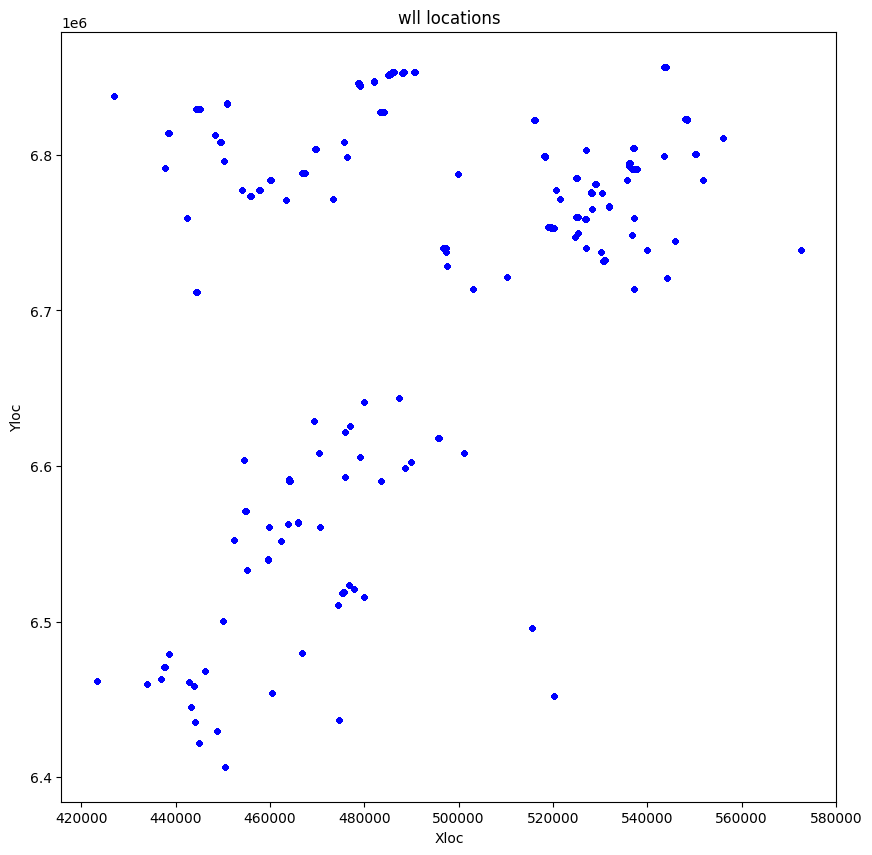

In [9]:
plt.figure(figsize = (10,10))
plt.scatter(data_df["X_LOC"] , data_df["Y_LOC"], s=10, c='b', alpha=0.5 )
plt.title("wll locations")
plt.xlabel("Xloc")
plt.ylabel("Yloc")

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2337639 entries, 25.0 to 3174.9364
Data columns (total 27 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   float64
 2   CALI                               float64
 3   MUDWEIGHT                          float64
 4   ROP                                float64
 5   RDEP                               float64
 6   RSHA                               float64
 7   RMED                               float64
 8   RXO                                float64
 9   SP                                 float64
 10  DTC                                float64
 11  NPHI                               float64
 12  PEF                                float64
 13  GR                                 float64
 14  RHOB                               float64
 15  DRHO                               float64
 16  DEPTH_MD          

In [11]:
data_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()  # counts of lithologies

FORCE_2020_LITHOFACIES_LITHOLOGY
65000.0    877043
30000.0    207704
65030.0    180820
70000.0     69498
80000.0     41038
99000.0     17431
88000.0     14712
70032.0     14043
90000.0      4754
74000.0      2391
86000.0      1808
93000.0       141
Name: count, dtype: int64

array([[<Axes: title={'center': 'FORCE_2020_LITHOFACIES_CONFIDENCE'}>,
        <Axes: title={'center': 'FORCE_2020_LITHOFACIES_LITHOLOGY'}>,
        <Axes: title={'center': 'CALI'}>,
        <Axes: title={'center': 'MUDWEIGHT'}>,
        <Axes: title={'center': 'ROP'}>],
       [<Axes: title={'center': 'RDEP'}>,
        <Axes: title={'center': 'RSHA'}>,
        <Axes: title={'center': 'RMED'}>,
        <Axes: title={'center': 'RXO'}>, <Axes: title={'center': 'SP'}>],
       [<Axes: title={'center': 'DTC'}>,
        <Axes: title={'center': 'NPHI'}>,
        <Axes: title={'center': 'PEF'}>, <Axes: title={'center': 'GR'}>,
        <Axes: title={'center': 'RHOB'}>],
       [<Axes: title={'center': 'DRHO'}>,
        <Axes: title={'center': 'DEPTH_MD'}>,
        <Axes: title={'center': 'X_LOC'}>,
        <Axes: title={'center': 'Y_LOC'}>,
        <Axes: title={'center': 'Z_LOC'}>],
       [<Axes: title={'center': 'BS'}>, <Axes: title={'center': 'DCAL'}>,
        <Axes: title={'center': 'SGR'

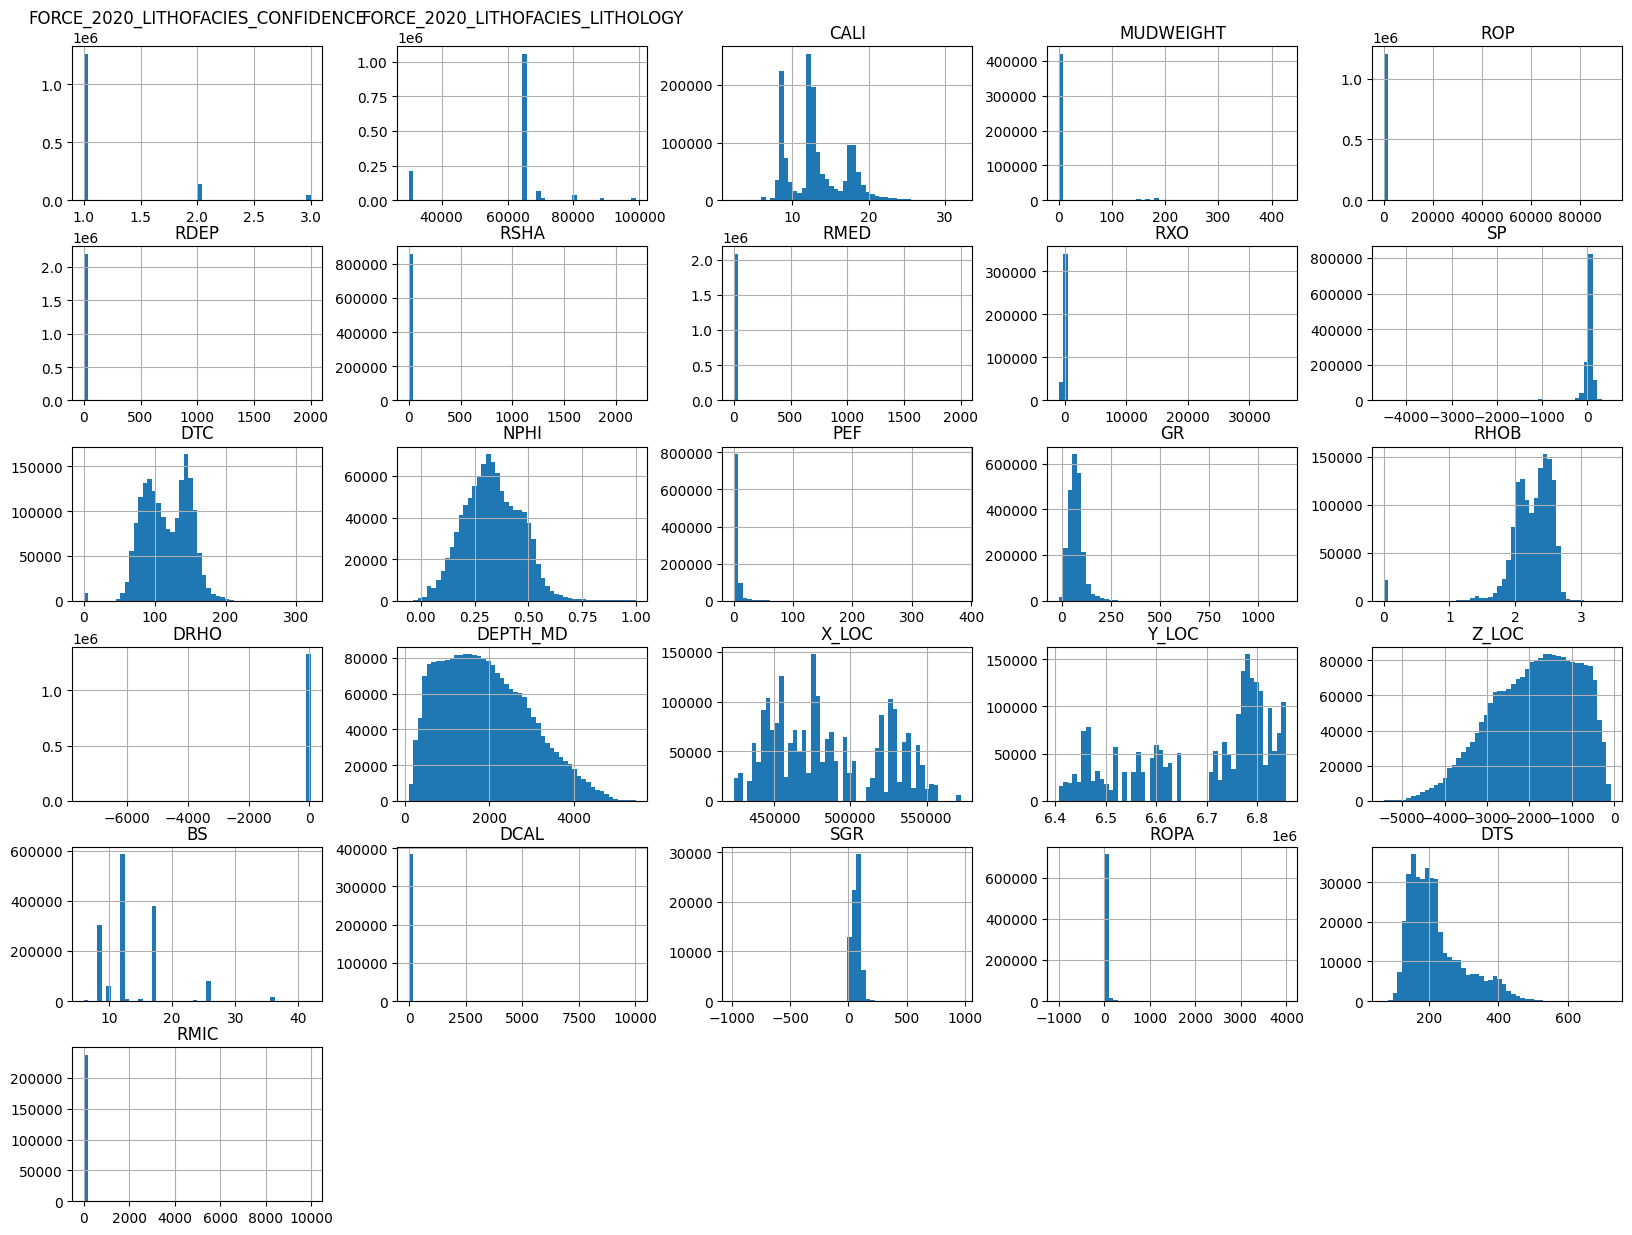

In [12]:
data_df.hist(bins=50 , figsize=(20,15))



In [13]:
# Define the lithology

lithology_keys = {}
col = np.sort(data_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())
for i in range(len(col)):
  lithology_keys[i] = col[i]
litho=['Sandstone', 'Shale', 'SandyShale', 'Limestone', 'Chalk', 'Dolomite',
       'Marl', 'Anhydrite', 'Halite', 'Coal', 'Basement', 'Tuff']
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
lithology_keys

{30000: 'Sandstone',
 65030: 'Sandstone/Shale',
 65000: 'Shale',
 80000: 'Marl',
 74000: 'Dolomite',
 70000: 'Limestone',
 70032: 'Chalk',
 88000: 'Halite',
 86000: 'Anhydrite',
 99000: 'Tuff',
 90000: 'Coal',
 93000: 'Basement'}

<>:16: SyntaxWarning: invalid escape sequence '\%'
<>:16: SyntaxWarning: invalid escape sequence '\%'
C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\3325711112.py:16: SyntaxWarning: invalid escape sequence '\%'
  ax.set_ylabel('Lithology presence (\%)')
C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\3325711112.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names, rotation=45)


Text(0.5, 1.0, 'Lithology presence in the dataset')

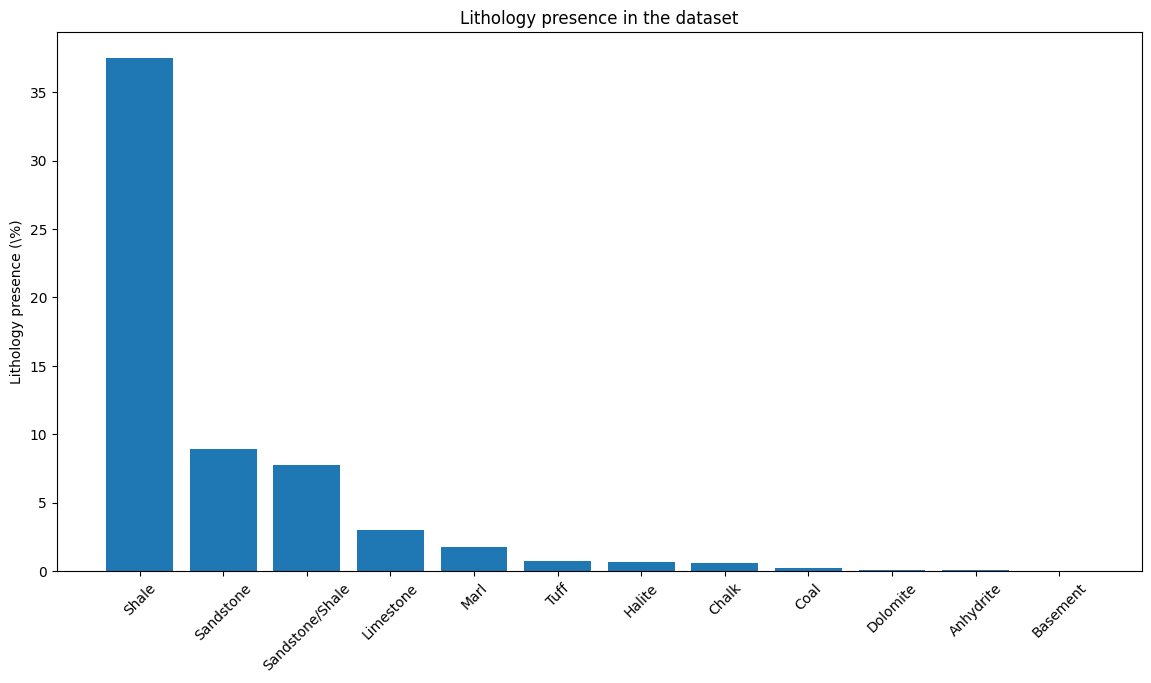

In [14]:
# Lithology presentation

counts = data_df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = data_df['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]

# Use .items() to iterate
for item in counts.items():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')
ax.set_title('Lithology presence in the dataset')

# **5. Data Wrangling**

## 5.1. Missing logs

In [15]:
# make dataframe to define nan in each columns
missing_df = pd.DataFrame(data_df.dtypes, columns=["dtypes"])
missing_df["n_unique"] = data_df.nunique()
missing_df["bool"] = data_df.isna().any()
missing_df["nan"] = data_df.isna().sum()
missing_df["percent_nan"] = (missing_df["nan"] / len(data_df)) * 100

missing_df.sort_values(by="nan", ascending=True)

dtypes  n_unique   bool      nan  \
Wellname                            object       118  False        0   
GR                                 float64   2163127   True    39955   
Z_LOC                              float64   2120910   True   115746   
Y_LOC                              float64     28157   True   115746   
X_LOC                              float64    275130   True   115746   
DEPTH_MD                           float64   1964606   True   115746   
RDEP                               float64   2106243   True   118446   
RMED                               float64   1996204   True   244765   
DTC                                float64   1618225   True   543931   
CALI                               float64   1146918   True   875726   
BS                                 float64       309   True   880760   
FORCE_2020_LITHOFACIES_CONFIDENCE  float64         3   True   893586   
FORCE_2020_LITHOFACIES_LITHOLOGY   float64        12   True   906256   
RHOB                               float64   1134723   True   941122   
DRHO                               float64   1247599   True  1012729   
SP                                 float64   1156832   True  1108869   
ROP                                float64   1082672   True  1116713   
NPHI                               float64    987853   True  1304036   
PEF                                float64    897978   True  1413499   
RSHA                               float64    844776   True  1469179   
ROPA                               float64    715798   True  1598886   
MUDWEIGHT                          float64       623   True  1897939   
DTS                                float64    382316   True  1948818   
RXO                                float64    337177   True  1951432   
DCAL                               float64    344788   True  1953401   
RMIC                               float64    236808   True  2099262   
SGR                                float64     70901   True  2265476   

                                   percent_nan  
Wellname                              0.000000  
GR                                    1.709203  
Z_LOC                                 4.951406  
Y_LOC                                 4.951406  
X_LOC                                 4.951406  
DEPTH_MD                              4.951406  
RDEP                                  5.066907  
RMED                                 10.470607  
DTC                                  23.268392  
CALI                                 37.461986  
BS                                   37.677332  
FORCE_2020_LITHOFACIES_CONFIDENCE    38.226005  
FORCE_2020_LITHOFACIES_LITHOLOGY     38.768005  
RHOB                                 40.259510  
DRHO                                 43.322729  
SP                                   47.435425  
ROP                                  47.770977  
NPHI                                 55.784319  
PEF                                  60.466950  
RSHA                                 62.848840  
ROPA                                 68.397473  
MUDWEIGHT                            81.190423  
DTS                                  83.366936  
RXO                                  83.478758  
DCAL                                 83.562988  
RMIC                                 89.802660  
SGR                                  96.912996

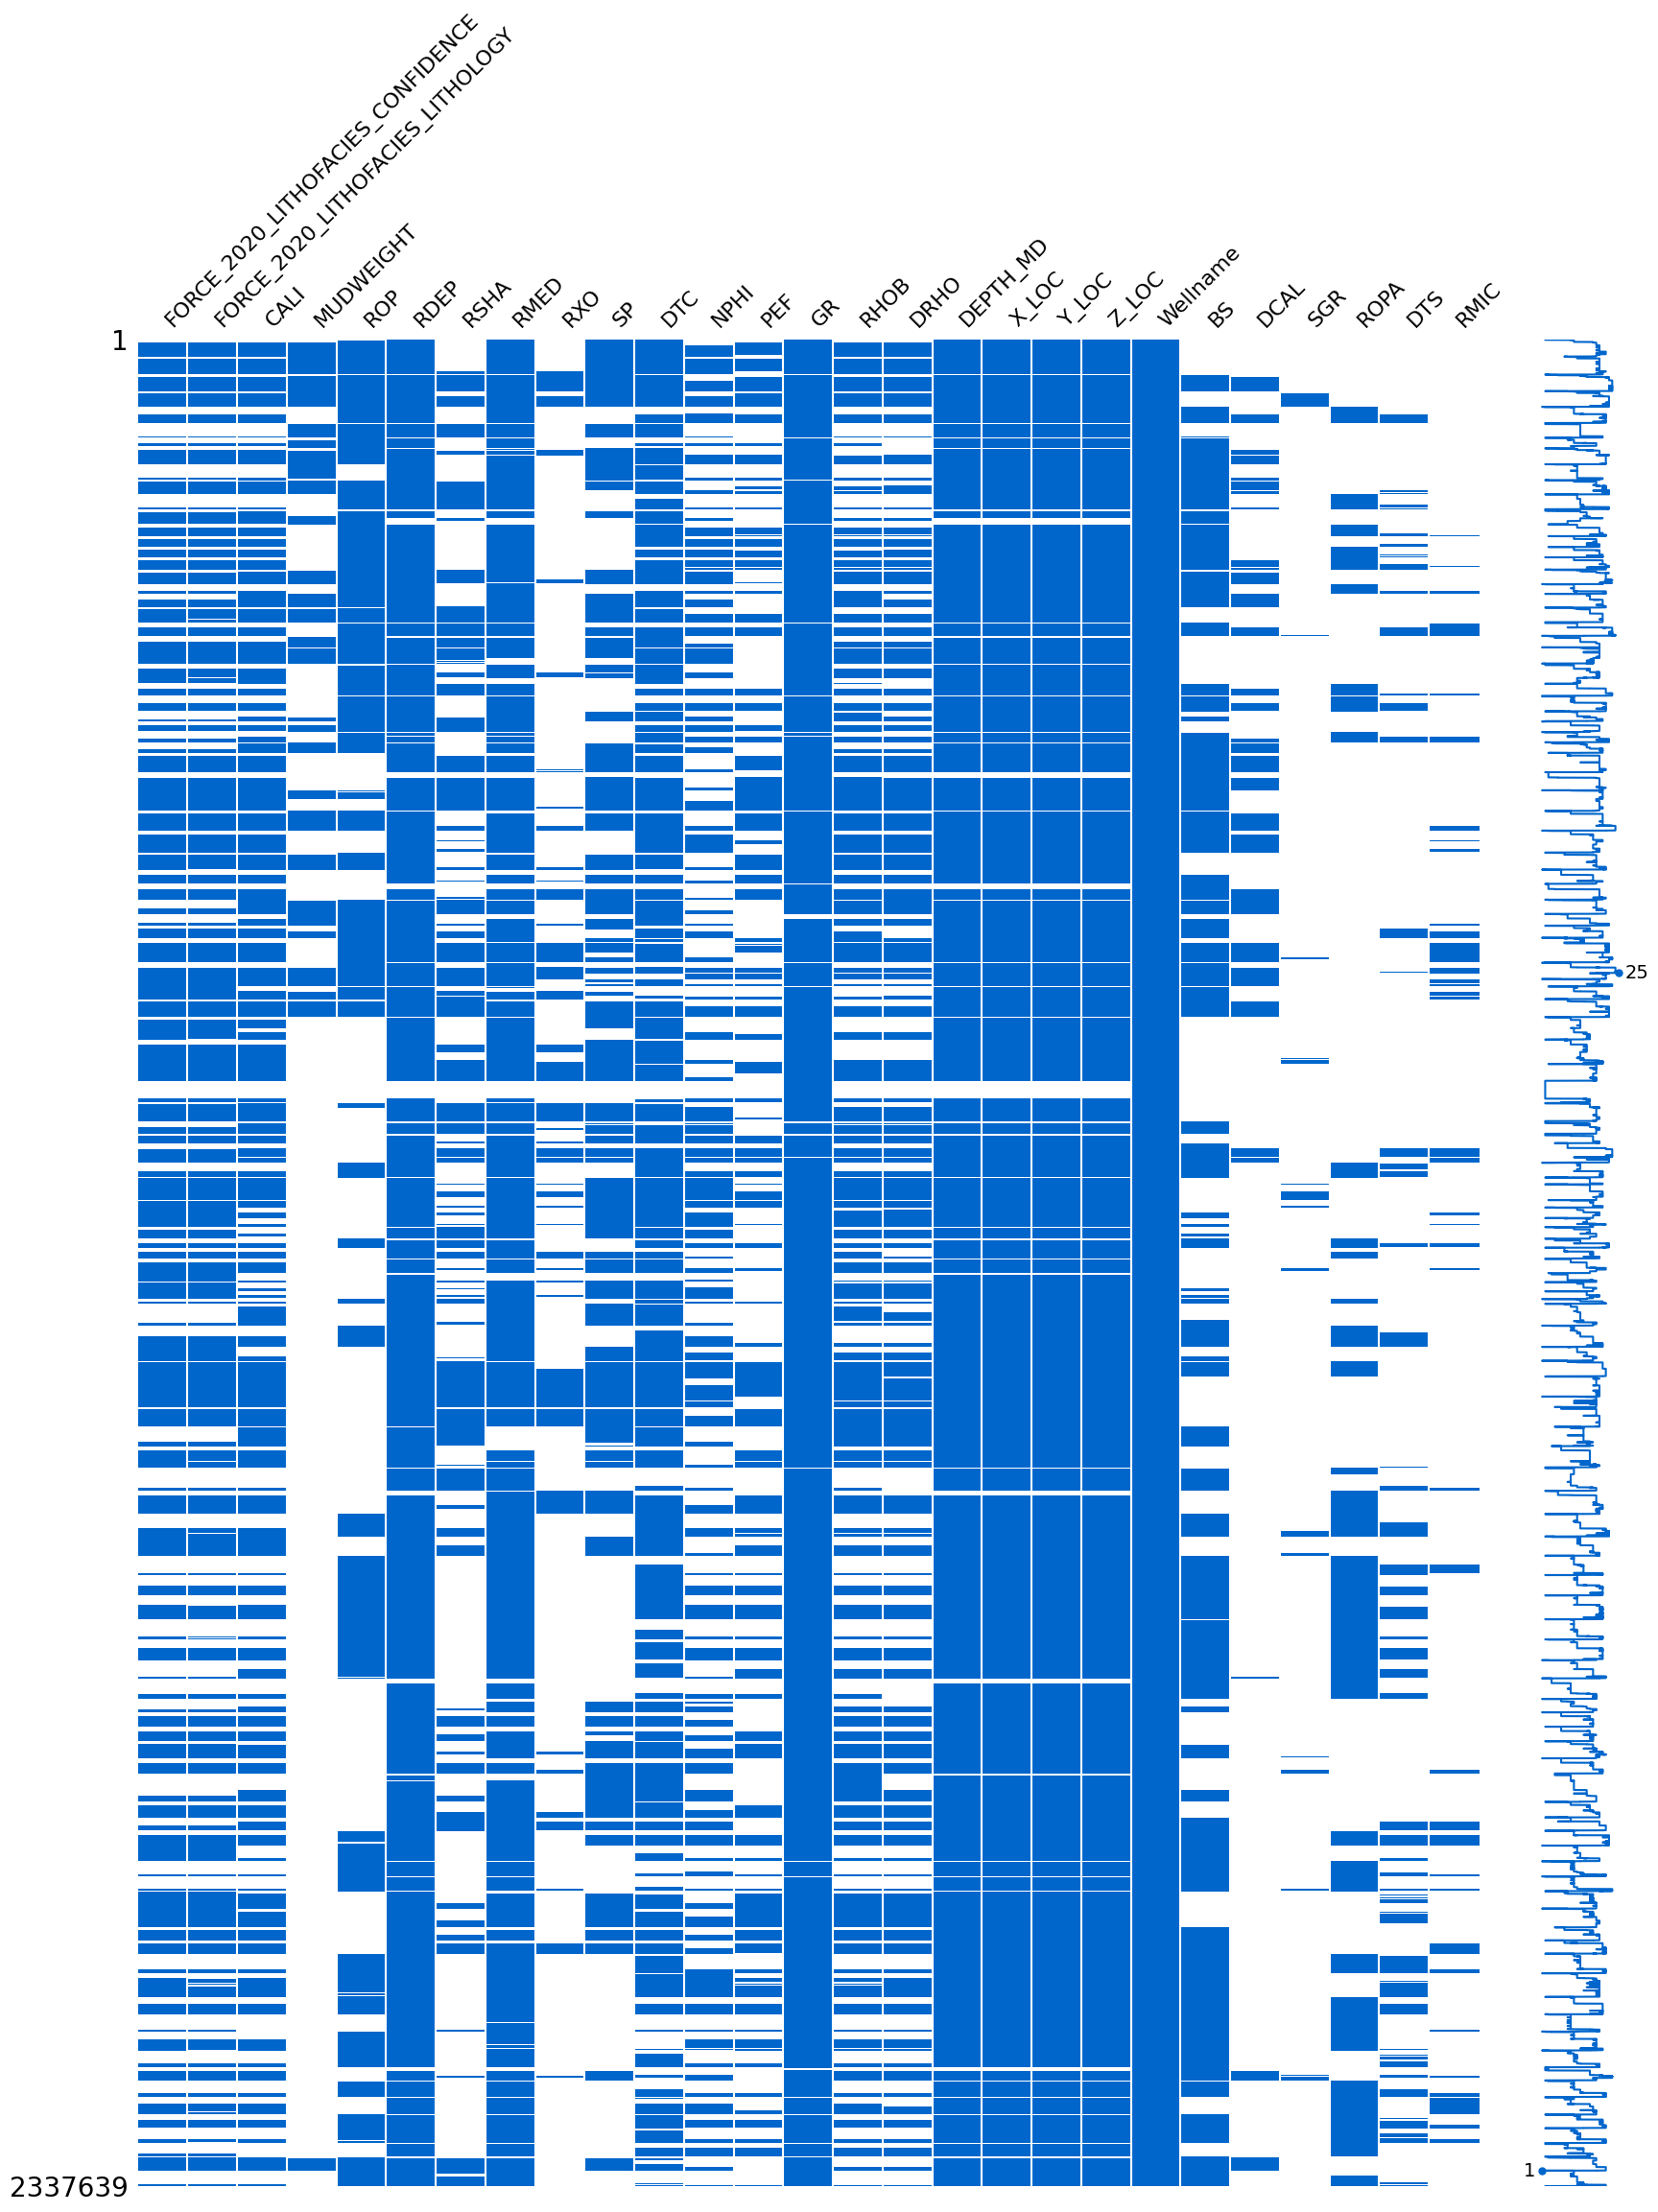

In [16]:
# Visualize missing values
msno.matrix(data_df, color = (0 , 0.4 , 0.8))
fig = plt.gcf()
fig.set_size_inches(20, 25)

In [17]:
# drop nan row of DEPTH+MD

data_df.dropna(subset=['DEPTH_MD'], inplace=True)


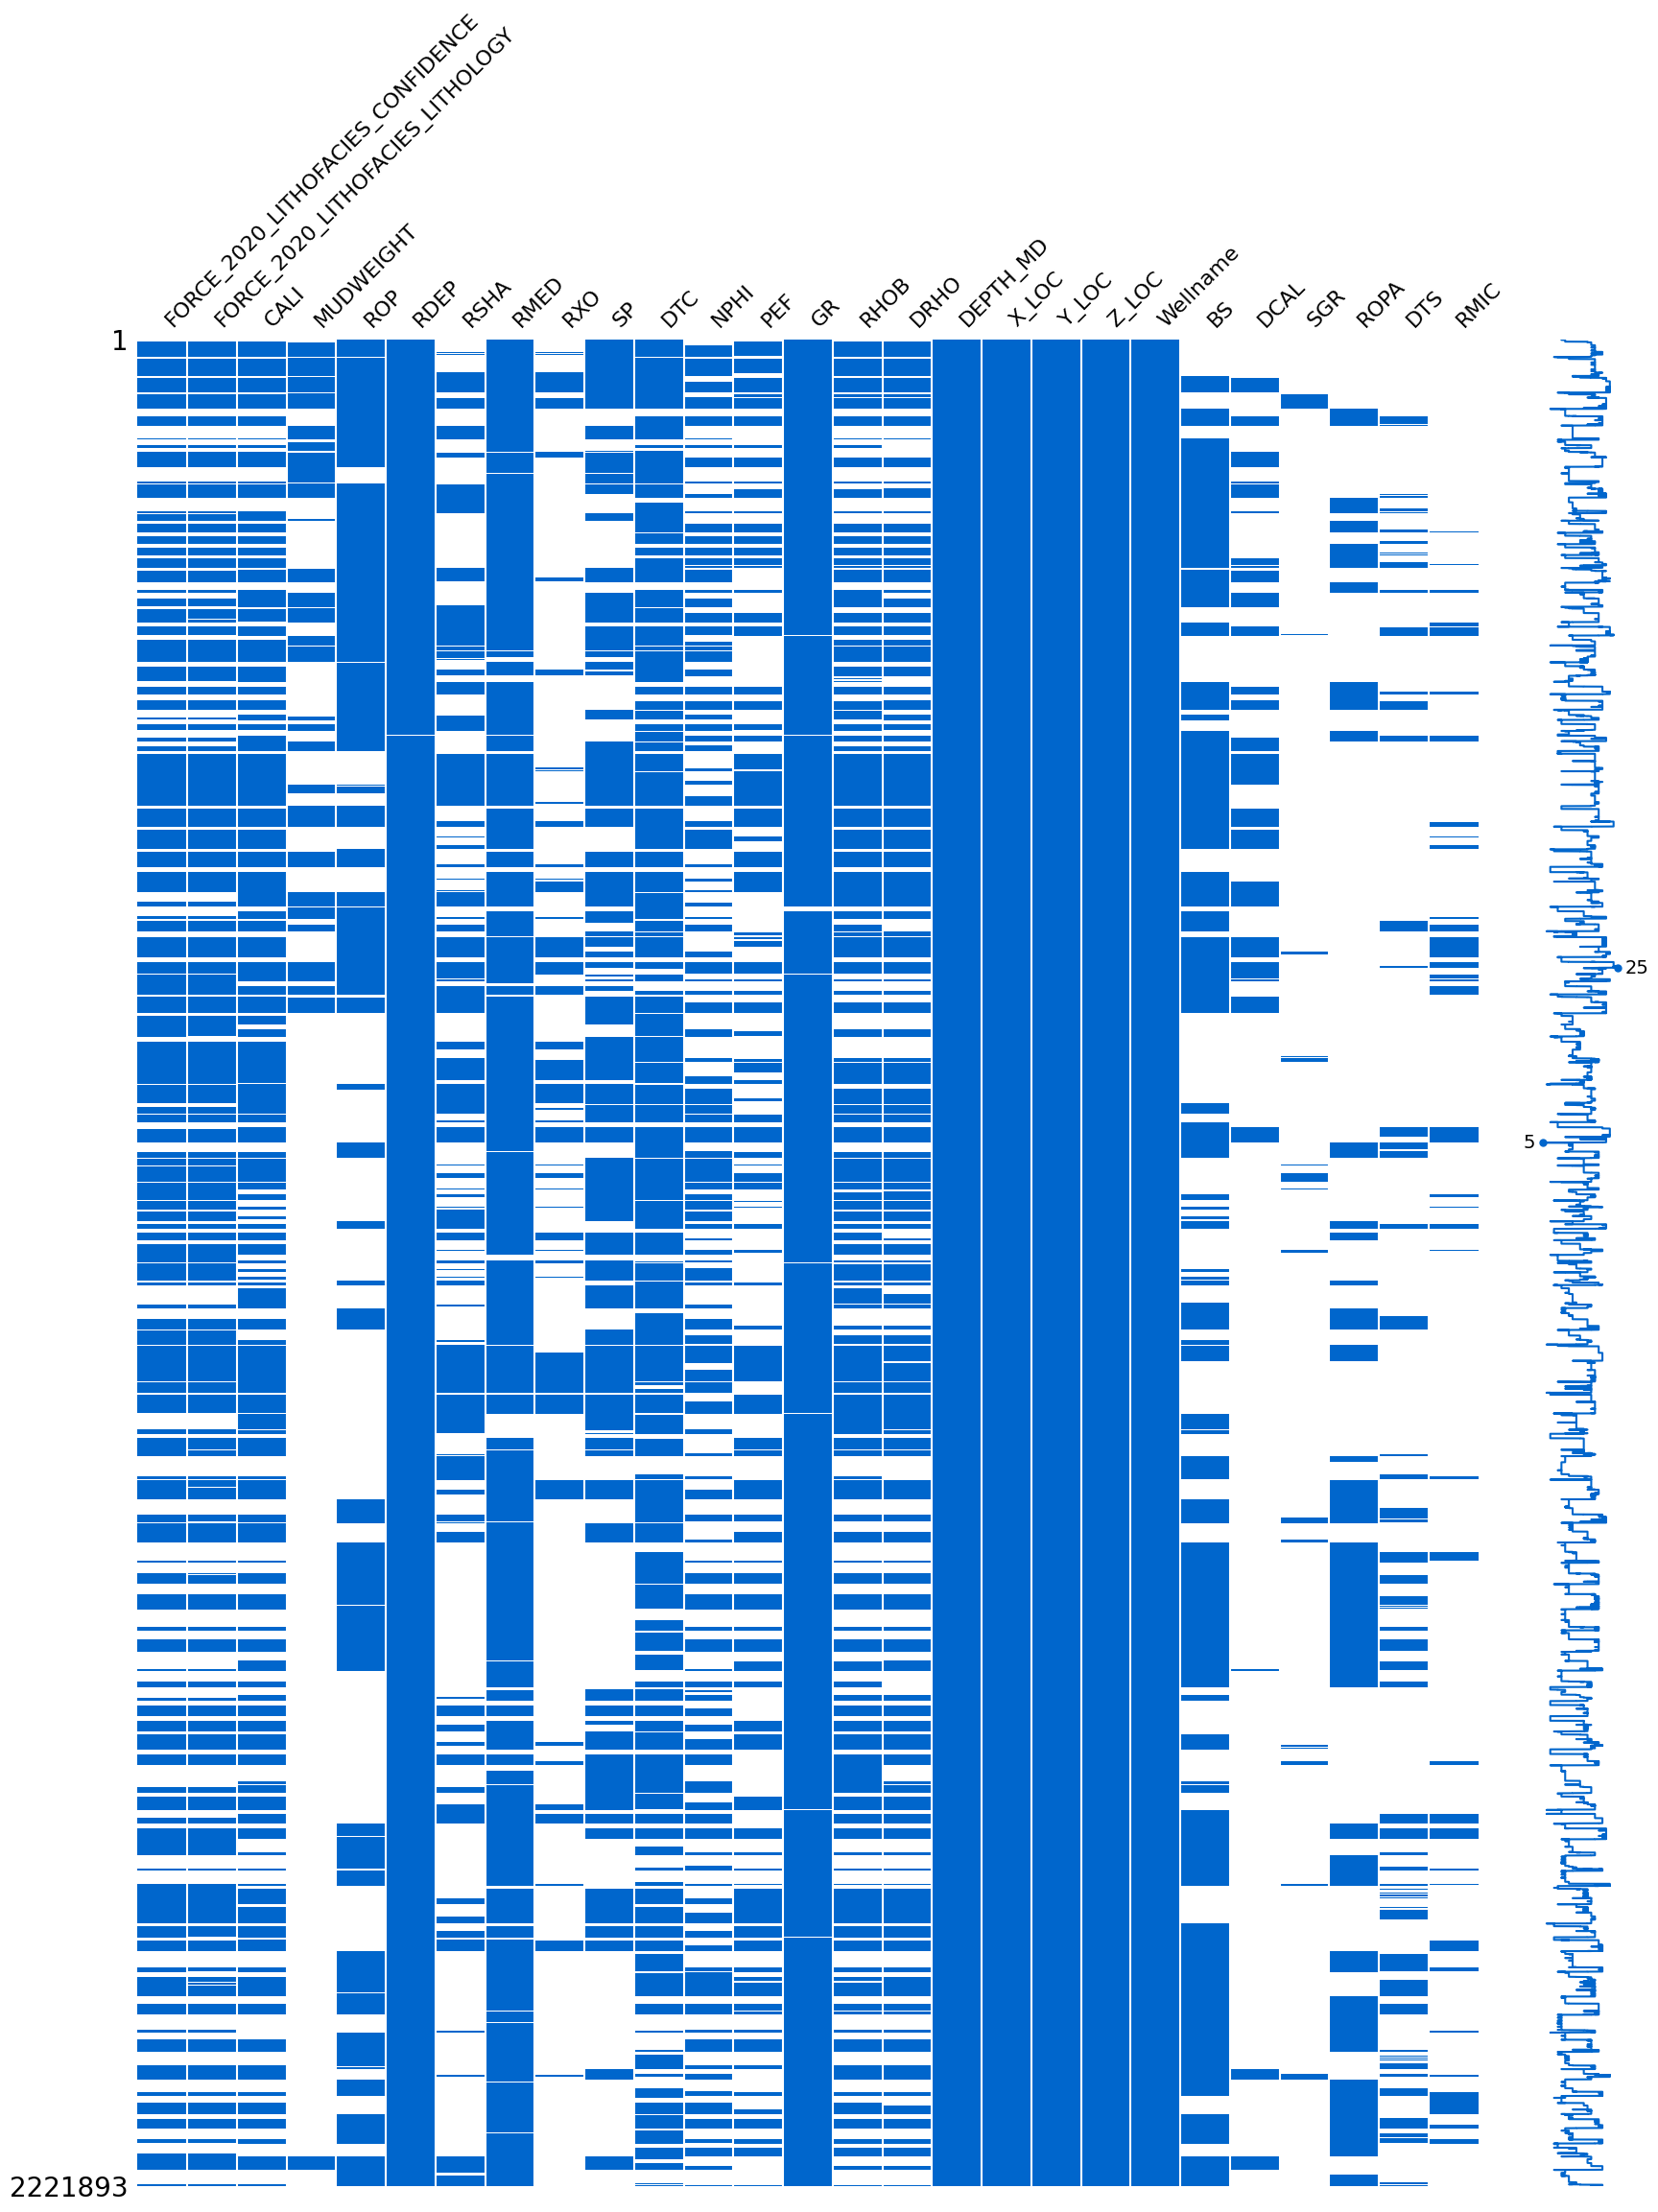

In [18]:
msno.matrix(data_df, color = (0 , 0.4 , 0.8))
fig = plt.gcf()
fig.set_size_inches(20, 25)

In [19]:
data_df.columns

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'CALI', 'MUDWEIGHT', 'ROP', 'RDEP', 'RSHA', 'RMED', 'RXO', 'SP', 'DTC',
       'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO', 'DEPTH_MD', 'X_LOC', 'Y_LOC',
       'Z_LOC', 'Wellname', 'BS', 'DCAL', 'SGR', 'ROPA', 'DTS', 'RMIC'],
      dtype='object')

In [20]:
# Drop "FORCE_2020_LITHOFACIES_CONFIDENCE" , "X_LOC" , "Y_LOC" , "Z_LOC" , and all logs conatin nan more than 60%
# make dataframe to define nan in each columns
missing_df = pd.DataFrame(data_df.dtypes, columns=["dtypes"])
missing_df["n_unique"] = data_df.nunique()
missing_df["bool"] = data_df.isna().any()
missing_df["nan"] = data_df.isna().sum()
missing_df["percent_nan"] = (missing_df["nan"] / len(data_df)) * 100

missing_df.sort_values(by="nan", ascending=True)

dtypes  n_unique   bool      nan  \
Wellname                            object       118  False        0   
Z_LOC                              float64   2120910  False        0   
Y_LOC                              float64     28157  False        0   
X_LOC                              float64    275130  False        0   
DEPTH_MD                           float64   1964606  False        0   
RDEP                               float64   2106243   True     2700   
GR                                 float64   2081878   True    12674   
RMED                               float64   1990004   True   136168   
DTC                                float64   1605812   True   444547   
CALI                               float64   1139732   True   770214   
FORCE_2020_LITHOFACIES_CONFIDENCE  float64         3   True   789390   
FORCE_2020_LITHOFACIES_LITHOLOGY   float64        12   True   801766   
BS                                 float64       273   True   814033   
RHOB                               float64   1130908   True   833094   
DRHO                               float64   1242790   True   902295   
SP                                 float64   1149514   True  1008658   
ROP                                float64   1060569   True  1025545   
NPHI                               float64    984147   True  1192351   
PEF                                float64    896194   True  1299844   
RSHA                               float64    840831   True  1357804   
ROPA                               float64    694417   True  1508238   
MUDWEIGHT                          float64       602   True  1794383   
DTS                                float64    382214   True  1833197   
DCAL                               float64    343855   True  1838891   
RXO                                float64    337116   True  1842747   
RMIC                               float64    236745   True  1983579   
SGR                                float64     70901   True  2149868   

                                   percent_nan  
Wellname                              0.000000  
Z_LOC                                 0.000000  
Y_LOC                                 0.000000  
X_LOC                                 0.000000  
DEPTH_MD                              0.000000  
RDEP                                  0.121518  
GR                                    0.570415  
RMED                                  6.128468  
DTC                                  20.007579  
CALI                                 34.664766  
FORCE_2020_LITHOFACIES_CONFIDENCE    35.527813  
FORCE_2020_LITHOFACIES_LITHOLOGY     36.084816  
BS                                   36.636913  
RHOB                                 37.494785  
DRHO                                 40.609291  
SP                                   45.396335  
ROP                                  46.156363  
NPHI                                 53.663745  
PEF                                  58.501647  
RSHA                                 61.110233  
ROPA                                 67.880767  
MUDWEIGHT                            80.759199  
DTS                                  82.506088  
DCAL                                 82.762356  
RXO                                  82.935902  
RMIC                                 89.274281  
SGR                                  96.758395

In [21]:
# data_df1 = data_df.drop(columns=["FORCE_2020_LITHOFACIES_CONFIDENCE" , "X_LOC" , "Y_LOC" , "Z_LOC", 'SGR' , "RMIC" , "DCAL" , "RXO"  , "DTS" , "MUDWEIGHT" , "ROPA" , "RSHA" , "PEF"], axis = 1)


In [22]:
# data_df1.dropna(subset=["FORCE_2020_LITHOFACIES_LITHOLOGY"], inplace=True)

In [23]:
# missing_df1 = pd.DataFrame(data_df1.dtypes, columns=["dtypes"])
# missing_df1["n_unique"] = data_df1.nunique()
# missing_df1["bool"] = data_df1.isna().any()
# missing_df1["nan"] = data_df1.isna().sum()
# missing_df1["percent_nan"] = (missing_df1["nan"] / len(data_df)) * 100

# missing_df1.sort_values(by="nan", ascending=True)


In [24]:
data_df.columns  # final columns

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'CALI', 'MUDWEIGHT', 'ROP', 'RDEP', 'RSHA', 'RMED', 'RXO', 'SP', 'DTC',
       'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO', 'DEPTH_MD', 'X_LOC', 'Y_LOC',
       'Z_LOC', 'Wellname', 'BS', 'DCAL', 'SGR', 'ROPA', 'DTS', 'RMIC'],
      dtype='object')

In [25]:
# new_order = ['Wellname', 'DEPTH_MD','CALI', 'ROP', 'RDEP', 'RMED', 'SP',
#        'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO','BS' , 'FORCE_2020_LITHOFACIES_LITHOLOGY']
# # Reindexing the DataFrame
# data_df1 = data_df1.reindex(columns=new_order)

In [26]:
# data_df1

In [27]:
# data_df1.hist(bins=50 , figsize=(20,15))


In [28]:
fig = px.bar(missing_df , missing_df.index , missing_df.nan,
             title="Null Value Rep." )
fig.update_xaxes(title_text='Log names')
fig.update_yaxes(title_text='Number of NA')

fig.show()

print("total number of row in the data: " , data_df.shape[0])

total number of row in the data:  2221893


In [29]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_df.describe()

FORCE_2020_LITHOFACIES_CONFIDENCE  FORCE_2020_LITHOFACIES_LITHOLOGY  \
count                         1432503.00                        1420127.00   
mean                                1.15                          61337.06   
std                                 0.43                          13911.39   
min                                 1.00                          30000.00   
25%                                 1.00                          65000.00   
50%                                 1.00                          65000.00   
75%                                 1.00                          65000.00   
max                                 3.00                          99000.00   

            CALI  MUDWEIGHT        ROP       RDEP      RSHA       RMED  \
count 1451679.00  427510.00 1196348.00 2219193.00 864089.00 2085725.00   
mean       13.23       7.68     333.04       8.48      9.41       4.36   
std         3.71      34.30    3053.50      90.86     92.05      53.07   
min         2.34       0.12     -21.50       0.00      0.00       0.00   
25%         9.85       0.14      11.55       0.93      0.84       0.91   
50%        12.56       0.16      25.99       1.41      1.35       1.37   
75%        16.54       1.14      43.30       2.32      2.61       2.26   
max        32.11     426.92   92429.16    2000.00   2000.00    1999.95   

            RXO         SP  ...   DEPTH_MD      X_LOC      Y_LOC      Z_LOC  \
count 379146.00 1213235.00  ... 2221893.00 2221893.00 2221893.00 2221893.00   
mean     -84.32      46.69  ...    1920.04  485092.59 6691334.84   -1873.01   
std      346.36     149.34  ...    1043.48   35569.14  135624.43    1015.25   
min     -999.90   -4351.74  ...      98.72  423237.53 6406641.00   -5435.89   
25%        0.69      28.17  ...    1073.81  454469.53 6571042.00   -2603.98   
50%        1.37      51.78  ...    1806.48  478768.94 6758510.00   -1771.35   
75%        3.27      76.80  ...    2649.61  520153.19 6798584.00   -1047.98   
max    35930.67     526.55  ...    5477.67  572632.75 6856661.00     -72.65   

              BS      DCAL      SGR      ROPA       DTS      RMIC  
count 1407860.00 383002.00 72025.00 713655.00 388696.00 238314.00  
mean       13.51      9.22    63.05     36.24    221.22      9.23  
std         4.60    289.21    49.84     85.55     81.48    106.67  
min         6.00    -12.22  -983.00   -999.25     69.16      0.06  
25%         9.88      0.10    42.10     15.07    160.32      0.88  
50%        12.25      0.47    68.80     25.73    200.17      1.64  
75%        17.50      1.19    87.44     39.00    258.89      4.09  
max        36.00  10023.76   963.61   3989.17    724.54  10000.00  

[8 rows x 26 columns]

In [30]:
# make imputation for the column "FORCE_2020_LITHOFACIES_LITHOLOGY" using KNN

# from sklearn.impute import KNNImputer

# Select features for imputation
# features = ['FORCE_2020_LITHOFACIES_LITHOLOGY']

# Create a KNN imputer
# imputer = KNNImputer(n_neighbors=2)

# Fit and transform the data
# data_df[features] = imputer.fit_transform(data_df[features])

# Now you can use the imputed data for further analysis


In [31]:
data_df

FORCE_2020_LITHOFACIES_CONFIDENCE  FORCE_2020_LITHOFACIES_LITHOLOGY  \
DEPT                                                                           
98.72                                  NaN                               NaN   
98.87                                  NaN                               NaN   
99.02                                  NaN                               NaN   
99.18                                  NaN                               NaN   
99.33                                  NaN                               NaN   
...                                    ...                               ...   
3168.10                               2.00                          30000.00   
3168.25                               2.00                          65030.00   
3168.40                               2.00                          65030.00   
3168.55                               2.00                          65030.00   
3168.70                               2.00                          30000.00   

         CALI  MUDWEIGHT   ROP  RDEP  RSHA  RMED  RXO      SP  ...     X_LOC  \
DEPT                                                           ...             
98.72     NaN        NaN   NaN  8.02   NaN  0.36  NaN -115.83  ... 437642.16   
98.87     NaN        NaN   NaN  8.02   NaN  0.34  NaN -115.10  ... 437642.16   
99.02     NaN        NaN   NaN  8.02   NaN  0.37  NaN -114.58  ... 437642.16   
99.18     NaN        NaN   NaN  8.02   NaN  0.42  NaN -115.10  ... 437642.16   
99.33     NaN        NaN   NaN  8.02   NaN  0.44  NaN -114.55  ... 437642.16   
...       ...        ...   ...   ...   ...   ...  ...     ...  ...       ...   
3168.10  8.40        NaN 28.64  1.08  1.23  1.37  NaN     NaN  ... 444920.38   
3168.25  8.40        NaN 28.98  0.99  0.97  1.06  NaN     NaN  ... 444920.38   
3168.40  8.39        NaN 29.02  0.90  0.79  0.83  NaN     NaN  ... 444920.38   
3168.55  8.40        NaN 28.65  0.88  0.84  0.84  NaN     NaN  ... 444920.38   
3168.70  8.39        NaN 28.11  0.88  0.82  0.79  NaN     NaN  ... 444920.38   

             Y_LOC    Z_LOC  Wellname   BS  DCAL  SGR  ROPA  DTS  RMIC  
DEPT                                                                    
98.72   6470975.50   -73.72   15_9-13  NaN   NaN  NaN   NaN  NaN   NaN  
98.87   6470975.50   -73.87   15_9-13  NaN   NaN  NaN   NaN  NaN   NaN  
99.02   6470975.50   -74.02   15_9-13  NaN   NaN  NaN   NaN  NaN   NaN  
99.18   6470975.50   -74.18   15_9-13  NaN   NaN  NaN   NaN  NaN   NaN  
99.33   6470975.50   -74.33   15_9-13  NaN   NaN  NaN   NaN  NaN   NaN  
...            ...      ...       ...  ...   ...  ...   ...  ...   ...  
3168.10 6421578.50 -3107.24   7_1-2 S 8.50   NaN  NaN 25.38  NaN   NaN  
3168.25 6421578.50 -3107.39   7_1-2 S 8.50   NaN  NaN 25.55  NaN   NaN  
3168.40 6421578.50 -3107.54   7_1-2 S 8.50   NaN  NaN 25.71  NaN   NaN  
3168.55 6421578.50 -3107.69   7_1-2 S 8.50   NaN  NaN 25.86  NaN   NaN  
3168.70 6421578.00 -3107.84   7_1-2 S 8.50   NaN  NaN 26.02  NaN   NaN  

[2221893 rows x 27 columns]

## 5.2. Data Imputation & Augmantation
Replace the null Vlues ith zero

In [32]:
# make impute for nan values with 0
data_df1 = data_df.copy()


# # Fill NaN values with 0
# data_df1.fillna(0, inplace=True)


In [33]:
# index the df by wellname and DEPTH_MD
data_df1.set_index(["Wellname" , "DEPTH_MD"] , inplace=True)

In [34]:
# make dataframe to define nan in each columns
missing_df1 = pd.DataFrame(data_df1.dtypes, columns=["dtypes"])
missing_df1["n_unique"] = data_df1.nunique()
missing_df1["bool"] = data_df1.isna().any()
missing_df1["nan"] = data_df1.isna().sum()
missing_df1["percent_nan"] = (missing_df1["nan"] / len(data_df1)) * 100

missing_df1.sort_values(by="nan", ascending=True)

dtypes  n_unique   bool      nan  \
Z_LOC                              float64   2120910  False        0   
Y_LOC                              float64     28157  False        0   
X_LOC                              float64    275130  False        0   
RDEP                               float64   2106243   True     2700   
GR                                 float64   2081878   True    12674   
RMED                               float64   1990004   True   136168   
DTC                                float64   1605812   True   444547   
CALI                               float64   1139732   True   770214   
FORCE_2020_LITHOFACIES_CONFIDENCE  float64         3   True   789390   
FORCE_2020_LITHOFACIES_LITHOLOGY   float64        12   True   801766   
BS                                 float64       273   True   814033   
RHOB                               float64   1130908   True   833094   
DRHO                               float64   1242790   True   902295   
SP                                 float64   1149514   True  1008658   
ROP                                float64   1060569   True  1025545   
NPHI                               float64    984147   True  1192351   
PEF                                float64    896194   True  1299844   
RSHA                               float64    840831   True  1357804   
ROPA                               float64    694417   True  1508238   
MUDWEIGHT                          float64       602   True  1794383   
DTS                                float64    382214   True  1833197   
DCAL                               float64    343855   True  1838891   
RXO                                float64    337116   True  1842747   
RMIC                               float64    236745   True  1983579   
SGR                                float64     70901   True  2149868   

                                   percent_nan  
Z_LOC                                     0.00  
Y_LOC                                     0.00  
X_LOC                                     0.00  
RDEP                                      0.12  
GR                                        0.57  
RMED                                      6.13  
DTC                                      20.01  
CALI                                     34.66  
FORCE_2020_LITHOFACIES_CONFIDENCE        35.53  
FORCE_2020_LITHOFACIES_LITHOLOGY         36.08  
BS                                       36.64  
RHOB                                     37.49  
DRHO                                     40.61  
SP                                       45.40  
ROP                                      46.16  
NPHI                                     53.66  
PEF                                      58.50  
RSHA                                     61.11  
ROPA                                     67.88  
MUDWEIGHT                                80.76  
DTS                                      82.51  
DCAL                                     82.76  
RXO                                      82.94  
RMIC                                     89.27  
SGR                                      96.76

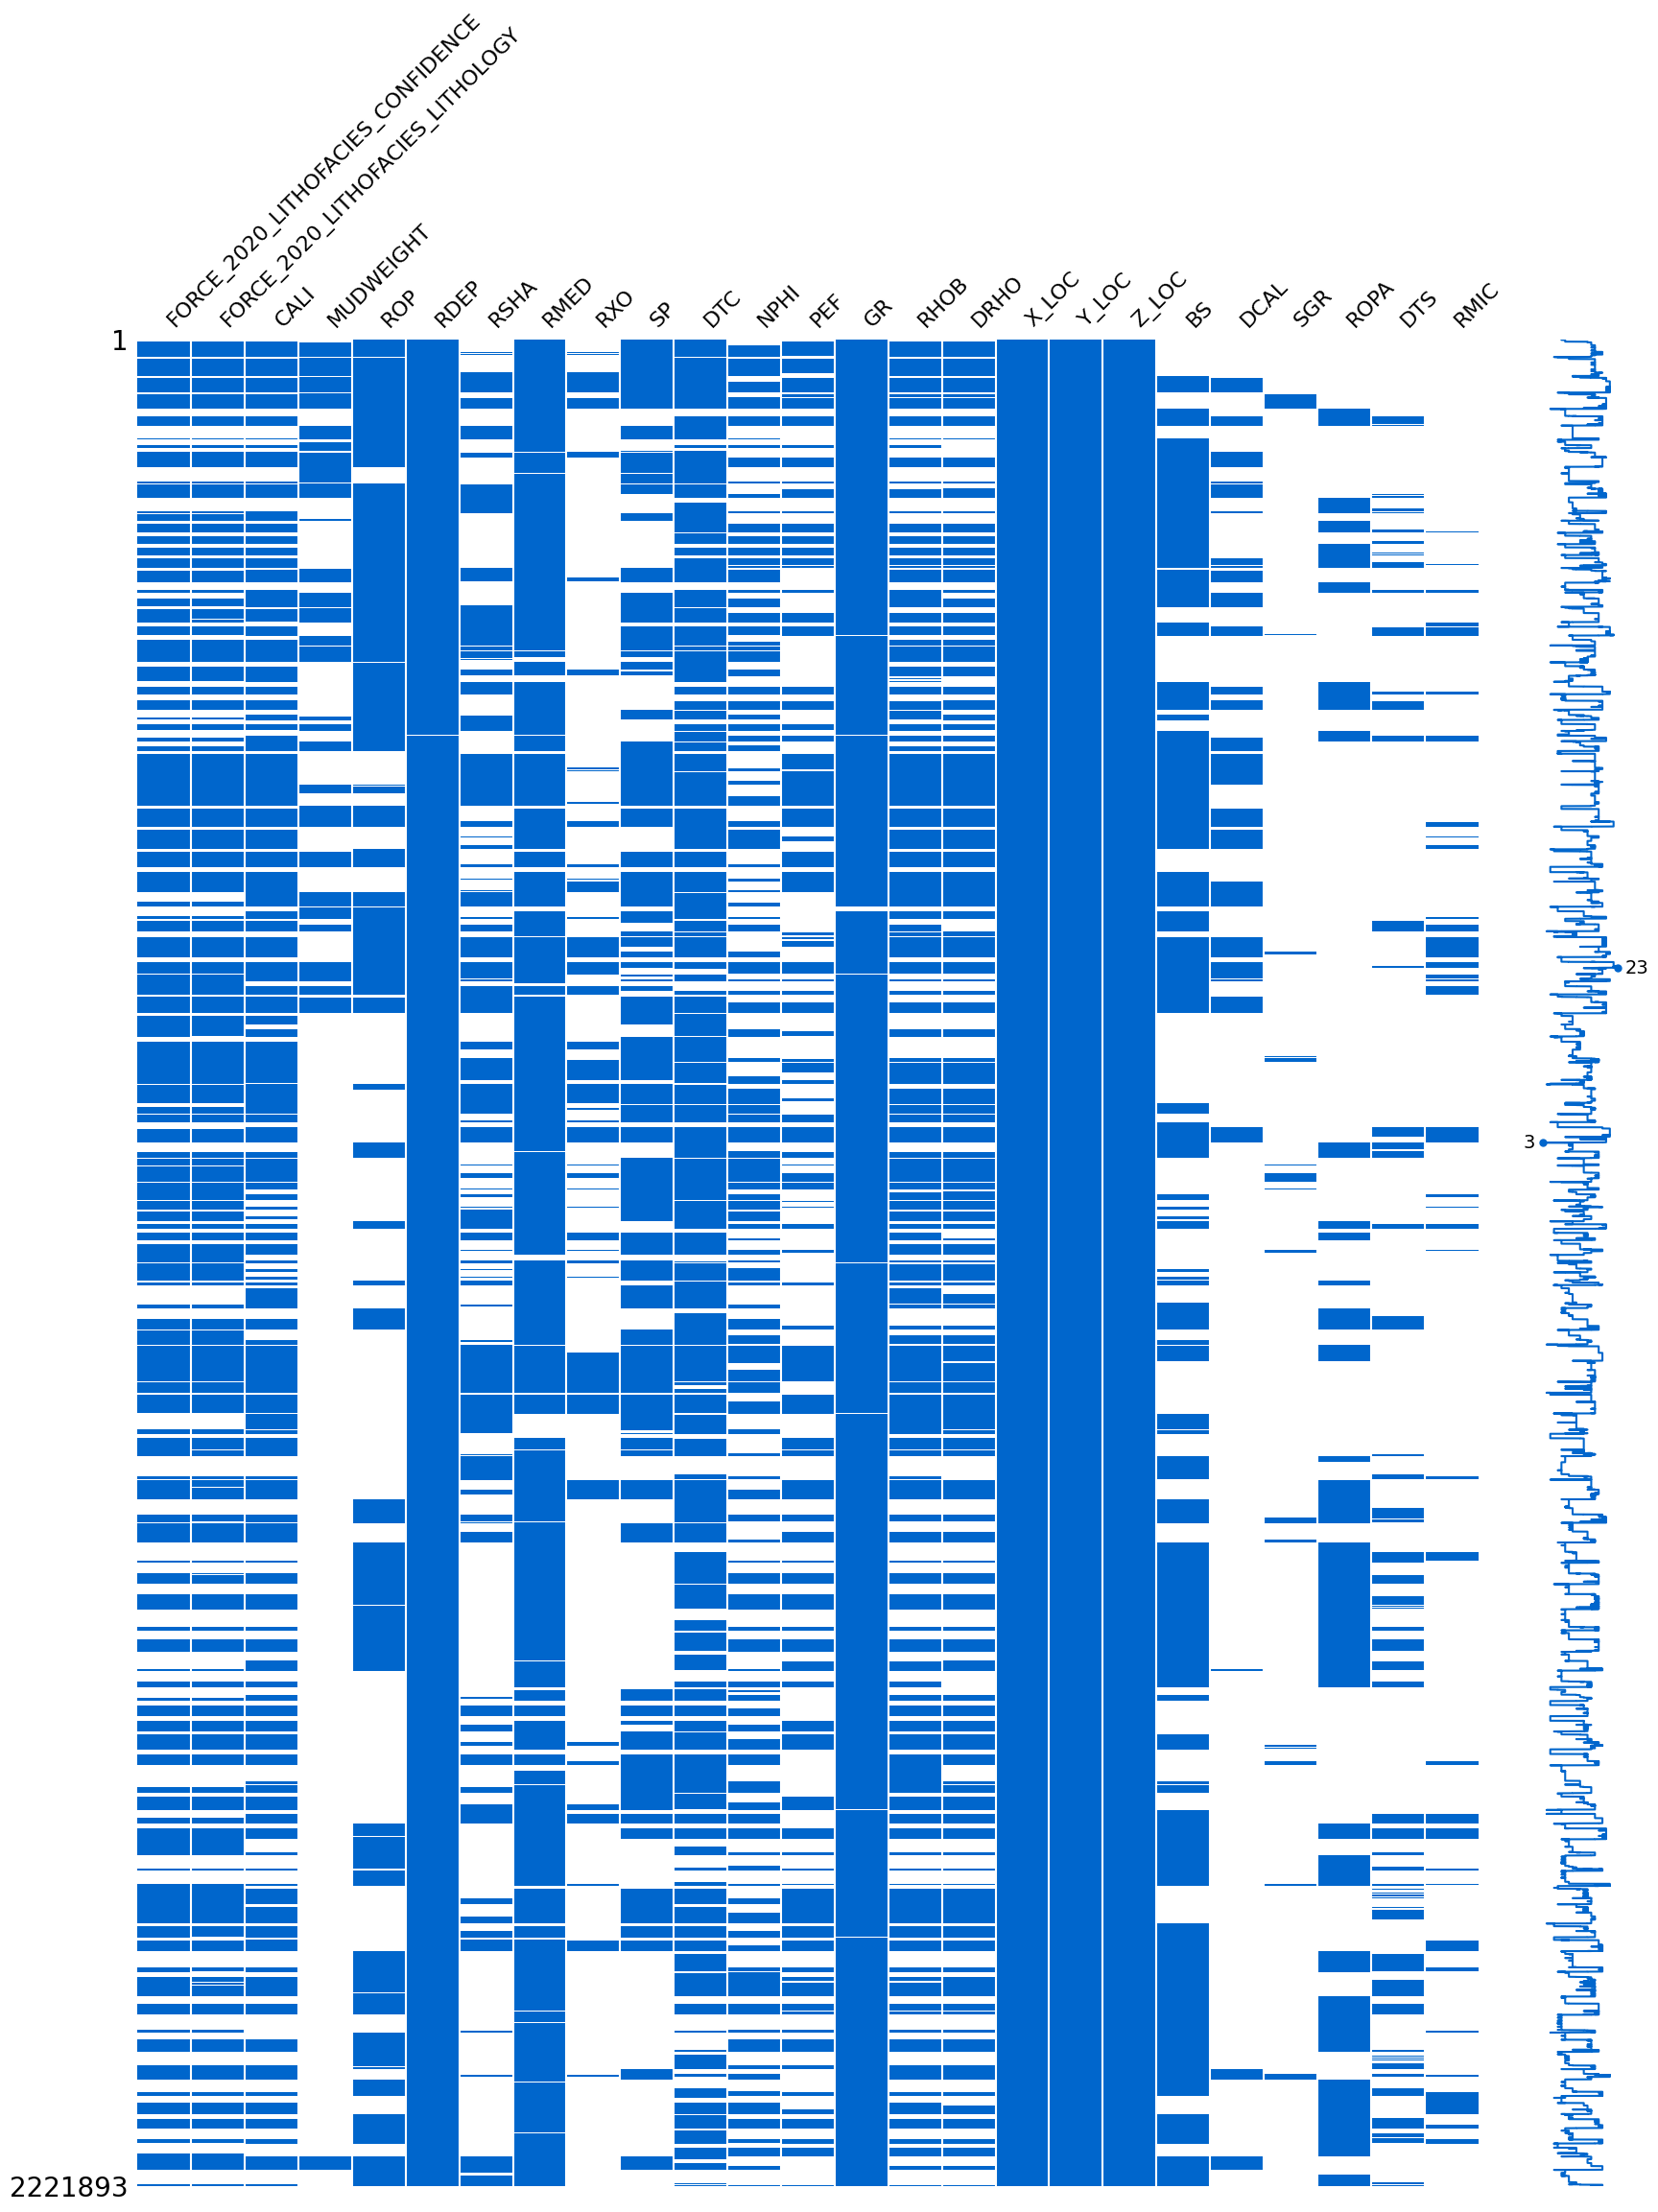

In [35]:
# Visualize missing values
msno.matrix(data_df1
, color = (0 , 0.4 , 0.8))
fig = plt.gcf()
fig.set_size_inches(20, 25)

In [36]:
data_df1.columns

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'CALI', 'MUDWEIGHT', 'ROP', 'RDEP', 'RSHA', 'RMED', 'RXO', 'SP', 'DTC',
       'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO', 'X_LOC', 'Y_LOC', 'Z_LOC', 'BS',
       'DCAL', 'SGR', 'ROPA', 'DTS', 'RMIC'],
      dtype='object')

In [37]:
#  drop theses ["FORCE_2020_LITHOFACIES_CONFIDENCE" ,"MUDWEIGHT",  "SGR" ,'X_LOC', 'Y_LOC', 'Z_LOC','BS', 'DCAL', 'ROPA', 'DTS', 'RMIC'] from df

data_df2 = data_df1.drop(columns=["FORCE_2020_LITHOFACIES_CONFIDENCE" ,"MUDWEIGHT",  "SGR" ,'X_LOC', 'Y_LOC', 'Z_LOC',
       'BS', 'DCAL', 'ROPA', 'DTS', 'RMIC'])


In [38]:
data_df2.columns

Index(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'CALI', 'ROP', 'RDEP', 'RSHA',
       'RMED', 'RXO', 'SP', 'DTC', 'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO'],
      dtype='object')

In [39]:
missing_df2 = pd.DataFrame(data_df2.dtypes, columns=["dtypes"])
missing_df2["n_unique"] = data_df2.nunique()
missing_df2["bool"] = data_df2.isna().any()
missing_df2["nan"] = data_df2.isna().sum()
missing_df2["percent_nan"] = (missing_df2["nan"] / len(data_df2)) * 100

missing_df2.sort_values(by="nan", ascending=True)

dtypes  n_unique  bool      nan  \
RDEP                              float64   2106243  True     2700   
GR                                float64   2081878  True    12674   
RMED                              float64   1990004  True   136168   
DTC                               float64   1605812  True   444547   
CALI                              float64   1139732  True   770214   
FORCE_2020_LITHOFACIES_LITHOLOGY  float64        12  True   801766   
RHOB                              float64   1130908  True   833094   
DRHO                              float64   1242790  True   902295   
SP                                float64   1149514  True  1008658   
ROP                               float64   1060569  True  1025545   
NPHI                              float64    984147  True  1192351   
PEF                               float64    896194  True  1299844   
RSHA                              float64    840831  True  1357804   
RXO                               float64    337116  True  1842747   

                                  percent_nan  
RDEP                                     0.12  
GR                                       0.57  
RMED                                     6.13  
DTC                                     20.01  
CALI                                    34.66  
FORCE_2020_LITHOFACIES_LITHOLOGY        36.08  
RHOB                                    37.49  
DRHO                                    40.61  
SP                                      45.40  
ROP                                     46.16  
NPHI                                    53.66  
PEF                                     58.50  
RSHA                                    61.11  
RXO                                     82.94

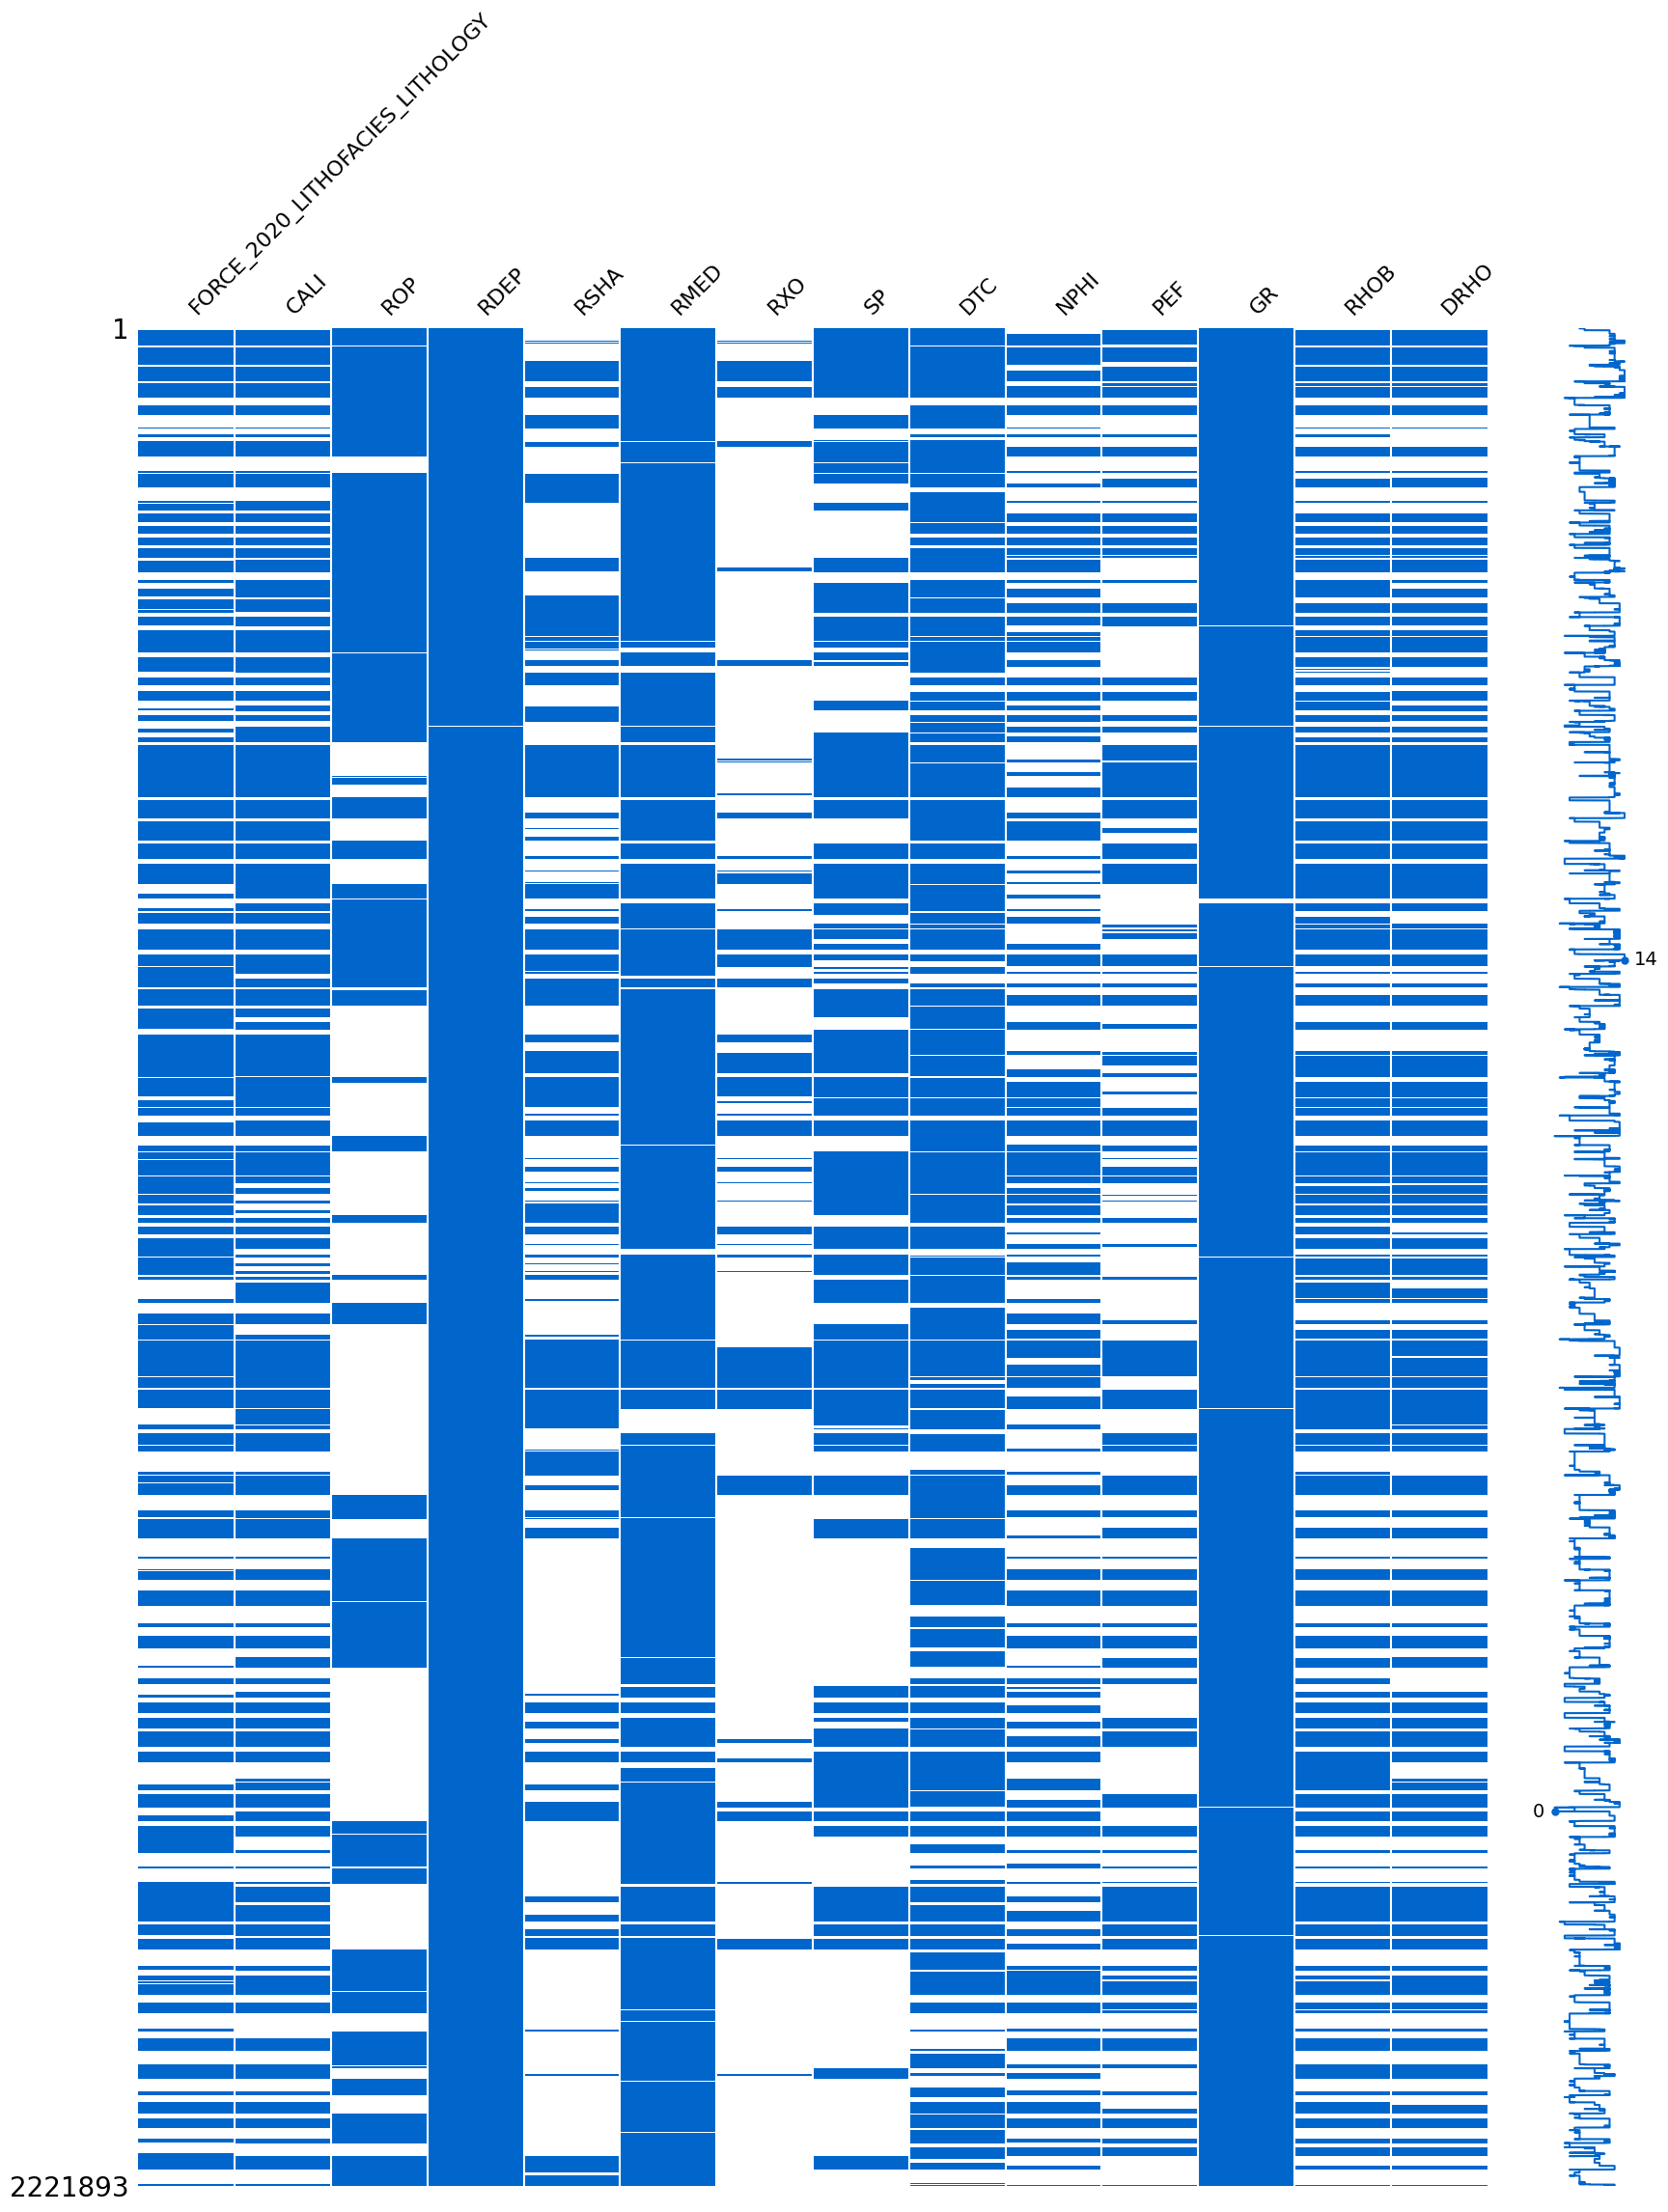

In [40]:
msno.matrix(data_df2
, color = (0 , 0.4 , 0.8))
fig = plt.gcf()
fig.set_size_inches(20, 25)

In [41]:
data_df2.columns

Index(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'CALI', 'ROP', 'RDEP', 'RSHA',
       'RMED', 'RXO', 'SP', 'DTC', 'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO'],
      dtype='object')

In [42]:
def fill_missing_values_except(df, exclude_columns):
    # Get all columns except the excluded ones
    columns_to_fill = [col for col in df.columns if col not in exclude_columns]

    # Fill missing values for these columns
    for col in columns_to_fill:
        data_df2[col].fillna(method='ffill', inplace=True)
        data_df2[col].fillna(method='bfill', inplace=True)

# Example usage:
exclude_columns = ['FORCE_2020_LITHOFACIES_LITHOLOGY']  # Replace with your actual column names
fill_missing_values_except(data_df2, exclude_columns)



C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\1136466729.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\1136466729.py:7: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\1136466729.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior 

In [43]:
# # prompt: fill missing nan value in CALI with ffill and b fill

# data_df2['CALI'].fillna(method='ffill', inplace=True)
# data_df2['CALI'].fillna(method='bfill', inplace=True)


# data_df2['ROP'].fillna(method='bfill', inplace=True)
# data_df2['ROP'].fillna(method='ffill', inplace=True)

# data_df2['RDEP'].fillna(method='bfill', inplace=True)
# data_df2['RDEP'].fillna(method='ffill', inplace=True)

# data_df2['RSHA'].fillna(method='bfill', inplace=True)
# data_df2['RSHA'].fillna(method='ffill', inplace=True)

# data_df2['RMED'].fillna(method='bfill', inplace=True)
# data_df2['RMED'].fillna(method='ffill', inplace=True)

# data_df2['RXO'].fillna(method='bfill', inplace=True)
# data_df2['RXO'].fillna(method='ffill', inplace=True)

# data_df2['SP'].fillna(method='bfill', inplace=True)
# data_df2['SP'].fillna(method='ffill', inplace=True)

# data_df2['DTC'].fillna(method='bfill', inplace=True)
# data_df2['DTC'].fillna(method='ffill', inplace=True)

# data_df2['NPHI'].fillna(method='bfill', inplace=True)
# data_df2['NPHI'].fillna(method='ffill', inplace=True)

# data_df2['PEF'].fillna(method='bfill', inplace=True)
# data_df2['PEF'].fillna(method='ffill', inplace=True)

# data_df2['GR'].fillna(method='bfill', inplace=True)
# data_df2['GR'].fillna(method='ffill', inplace=True)

# data_df2['RHOB'].fillna(method='bfill', inplace=True)
# data_df2['RHOB'].fillna(method='ffill', inplace=True)

# data_df2['DRHO'].fillna(method='bfill', inplace=True)
# data_df2['DRHO'].fillna(method='ffill', inplace=True)

# data_df1['GR'].fillna(method='bfill', inplace=True)
# data_df1['GR'].fillna(method='ffill', inplace=True)




In [44]:
missing_df2 = pd.DataFrame(data_df2.dtypes, columns=["dtypes"])
missing_df2["n_unique"] = data_df2.nunique()
missing_df2["bool"] = data_df2.isna().any()
missing_df2["nan"] = data_df2.isna().sum()
missing_df2["percent_nan"] = (missing_df2["nan"] / len(data_df2)) * 100

missing_df2.sort_values(by="nan", ascending=True)

dtypes  n_unique   bool     nan  \
CALI                              float64   1139732  False       0   
ROP                               float64   1060569  False       0   
RDEP                              float64   2106243  False       0   
RSHA                              float64    840831  False       0   
RMED                              float64   1990004  False       0   
RXO                               float64    337116  False       0   
SP                                float64   1149514  False       0   
DTC                               float64   1605812  False       0   
NPHI                              float64    984147  False       0   
PEF                               float64    896194  False       0   
GR                                float64   2081878  False       0   
RHOB                              float64   1130908  False       0   
DRHO                              float64   1242790  False       0   
FORCE_2020_LITHOFACIES_LITHOLOGY  float64        12   True  801766   

                                  percent_nan  
CALI                                     0.00  
ROP                                      0.00  
RDEP                                     0.00  
RSHA                                     0.00  
RMED                                     0.00  
RXO                                      0.00  
SP                                       0.00  
DTC                                      0.00  
NPHI                                     0.00  
PEF                                      0.00  
GR                                       0.00  
RHOB                                     0.00  
DRHO                                     0.00  
FORCE_2020_LITHOFACIES_LITHOLOGY        36.08

In [45]:
data_df2.describe()

FORCE_2020_LITHOFACIES_LITHOLOGY       CALI        ROP       RDEP  \
count                        1420127.00 2221893.00 2221893.00 2221893.00   
mean                           61337.06      11.69     209.05       8.79   
std                            13911.39       3.86    2247.94      93.66   
min                            30000.00       2.34     -21.50       0.00   
25%                            65000.00       8.53      10.60       0.93   
50%                            65000.00      11.96      17.15       1.41   
75%                            65000.00      13.31      39.68       2.32   
max                            99000.00      32.11   92429.16    2000.00   

            RSHA       RMED        RXO         SP        DTC       NPHI  \
count 2221893.00 2221893.00 2221893.00 2221893.00 2221893.00 2221893.00   
mean       26.36       5.27     -30.08      46.52     110.80       0.28   
std       160.93      57.67     648.72     135.70      33.09       0.14   
min         0.00       0.00    -999.90   -4351.74       0.00      -0.06   
25%         0.96       0.92       0.17      18.63      83.03       0.18   
50%         2.36       1.42       1.29      50.52     103.95       0.26   
75%         5.04       2.39      11.37      93.45     140.44       0.36   
max      2000.00    1999.95   35930.67     526.55     320.48       1.00   

             PEF         GR       RHOB       DRHO  
count 2221893.00 2221893.00 2221893.00 2221893.00  
mean        9.97      72.86       2.33     -31.63  
std        20.57      36.11       0.35     484.92  
min         0.10      -6.38       0.00   -7429.34  
25%         3.35      49.23       2.15      -0.01  
50%         4.69      69.94       2.41       0.01  
75%         7.60      90.80       2.55       0.04  
max       383.13    1141.29       3.46      49.83

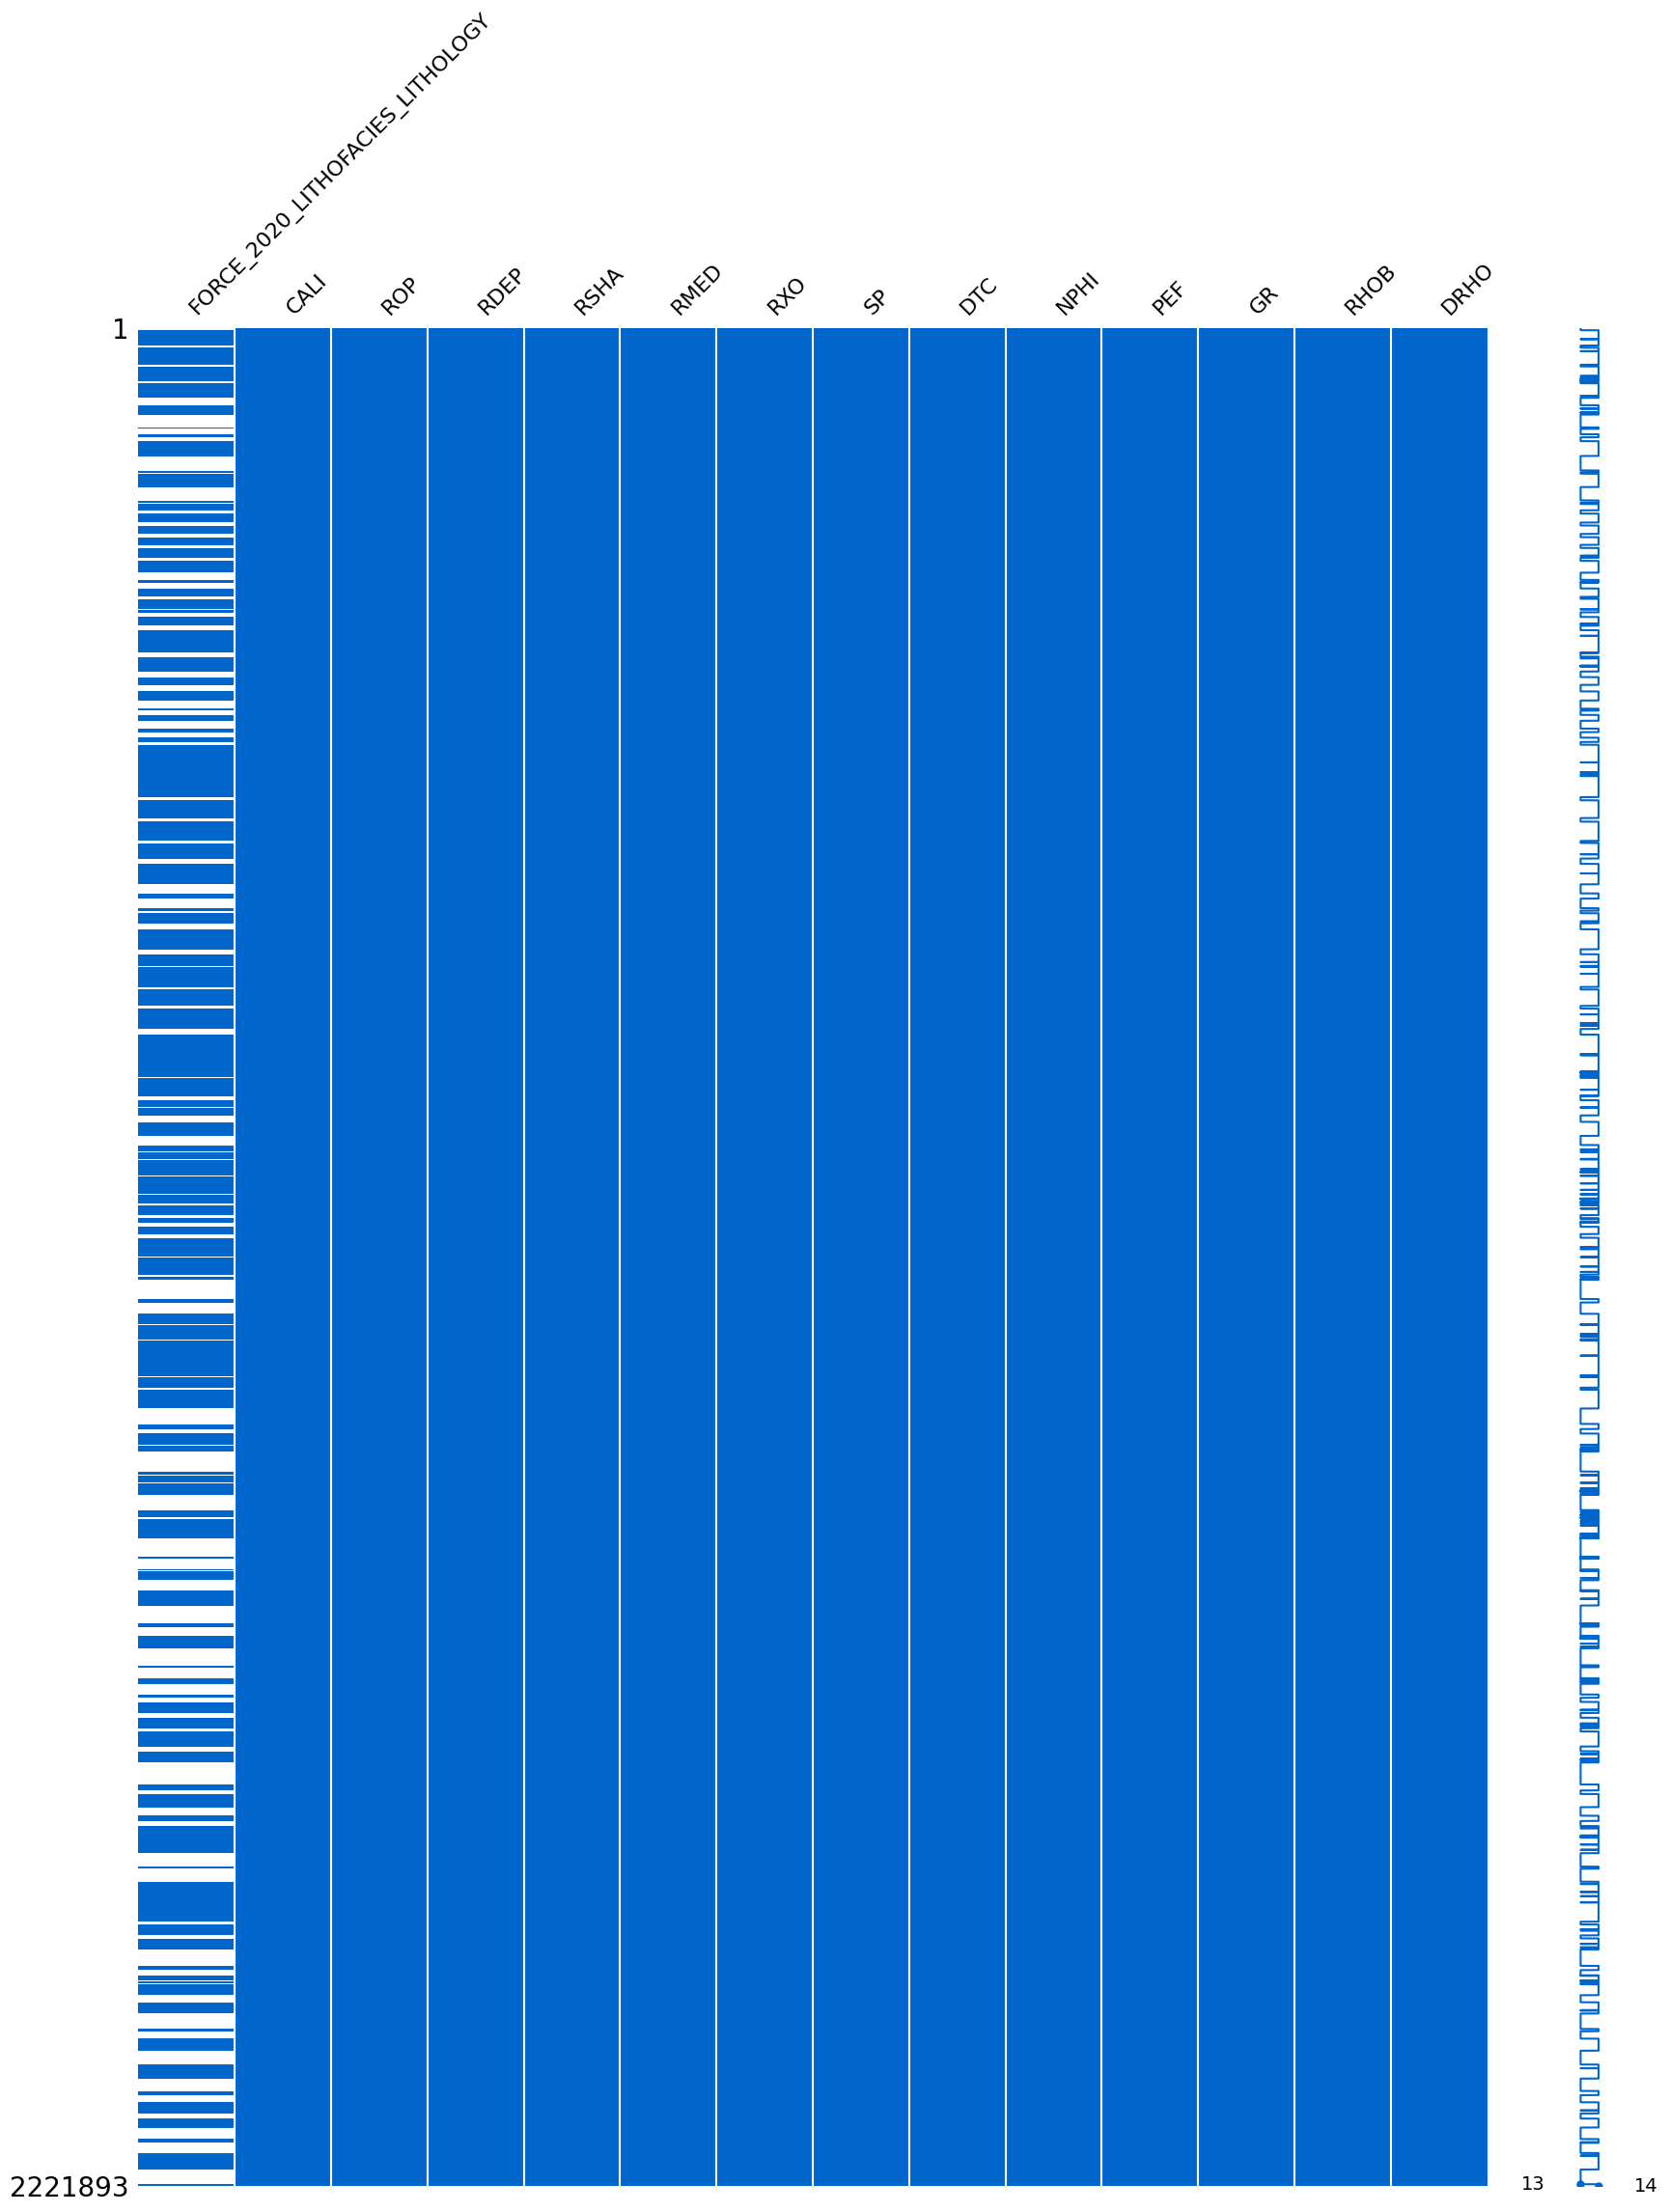

In [46]:
msno.matrix(data_df2
, color = (0 , 0.4 , 0.8))
fig = plt.gcf()
fig.set_size_inches(20, 25)

## 5.3. Remove Outlier

due to the large data set, lets devide the data into  groups to make the box plot more easy

<Axes: >

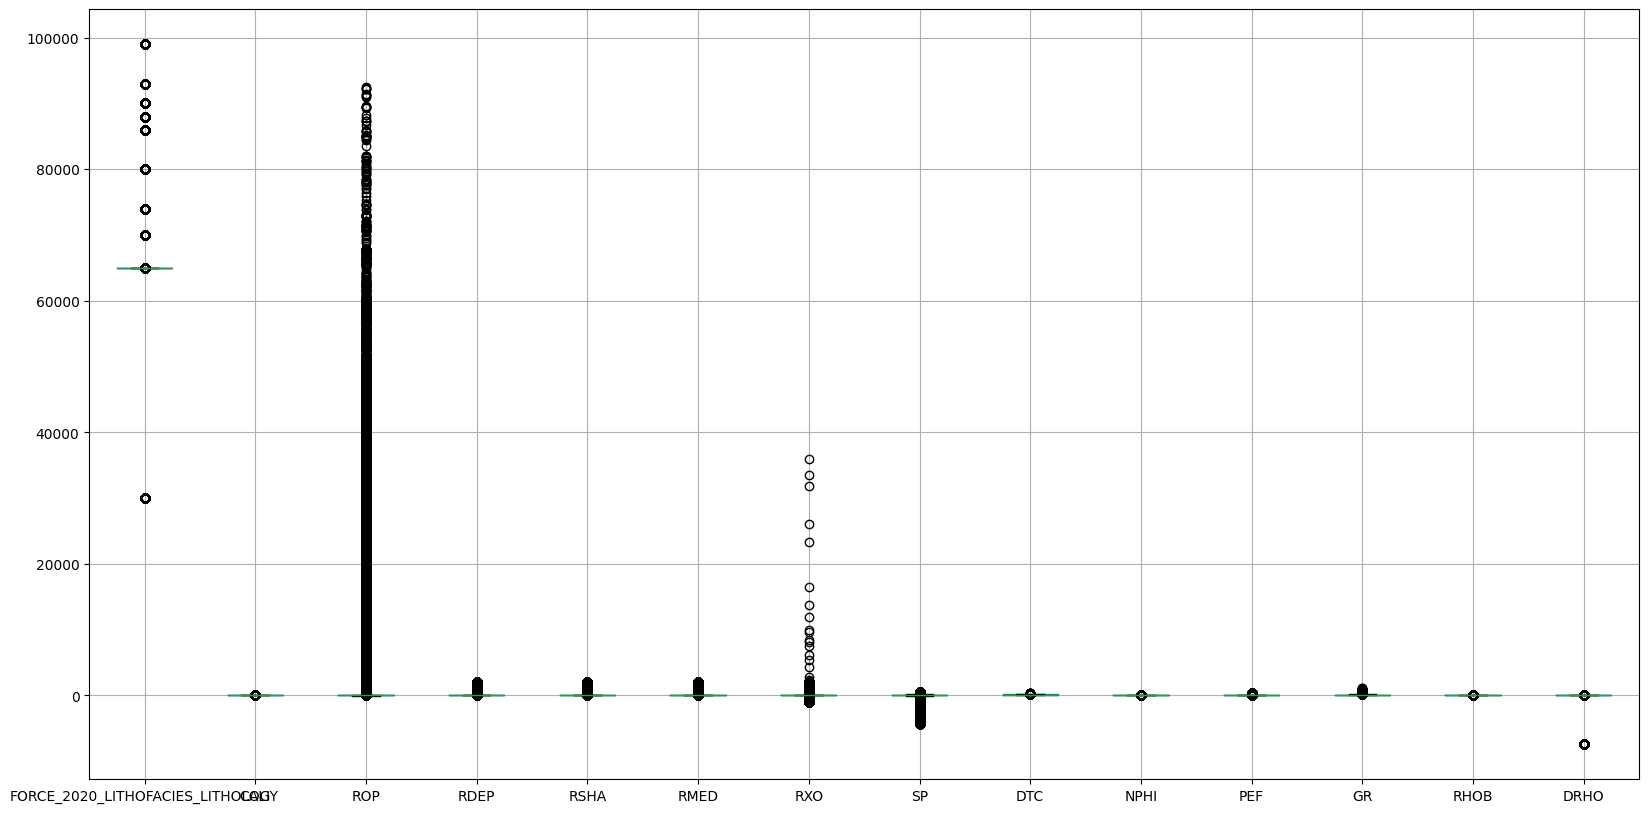

In [47]:
# make box plot for data_df1_1st_group

data_df2.boxplot(figsize=(20,10))


In [48]:
data_df2.describe()

FORCE_2020_LITHOFACIES_LITHOLOGY       CALI        ROP       RDEP  \
count                        1420127.00 2221893.00 2221893.00 2221893.00   
mean                           61337.06      11.69     209.05       8.79   
std                            13911.39       3.86    2247.94      93.66   
min                            30000.00       2.34     -21.50       0.00   
25%                            65000.00       8.53      10.60       0.93   
50%                            65000.00      11.96      17.15       1.41   
75%                            65000.00      13.31      39.68       2.32   
max                            99000.00      32.11   92429.16    2000.00   

            RSHA       RMED        RXO         SP        DTC       NPHI  \
count 2221893.00 2221893.00 2221893.00 2221893.00 2221893.00 2221893.00   
mean       26.36       5.27     -30.08      46.52     110.80       0.28   
std       160.93      57.67     648.72     135.70      33.09       0.14   
min         0.00       0.00    -999.90   -4351.74       0.00      -0.06   
25%         0.96       0.92       0.17      18.63      83.03       0.18   
50%         2.36       1.42       1.29      50.52     103.95       0.26   
75%         5.04       2.39      11.37      93.45     140.44       0.36   
max      2000.00    1999.95   35930.67     526.55     320.48       1.00   

             PEF         GR       RHOB       DRHO  
count 2221893.00 2221893.00 2221893.00 2221893.00  
mean        9.97      72.86       2.33     -31.63  
std        20.57      36.11       0.35     484.92  
min         0.10      -6.38       0.00   -7429.34  
25%         3.35      49.23       2.15      -0.01  
50%         4.69      69.94       2.41       0.01  
75%         7.60      90.80       2.55       0.04  
max       383.13    1141.29       3.46      49.83

In [49]:
#Remove Outlier ising cliping of data

def clip_data_df2(data_df2):
    clip_ranges = {
        'ROP': (0, 100),
        'RDEP': (0.2, 2000),
        'RSHA': (0.2, 2000),
        'RMED': (0.2, 2000),
        'RXO': (0.2, 2000),
        'SP': (-100, 100),
        'DTC': (40, 140),
        'PEF': (0, 10),
        'GR': (0, 200),
        'DRHO': (0, 50),
        'RHOB': (1.95, 2.95)
    }

    for col, (lower, upper) in clip_ranges.items():
        data_df2[col] = data_df2[col].clip(lower=lower, upper=upper)

# Usage:
clip_data_df2(data_df2)


In [50]:
data_df2.describe()


FORCE_2020_LITHOFACIES_LITHOLOGY       CALI        ROP       RDEP  \
count                        1420127.00 2221893.00 2221893.00 2221893.00   
mean                           61337.06      11.69      29.14       8.79   
std                            13911.39       3.86      26.95      93.66   
min                            30000.00       2.34       0.00       0.20   
25%                            65000.00       8.53      10.60       0.93   
50%                            65000.00      11.96      17.15       1.41   
75%                            65000.00      13.31      39.68       2.32   
max                            99000.00      32.11     100.00    2000.00   

            RSHA       RMED        RXO         SP        DTC       NPHI  \
count 2221893.00 2221893.00 2221893.00 2221893.00 2221893.00 2221893.00   
mean       26.36       5.27     151.97      39.13     107.21       0.28   
std       160.93      57.67     472.38      61.74      27.15       0.14   
min         0.20       0.20       0.20    -100.00      40.00      -0.06   
25%         0.96       0.92       0.20      18.63      83.03       0.18   
50%         2.36       1.42       1.29      50.52     103.95       0.26   
75%         5.04       2.39      11.37      93.45     140.00       0.36   
max      2000.00    1999.95    2000.00     100.00     140.00       1.00   

             PEF         GR       RHOB       DRHO  
count 2221893.00 2221893.00 2221893.00 2221893.00  
mean        5.42      72.53       2.36       0.18  
std         2.62      34.46       0.23       2.36  
min         0.10       0.00       1.95       0.00  
25%         3.35      49.23       2.15       0.00  
50%         4.69      69.94       2.41       0.01  
75%         7.60      90.80       2.55       0.04  
max        10.00     200.00       2.95      49.83

In [51]:
data_df2.shape

(2221893, 14)

In [52]:
data_df2.dropna(subset=["FORCE_2020_LITHOFACIES_LITHOLOGY"], inplace=True)

In [53]:
data_df2.shape


(1420127, 14)

In [54]:
final_df = data_df2.copy()

In [55]:
#  rename 'FORCE_2020_LITHOFACIES_LITHOLOGY' with Facies

final_df = final_df.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'Facies'})


In [56]:
final_df.columns

Index(['Facies', 'CALI', 'ROP', 'RDEP', 'RSHA', 'RMED', 'RXO', 'SP', 'DTC',
       'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO'],
      dtype='object')

## 5.4. Lithology Mapping

In [57]:
final_df["Facies"].value_counts()

Facies
65000.00    874682
30000.00    206652
65030.00    179422
70000.00     69486
80000.00     40375
99000.00     17431
70032.00     12900
88000.00     10417
90000.00      4754
74000.00      2385
86000.00      1482
93000.00       141
Name: count, dtype: int64

In [58]:
# Lthology from label to number
Lithology = lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11,}


In [59]:
final_df["Facies"] = final_df["Facies"].map(Lithology)

In [60]:
final_df["Facies"].value_counts()

Facies
2     874682
0     206652
1     179422
5      69486
3      40375
9      17431
6      12900
7      10417
10      4754
4       2385
8       1482
11       141
Name: count, dtype: int64

In [61]:
facies_num = {0: {'hatch': '..', 'color':"#FFFF00"},
                 1: { 'hatch':'-.', 'color':'#6eea57'},
                 2: {'hatch':'--', 'color':'#0e4e25'},
                 3: {'hatch':'', 'color':'#00cdcd'},
                 4: {'hatch':'-/', 'color':'#e5c100'},
                 5: {'hatch':'+', 'color':'#3c03e2'},
                 6: {'hatch':'..', 'color':'#92b9e5'},
                 9: {'hatch':'', 'color':'#cdb6b3'},
                 10:{'hatch':'||', 'color':'#ff4500'},
                 11:{'hatch':'**', 'color':'#291a3e'},
                 12:{'hatch':'//', 'color':'#cdb6b3'},
                 }

In [62]:
final_df.columns

Index(['Facies', 'CALI', 'ROP', 'RDEP', 'RSHA', 'RMED', 'RXO', 'SP', 'DTC',
       'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO'],
      dtype='object')

In [63]:
final_df

Facies  CALI   ROP  RDEP  RSHA  RMED  RXO    SP    DTC  \
Wellname DEPTH_MD                                                           
15_9-13  494.53         2 19.48 34.64  1.80  0.30  1.61 0.27 24.61 140.00   
         494.68         2 19.47 34.64  1.80  0.30  1.62 0.27 23.90 140.00   
         494.83         2 19.47 34.78  1.80  0.30  1.63 0.27 23.92 140.00   
         494.98         2 19.46 39.97  1.80  0.30  1.62 0.27 23.79 140.00   
         495.14         2 19.45 57.48  1.80  0.30  1.60 0.27 24.10 140.00   
...                   ...   ...   ...   ...   ...   ...  ...   ...    ...   
7_1-2 S  3168.10        0  8.40 28.64  1.08  1.23  1.37 7.14 20.72  99.16   
         3168.25        1  8.40 28.98  0.99  0.97  1.06 7.14 20.72  99.16   
         3168.40        1  8.39 29.02  0.90  0.79  0.83 7.14 20.72  99.16   
         3168.55        1  8.40 28.65  0.88  0.84  0.84 7.14 20.72  99.16   
         3168.70        0  8.39 28.11  0.88  0.82  0.79 7.14 20.72  99.16   

                   NPHI   PEF    GR  RHOB  DRHO  
Wellname DEPTH_MD                                
15_9-13  494.53    0.77 10.00 80.20  1.95  0.00  
         494.68    0.77 10.00 79.26  1.95  0.00  
         494.83    0.77 10.00 74.82  1.95  0.00  
         494.98    0.77 10.00 72.88  1.95  0.00  
         495.14    0.77 10.00 71.73  1.95  0.00  
...                 ...   ...   ...   ...   ...  
7_1-2 S  3168.10   0.14  6.66 50.96  2.42  0.00  
         3168.25   0.14  6.64 63.44  2.41  0.00  
         3168.40   0.14  6.23 63.25  2.40  0.00  
         3168.55   0.14  5.86 49.72  2.38  0.01  
         3168.70   0.14  5.62 39.57  2.38  0.03  

[1420127 rows x 14 columns]

## 5.5. Data Re-Index

In [64]:
# re-index the data
new_order = [ 'GR', 'CALI','RSHA', 'RMED', 'RDEP', 'RXO','RHOB', 'SP','NPHI', 'PEF', 'DTC',  'ROP', "DRHO" ,'Facies' ]
final_df = final_df.reindex(columns=new_order)


## 5.6. Check Co-linearity

it is an important step to check the correlation between the logs with each other,

High correlation between two features can significantly impact the prediction of another feature in several ways:

**Multicollinearity**: When two features are highly correlated, it can lead to multicollinearity in regression models. This makes it difficult to determine the individual effect of each feature on the target variable, leading to unstable coefficient estimates.

**Overfitting**: Models may become overly complex if they include both correlated features, capturing noise rather than the underlying relationship, which can reduce generalization to new data.

**Reduced Interpretability**: High correlation complicates the interpretation of model results, as it becomes unclear which feature is driving the prediction.

**Inflated Variance**: The variance of the estimated coefficients may increase, making the model sensitive to small changes in the data.

In [65]:
# check log colinearity

corr_matrix = final_df.drop('Facies', axis=1).corr()
corr_matrix


GR  CALI  RSHA  RMED  RDEP   RXO  RHOB    SP  NPHI   PEF   DTC   ROP  \
GR    1.00 -0.24 -0.11 -0.02 -0.12 -0.03  0.11 -0.05  0.20 -0.06  0.03  0.10   
CALI -0.24  1.00 -0.00 -0.04 -0.03 -0.04 -0.37  0.04  0.11  0.01  0.52 -0.01   
RSHA -0.11 -0.00  1.00  0.08  0.29  0.25 -0.04  0.01 -0.02  0.00 -0.09  0.02   
RMED -0.02 -0.04  0.08  1.00  0.10 -0.01  0.02 -0.03 -0.03  0.02 -0.10 -0.01   
RDEP -0.12 -0.03  0.29  0.10  1.00  0.02 -0.06 -0.01 -0.12 -0.05 -0.12  0.03   
RXO  -0.03 -0.04  0.25 -0.01  0.02  1.00 -0.10  0.07 -0.00  0.01  0.03  0.20   
RHOB  0.11 -0.37 -0.04  0.02 -0.06 -0.10  1.00 -0.06 -0.34  0.03 -0.65 -0.12   
SP   -0.05  0.04  0.01 -0.03 -0.01  0.07 -0.06  1.00 -0.00  0.09  0.07  0.05   
NPHI  0.20  0.11 -0.02 -0.03 -0.12 -0.00 -0.34 -0.00  1.00 -0.05  0.43  0.13   
PEF  -0.06  0.01  0.00  0.02 -0.05  0.01  0.03  0.09 -0.05  1.00 -0.04 -0.14   
DTC   0.03  0.52 -0.09 -0.10 -0.12  0.03 -0.65  0.07  0.43 -0.04  1.00  0.08   
ROP   0.10 -0.01  0.02 -0.01  0.03  0.20 -0.12  0.05  0.13 -0.14  0.08  1.00   
DRHO -0.02  0.04  0.00 -0.01 -0.01 -0.01  0.10 -0.09  0.00 -0.13  0.07 -0.07   

      DRHO  
GR   -0.02  
CALI  0.04  
RSHA  0.00  
RMED -0.01  
RDEP -0.01  
RXO  -0.01  
RHOB  0.10  
SP   -0.09  
NPHI  0.00  
PEF  -0.13  
DTC   0.07  
ROP  -0.07  
DRHO  1.00

<Axes: >

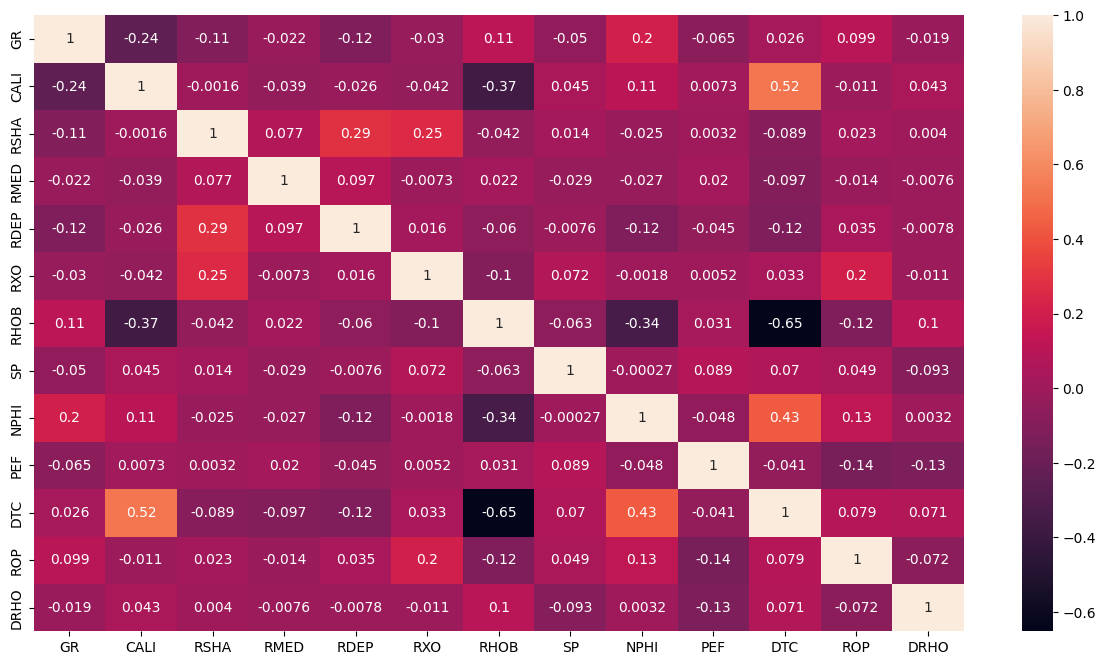

In [66]:
plt.figure(figsize = (15 , 8))
sns.heatmap(corr_matrix , annot = True)

In [67]:
final_df

GR  CALI  RSHA  RMED  RDEP  RXO  RHOB    SP  NPHI   PEF  \
Wellname DEPTH_MD                                                              
15_9-13  494.53   80.20 19.48  0.30  1.61  1.80 0.27  1.95 24.61  0.77 10.00   
         494.68   79.26 19.47  0.30  1.62  1.80 0.27  1.95 23.90  0.77 10.00   
         494.83   74.82 19.47  0.30  1.63  1.80 0.27  1.95 23.92  0.77 10.00   
         494.98   72.88 19.46  0.30  1.62  1.80 0.27  1.95 23.79  0.77 10.00   
         495.14   71.73 19.45  0.30  1.60  1.80 0.27  1.95 24.10  0.77 10.00   
...                 ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   
7_1-2 S  3168.10  50.96  8.40  1.23  1.37  1.08 7.14  2.42 20.72  0.14  6.66   
         3168.25  63.44  8.40  0.97  1.06  0.99 7.14  2.41 20.72  0.14  6.64   
         3168.40  63.25  8.39  0.79  0.83  0.90 7.14  2.40 20.72  0.14  6.23   
         3168.55  49.72  8.40  0.84  0.84  0.88 7.14  2.38 20.72  0.14  5.86   
         3168.70  39.57  8.39  0.82  0.79  0.88 7.14  2.38 20.72  0.14  5.62   

                     DTC   ROP  DRHO  Facies  
Wellname DEPTH_MD                             
15_9-13  494.53   140.00 34.64  0.00       2  
         494.68   140.00 34.64  0.00       2  
         494.83   140.00 34.78  0.00       2  
         494.98   140.00 39.97  0.00       2  
         495.14   140.00 57.48  0.00       2  
...                  ...   ...   ...     ...  
7_1-2 S  3168.10   99.16 28.64  0.00       0  
         3168.25   99.16 28.98  0.00       1  
         3168.40   99.16 29.02  0.00       1  
         3168.55   99.16 28.65  0.01       1  
         3168.70   99.16 28.11  0.03       0  

[1420127 rows x 14 columns]

# **6. Validation well**

In [68]:
# create blind well from the dataframe

validation_well_name = '15_9-17'
validation_well= final_df.loc[validation_well_name]

# Drop Validation Well from the training data
final_df = final_df.drop(index=validation_well_name)




In [69]:
validation_well

GR  CALI  RSHA  RMED  RDEP     RXO  RHOB     SP  NPHI   PEF  \
DEPTH_MD                                                                   
472.43    78.81 19.24  0.98  1.90  1.93    0.20  2.14   1.86  0.28 10.00   
472.58    78.27 19.20  0.98  1.86  1.92    0.20  2.13   2.23  0.28 10.00   
472.73    79.38 19.18  0.98  1.85  1.92    0.20  2.15   1.24  0.28 10.00   
472.89    80.99 19.18  0.98  1.80  1.92    0.20  2.20   0.64  0.28 10.00   
473.04    80.97 19.17  0.98  1.74  1.92    0.20  2.33   1.47  0.28 10.00   
...         ...   ...   ...   ...   ...     ...   ...    ...   ...   ...   
3114.04  108.31  6.05  2.81  2.30  1.91 2000.00  2.57 100.00  0.27  3.82   
3114.19  109.43  6.11  2.81  2.41  1.91 2000.00  2.56  98.93  0.27  3.83   
3114.34  111.74  6.02  2.81  2.55  1.90 2000.00  2.55  97.97  0.27  4.06   
3114.49  112.68  6.02  2.81  2.46  1.90 2000.00  2.55  96.06  0.27  4.43   
3114.65  112.68  6.02  2.81  2.25  1.90 2000.00  2.56  96.66  0.27  4.53   

            DTC   ROP  DRHO  Facies  
DEPTH_MD                             
472.43   140.00 48.69  0.00       2  
472.58   140.00 48.69  0.00       2  
472.73   140.00 48.69  0.00       2  
472.89   140.00 35.94  0.00       2  
473.04   140.00 32.21  0.00       2  
...         ...   ...   ...     ...  
3114.04   81.21  3.43  0.00       2  
3114.19   81.21  3.50  0.01       2  
3114.34   81.21  3.50  0.01       2  
3114.49   81.21  3.50  0.02       2  
3114.65   81.21  3.40  0.04       2  

[17351 rows x 14 columns]

In [70]:
# validation_well.to_csv('/content/drive/MyDrive/Machine Learning/Force2020/15-9-17.csv')


# **7. splitting & Scaling**

In [71]:
x_features = final_df.drop("Facies", axis=1)
y_labels = final_df["Facies"]

##

In [72]:
scaler = StandardScaler()
x_features = scaler.fit_transform(x_features)

In [73]:
y_labels.describe()

count   1402776.00
mean          1.95
std           1.54
min           0.00
25%           1.00
50%           2.00
75%           2.00
max          11.00
Name: Facies, dtype: float64

In [74]:
xtrain , xtest , ytrain , ytest = train_test_split(x_features , y_labels , test_size = 0.2 , random_state = 42)

In [75]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape )

(1122220, 13)
(280556, 13)
(1122220,)
(280556,)


# **8. Modeling**

## **8.1. Decision Tree**

### 8.1.1. Run DT Model For train_test data

In [76]:
# Decision Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(xtrain , ytrain)
ypred_dtc = dtc.predict(xtest)

In [77]:
print("Accuracy Score for Decision Tree : " , accuracy_score(ytest , ypred_dtc))
print(classification_report(ytest, ypred_dtc))

Accuracy Score for Decision Tree :  0.8969902621936441
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     40641
           1       0.79      0.79      0.79     35788
           2       0.94      0.94      0.94    172788
           3       0.80      0.80      0.80      8065
           4       0.38      0.37      0.38       450
           5       0.76      0.75      0.75     13584
           6       0.93      0.94      0.93      2536
           7       0.99      0.99      0.99      2051
           8       0.88      0.86      0.87       308
           9       0.81      0.80      0.81      3373
          10       0.68      0.64      0.66       934
          11       0.95      0.92      0.93        38

    accuracy                           0.90    280556
   macro avg       0.81      0.81      0.81    280556
weighted avg       0.90      0.90      0.90    280556



<Axes: >

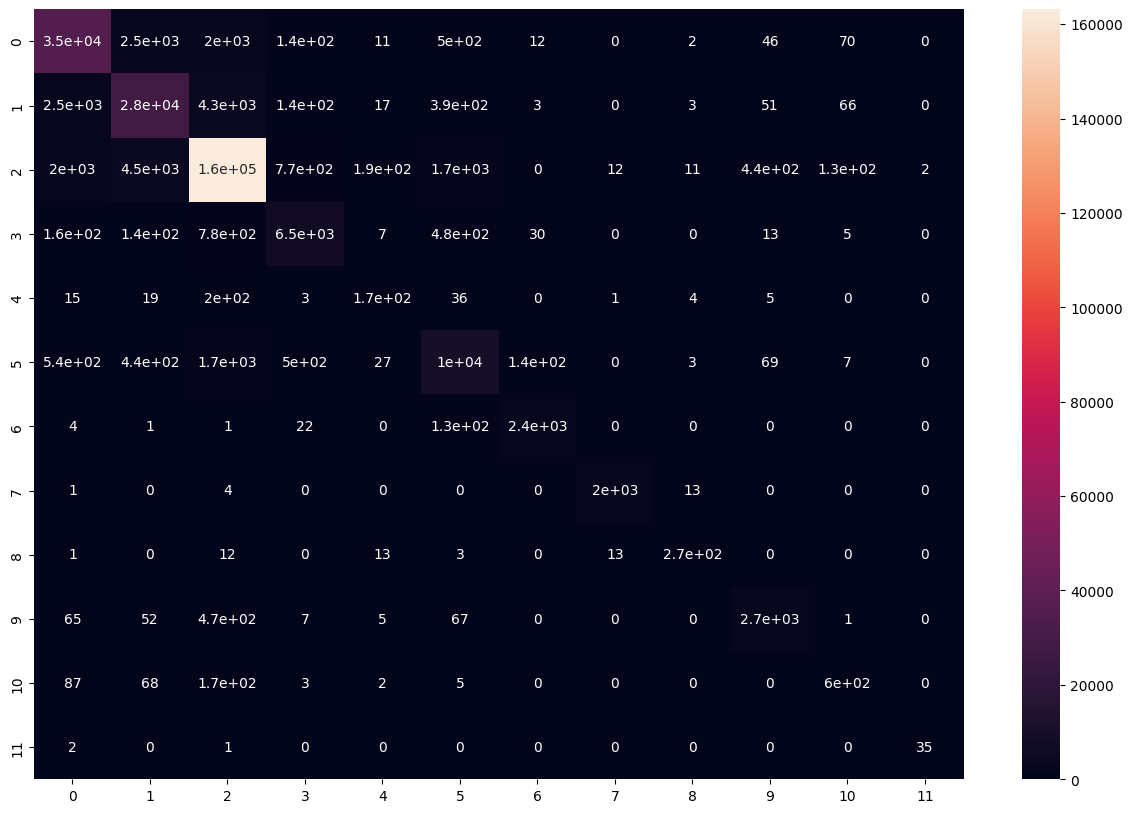

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(ytest , ypred_dtc) , annot=True)


### 8.1.2. Plotting

In [79]:
final_df_plotting = final_df.copy()

In [80]:
final_df_plotting.reset_index(inplace=True)
final_df_plotting.set_index("Wellname" , inplace=True)

In [81]:
final_df_plotting["Decision Tree"] = dtc.predict(x_features)


In [82]:
final_df_plotting

DEPTH_MD    GR  CALI  RSHA  RMED  RDEP  RXO  RHOB    SP  NPHI   PEF  \
Wellname                                                                        
15_9-13     494.53 80.20 19.48  0.30  1.61  1.80 0.27  1.95 24.61  0.77 10.00   
15_9-13     494.68 79.26 19.47  0.30  1.62  1.80 0.27  1.95 23.90  0.77 10.00   
15_9-13     494.83 74.82 19.47  0.30  1.63  1.80 0.27  1.95 23.92  0.77 10.00   
15_9-13     494.98 72.88 19.46  0.30  1.62  1.80 0.27  1.95 23.79  0.77 10.00   
15_9-13     495.14 71.73 19.45  0.30  1.60  1.80 0.27  1.95 24.10  0.77 10.00   
...            ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   
7_1-2 S    3168.10 50.96  8.40  1.23  1.37  1.08 7.14  2.42 20.72  0.14  6.66   
7_1-2 S    3168.25 63.44  8.40  0.97  1.06  0.99 7.14  2.41 20.72  0.14  6.64   
7_1-2 S    3168.40 63.25  8.39  0.79  0.83  0.90 7.14  2.40 20.72  0.14  6.23   
7_1-2 S    3168.55 49.72  8.40  0.84  0.84  0.88 7.14  2.38 20.72  0.14  5.86   
7_1-2 S    3168.70 39.57  8.39  0.82  0.79  0.88 7.14  2.38 20.72  0.14  5.62   

            DTC   ROP  DRHO  Facies  Decision Tree  
Wellname                                            
15_9-13  140.00 34.64  0.00       2              2  
15_9-13  140.00 34.64  0.00       2              2  
15_9-13  140.00 34.78  0.00       2              2  
15_9-13  140.00 39.97  0.00       2              2  
15_9-13  140.00 57.48  0.00       2              2  
...         ...   ...   ...     ...            ...  
7_1-2 S   99.16 28.64  0.00       0              0  
7_1-2 S   99.16 28.98  0.00       1              1  
7_1-2 S   99.16 29.02  0.00       1              1  
7_1-2 S   99.16 28.65  0.01       1              1  
7_1-2 S   99.16 28.11  0.03       0              0  

[1402776 rows x 16 columns]

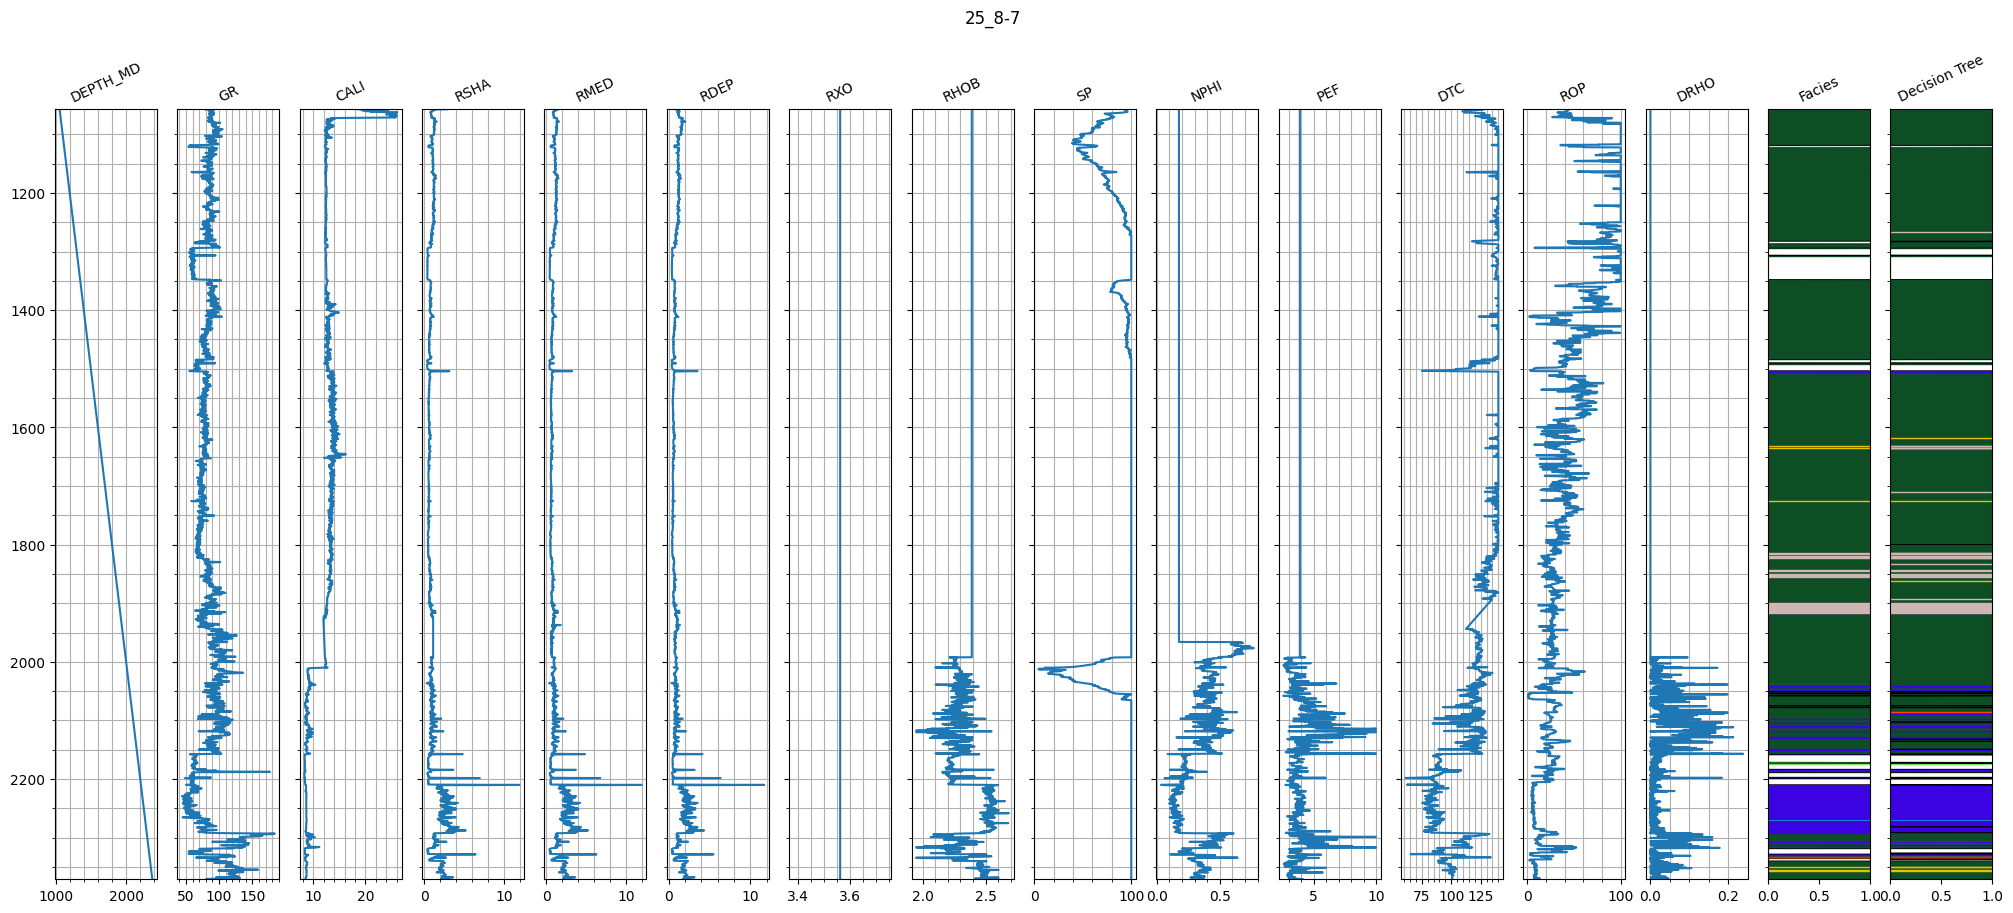

In [83]:
# Select display well
well_plotting = final_df_plotting[final_df_plotting.index == "25_8-7"]
curvenames = well_plotting.columns
rows , cols = 1 , final_df_plotting.shape[1]
fig , ax= plt.subplots(rows , cols , figsize=(25,10) , sharey=True)

# to make title for figure according to well name
fig.suptitle(well_plotting.index[0])
for col in range(cols):
  if col < cols-2:
    ax[col].plot(well_plotting.iloc[:, col] , well_plotting["DEPTH_MD"])
    ax[col].set_ylim(max(well_plotting["DEPTH_MD"]) , min(well_plotting["DEPTH_MD"]))
    ax[col].grid(which = "both")
    # ax[col].grid(which = "minor")
    ax[col].minorticks_on()
    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

  elif col >= col-2:
    ax[col].set_xlim(0 ,1)
    ax[col].plot(well_plotting.iloc[: , col] , well_plotting["DEPTH_MD"] , color = "black", linewidth = 0.5)
    for key in facies_num.keys():
      color = facies_num[key]['color']
      hatch = facies_num[key]['hatch']
      ax[col].fill_betweenx( well_plotting["DEPTH_MD"] , 0, well_plotting.iloc[:, col] , where=(well_plotting.iloc[:, col] == key), color=color, hatch=facies_num[key]['hatch'])


    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

   Feature  Importance
0       GR        0.21
1     CALI        0.10
10     DTC        0.10
8     NPHI        0.08
4     RDEP        0.08
6     RHOB        0.07
7       SP        0.07
11     ROP        0.06
3     RMED        0.06
2     RSHA        0.05
5      RXO        0.05
9      PEF        0.04
12    DRHO        0.02


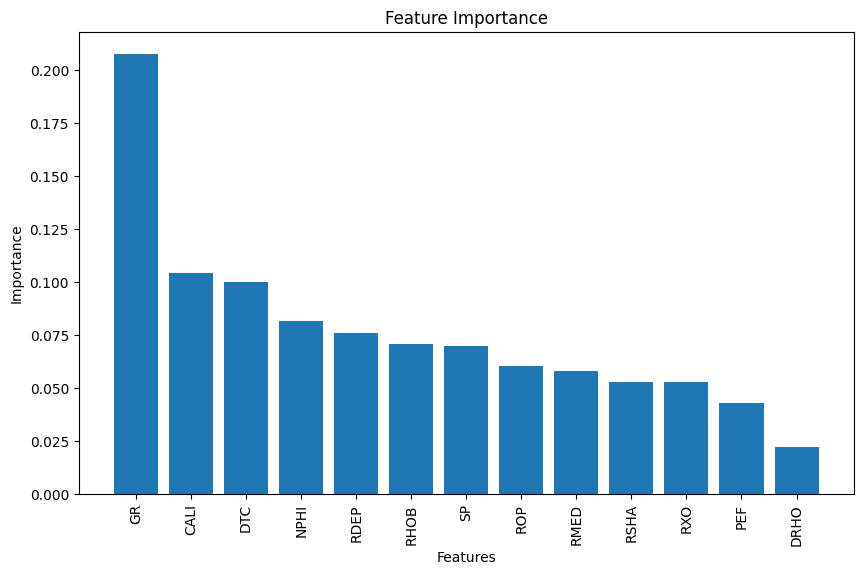

In [84]:
# generate feature importance

importances = dtc.feature_importances_
feature_names = final_df.drop("Facies", axis=1).columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print or display the feature importances
print(feature_importances_df)

# You can also visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


### 8.1.3. Save DTC Model

In [85]:
# save the model as pkl

# Save the model to a file
filename = 'decision_tree_model.pkl'
pickle.dump(dtc, open(filename, 'wb'))


### 8.1.4. Run DT for the Validation Well

#### 8.1.4.1 Load & Run Model

In [86]:
# Load the model from the file
loaded_dtc = pickle.load(open('decision_tree_model.pkl', 'rb'))

In [87]:
# Prepare the validation data
validation_well_features = validation_well.drop("Facies", axis=1)
validation_well_features = scaler.transform(validation_well_features)  # Use the same scaler


In [88]:
# Predict lithofacies for the validation well
validation_well_predictions = loaded_dtc.predict(validation_well_features)

# Add predictions to the validation well DataFrame
validation_well["Decision Tree"] = validation_well_predictions

# Now you can use the validation_well DataFrame with the predictions


C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\181797066.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 8.1.4.2. Validation Well plotting

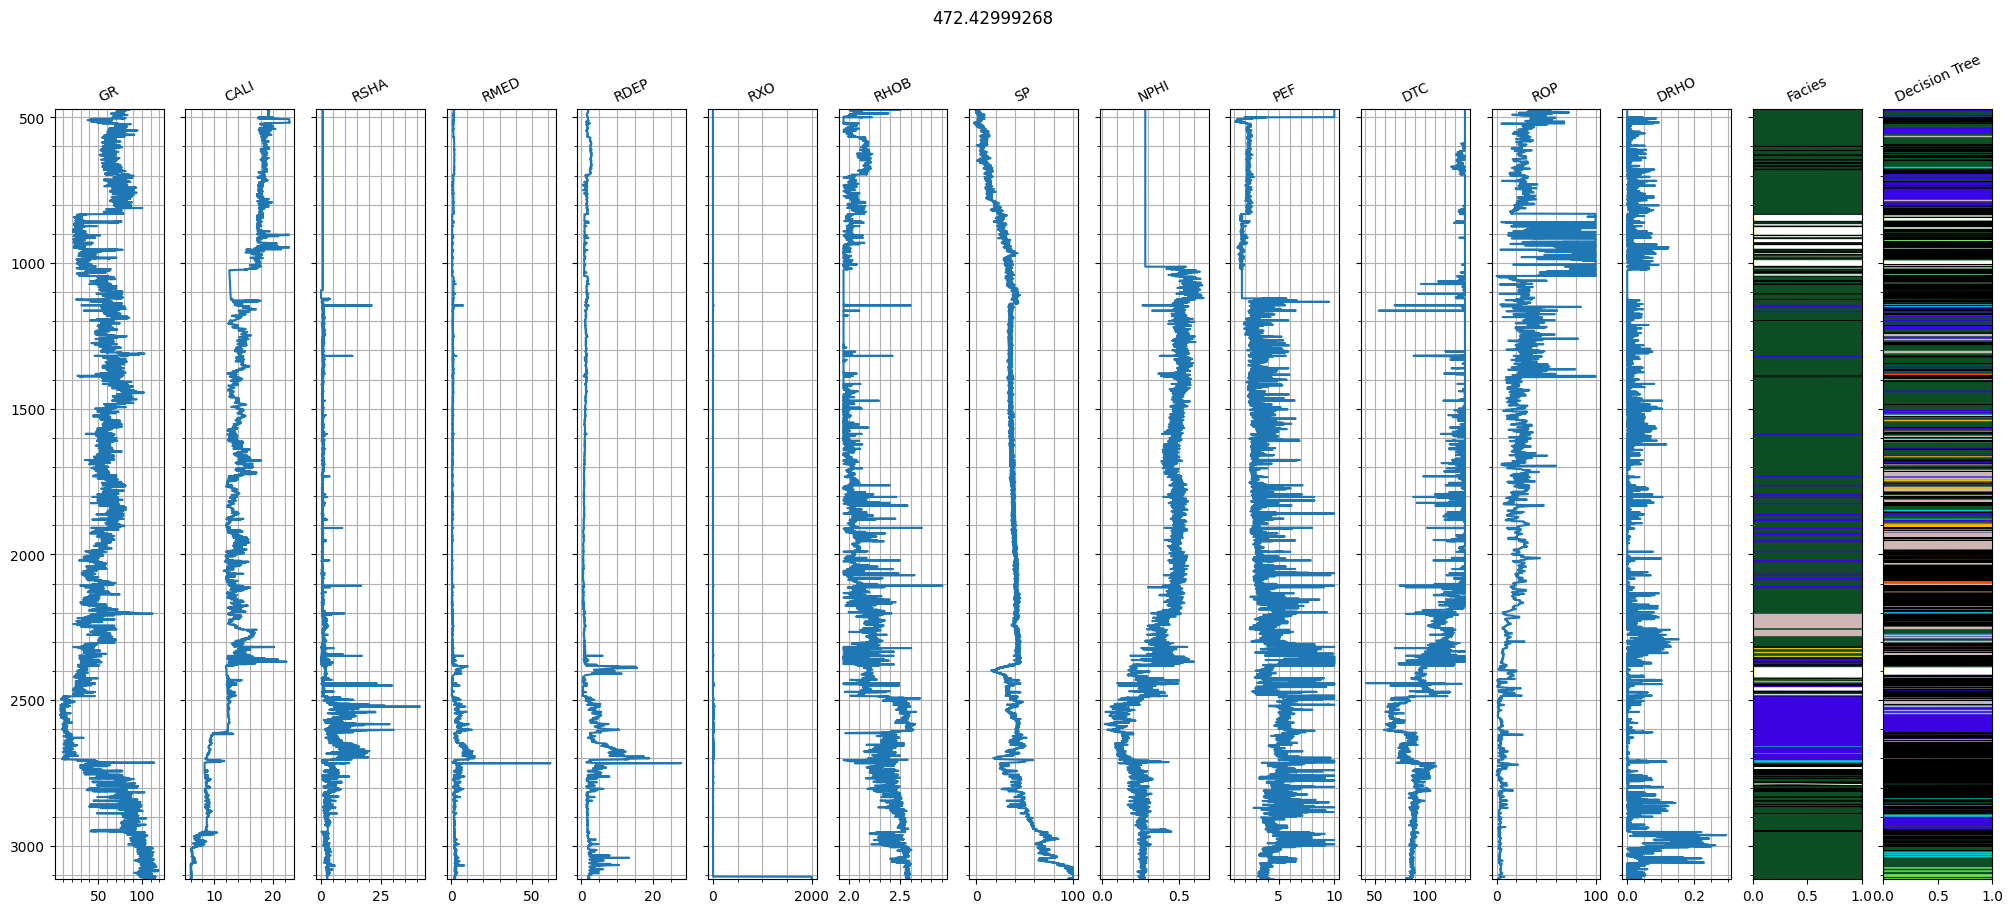

In [89]:
# Select display well
well_plotting = validation_well
curvenames = validation_well.columns
rows , cols = 1 , validation_well.shape[1]
fig , ax= plt.subplots(rows , cols , figsize=(25,10) , sharey=True)

# to make title for figure according to well name
fig.suptitle(well_plotting.index[0])
for col in range(cols):
  if col < cols-2:
    ax[col].plot(well_plotting.iloc[:, col] , well_plotting.index)
    ax[col].set_ylim(max(well_plotting.index) , min(well_plotting.index))
    ax[col].grid(which = "both")
    # ax[col].grid(which = "minor")
    ax[col].minorticks_on()
    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

  elif col >= col-2:
    ax[col].set_xlim(0 ,1)
    ax[col].plot(well_plotting.iloc[: , col] , well_plotting.index , color = "black", linewidth = 0.5)
    for key in facies_num.keys():
      color = facies_num[key]['color']
      hatch = facies_num[key]['hatch']
      ax[col].fill_betweenx( well_plotting.index , 0, well_plotting.iloc[:, col] , where=(well_plotting.iloc[:, col] == key), color=color, hatch=facies_num[key]['hatch'])


    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

Accuracy Score for Validation Well :  0.6629589072675927
              precision    recall  f1-score   support

           0       0.55      0.78      0.65      2312
           1       0.02      0.18      0.04       301
           2       0.94      0.70      0.80     12694
           3       0.12      0.17      0.14       225
           4       0.00      0.00      0.00        18
           5       0.56      0.47      0.51      1481
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.15      0.22      0.17       320
          10       0.00      0.00      0.00         0

    accuracy                           0.66     17351
   macro avg       0.23      0.25      0.23     17351
weighted avg       0.82      0.66      0.72     17351



c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



<Axes: >

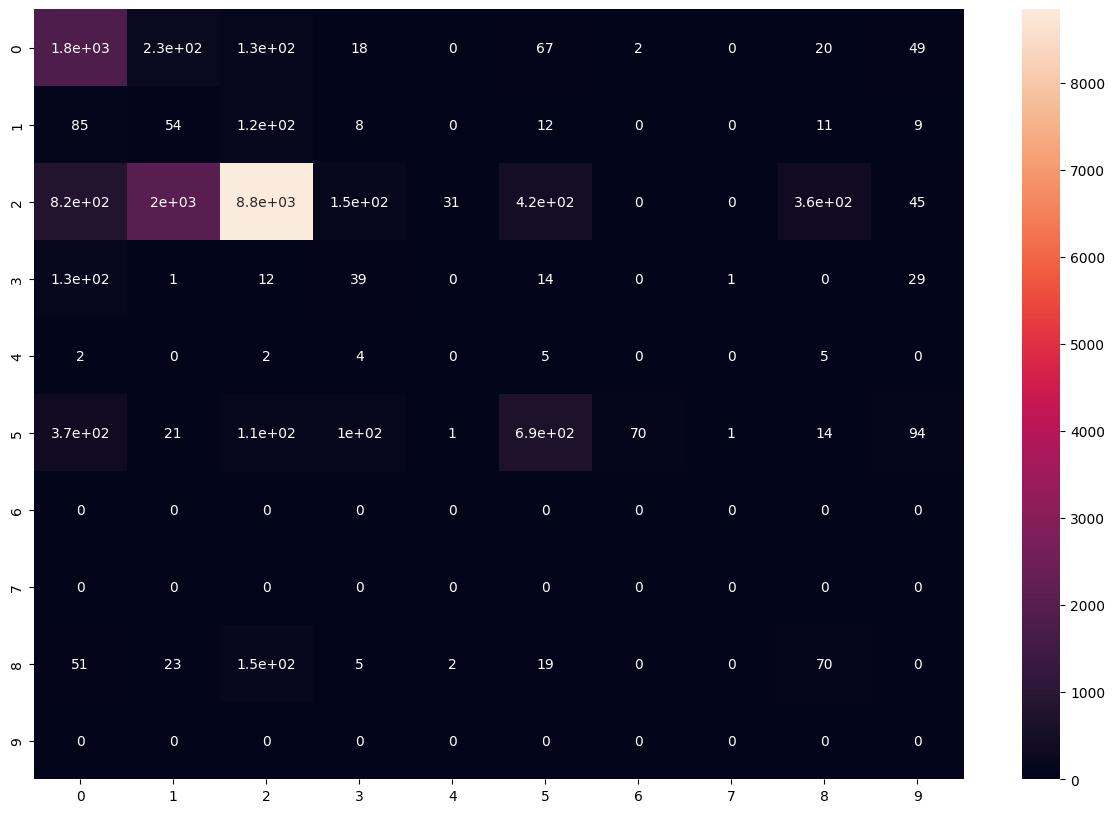

In [90]:
# accuracy of validation well

import matplotlib.pyplot as plt
print("Accuracy Score for Validation Well : " , accuracy_score(validation_well["Facies"] , validation_well["Decision Tree"]))
print(classification_report(validation_well["Facies"], validation_well["Decision Tree"]))
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(validation_well["Facies"] , validation_well["Decision Tree"]) , annot=True)


## **8.2. Random Forest**

### 8.2.1. Run RF Model For train_test data

In [91]:
RFM = RandomForestClassifier(random_state=42)
RFM.fit(xtrain , ytrain)
ypred_RFM = RFM.predict(xtest)

In [92]:
print("Accuracy Score for Random Forest : " , accuracy_score(ytest , ypred_RFM))
print(classification_report(ytest, ypred_RFM))

Accuracy Score for Random Forest :  0.9402507877215244
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     40641
           1       0.90      0.86      0.88     35788
           2       0.95      0.98      0.97    172788
           3       0.92      0.86      0.89      8065
           4       0.86      0.33      0.48       450
           5       0.93      0.77      0.84     13584
           6       0.96      0.97      0.96      2536
           7       0.99      0.99      0.99      2051
           8       0.94      0.91      0.92       308
           9       0.95      0.86      0.90      3373
          10       0.89      0.69      0.77       934
          11       1.00      1.00      1.00        38

    accuracy                           0.94    280556
   macro avg       0.93      0.85      0.88    280556
weighted avg       0.94      0.94      0.94    280556



<Axes: >

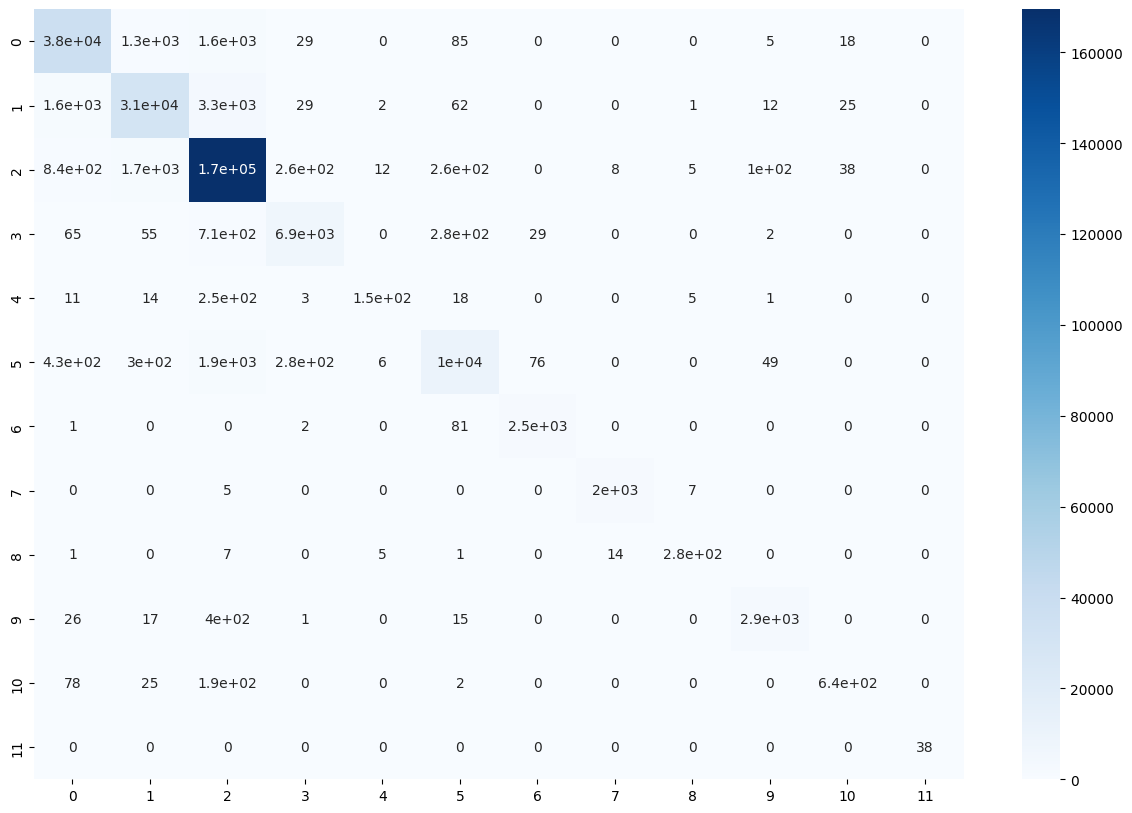

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(ytest , ypred_RFM) , annot=True , cmap="Blues")

In [94]:
final_df_plotting["Random Forest"] = RFM.predict(x_features)


### 8.2.2. Plotting

In [95]:
final_df_plotting


DEPTH_MD    GR  CALI  RSHA  RMED  RDEP  RXO  RHOB    SP  NPHI   PEF  \
Wellname                                                                        
15_9-13     494.53 80.20 19.48  0.30  1.61  1.80 0.27  1.95 24.61  0.77 10.00   
15_9-13     494.68 79.26 19.47  0.30  1.62  1.80 0.27  1.95 23.90  0.77 10.00   
15_9-13     494.83 74.82 19.47  0.30  1.63  1.80 0.27  1.95 23.92  0.77 10.00   
15_9-13     494.98 72.88 19.46  0.30  1.62  1.80 0.27  1.95 23.79  0.77 10.00   
15_9-13     495.14 71.73 19.45  0.30  1.60  1.80 0.27  1.95 24.10  0.77 10.00   
...            ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   
7_1-2 S    3168.10 50.96  8.40  1.23  1.37  1.08 7.14  2.42 20.72  0.14  6.66   
7_1-2 S    3168.25 63.44  8.40  0.97  1.06  0.99 7.14  2.41 20.72  0.14  6.64   
7_1-2 S    3168.40 63.25  8.39  0.79  0.83  0.90 7.14  2.40 20.72  0.14  6.23   
7_1-2 S    3168.55 49.72  8.40  0.84  0.84  0.88 7.14  2.38 20.72  0.14  5.86   
7_1-2 S    3168.70 39.57  8.39  0.82  0.79  0.88 7.14  2.38 20.72  0.14  5.62   

            DTC   ROP  DRHO  Facies  Decision Tree  Random Forest  
Wellname                                                           
15_9-13  140.00 34.64  0.00       2              2              2  
15_9-13  140.00 34.64  0.00       2              2              2  
15_9-13  140.00 34.78  0.00       2              2              2  
15_9-13  140.00 39.97  0.00       2              2              2  
15_9-13  140.00 57.48  0.00       2              2              2  
...         ...   ...   ...     ...            ...            ...  
7_1-2 S   99.16 28.64  0.00       0              0              0  
7_1-2 S   99.16 28.98  0.00       1              1              1  
7_1-2 S   99.16 29.02  0.00       1              1              1  
7_1-2 S   99.16 28.65  0.01       1              1              1  
7_1-2 S   99.16 28.11  0.03       0              0              0  

[1402776 rows x 17 columns]

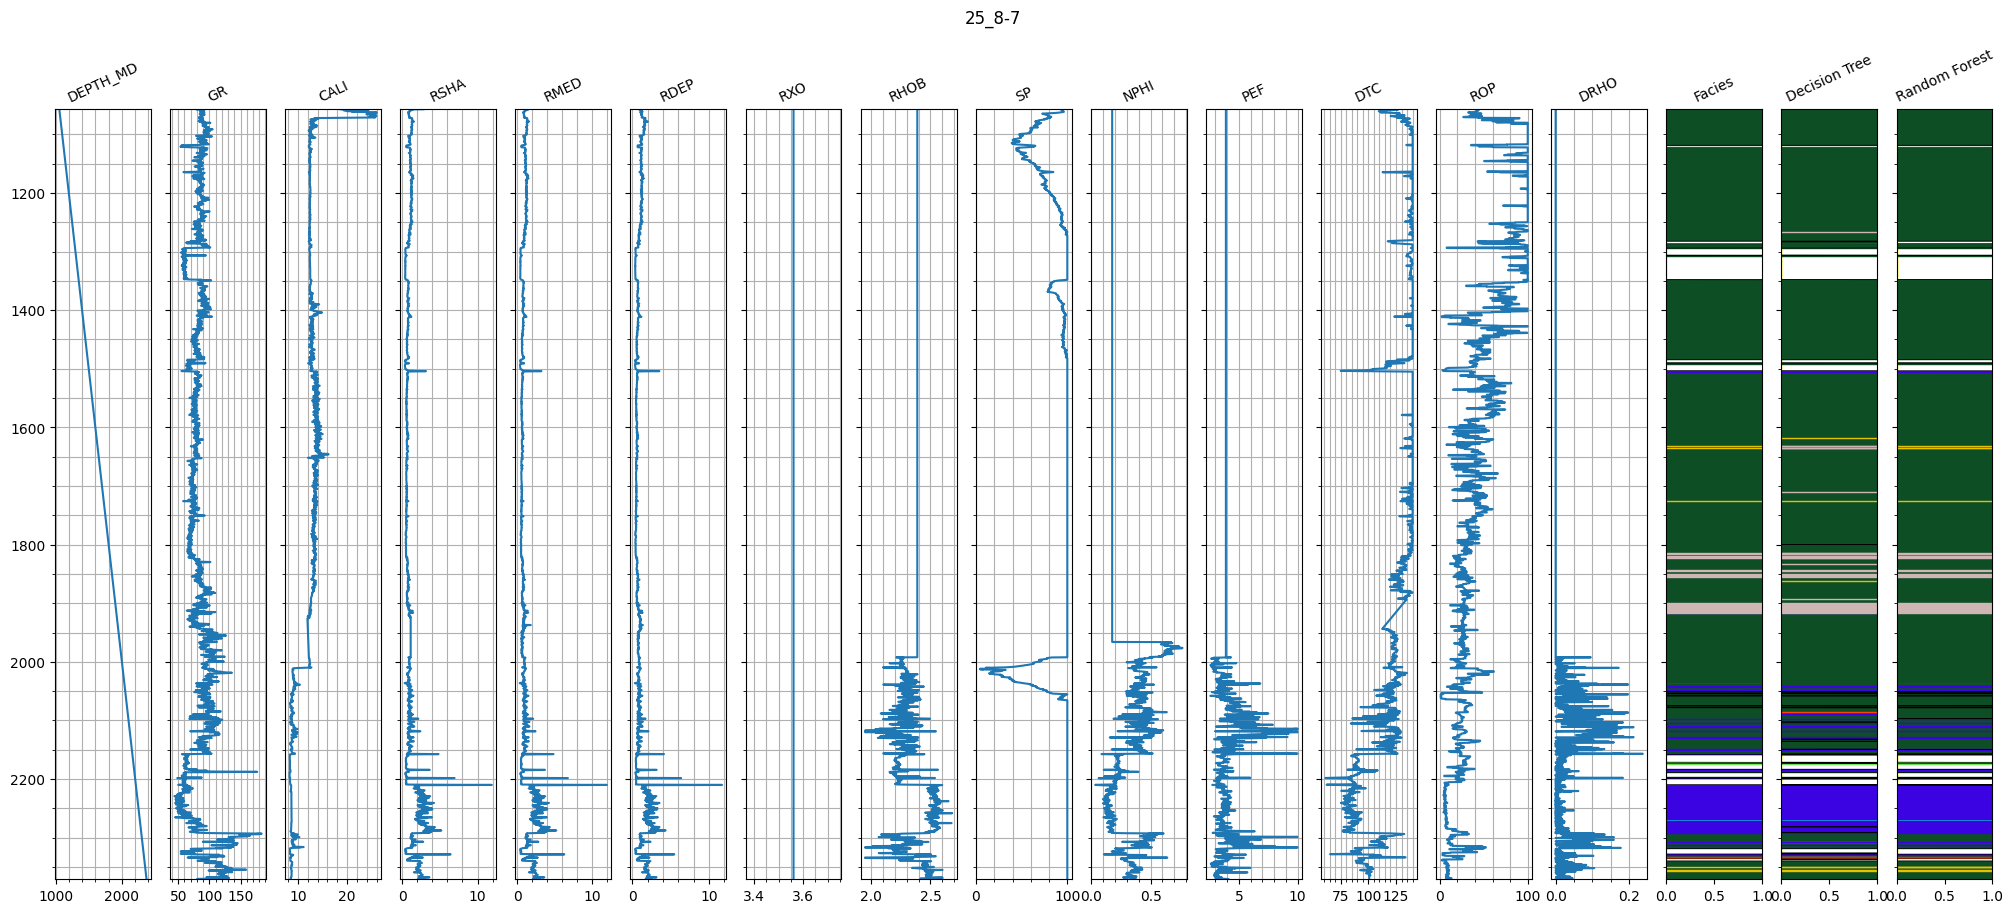

In [96]:
# Select display well
well_plotting = final_df_plotting[final_df_plotting.index == "25_8-7"]
curvenames = well_plotting.columns
rows , cols = 1 , final_df_plotting.shape[1]
fig , ax= plt.subplots(rows , cols , figsize=(25,10) , sharey=True)

# to make title for figure according to well name
fig.suptitle(well_plotting.index[0])
for col in range(cols):
  if col < cols-3:
    ax[col].plot(well_plotting.iloc[:, col] , well_plotting["DEPTH_MD"])
    ax[col].set_ylim(max(well_plotting["DEPTH_MD"]) , min(well_plotting["DEPTH_MD"]))
    ax[col].grid(which = "both")
    # ax[col].grid(which = "minor")
    ax[col].minorticks_on()
    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

  elif col >= col-3:
    ax[col].set_xlim(0 ,1)
    ax[col].plot(well_plotting.iloc[: , col] , well_plotting["DEPTH_MD"] , color = "black", linewidth = 0.5)
    for key in facies_num.keys():
      color = facies_num[key]['color']
      hatch = facies_num[key]['hatch']
      ax[col].fill_betweenx( well_plotting["DEPTH_MD"] , 0, well_plotting.iloc[:, col] , where=(well_plotting.iloc[:, col] == key), color=color, hatch=facies_num[key]['hatch'])


    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

### 8.2.3. Save RF Model

In [97]:
# save the model as pkl

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(RFM, open(filename, 'wb'))


In [98]:
validation_well

GR  CALI  RSHA  RMED  RDEP     RXO  RHOB     SP  NPHI   PEF  \
DEPTH_MD                                                                   
472.43    78.81 19.24  0.98  1.90  1.93    0.20  2.14   1.86  0.28 10.00   
472.58    78.27 19.20  0.98  1.86  1.92    0.20  2.13   2.23  0.28 10.00   
472.73    79.38 19.18  0.98  1.85  1.92    0.20  2.15   1.24  0.28 10.00   
472.89    80.99 19.18  0.98  1.80  1.92    0.20  2.20   0.64  0.28 10.00   
473.04    80.97 19.17  0.98  1.74  1.92    0.20  2.33   1.47  0.28 10.00   
...         ...   ...   ...   ...   ...     ...   ...    ...   ...   ...   
3114.04  108.31  6.05  2.81  2.30  1.91 2000.00  2.57 100.00  0.27  3.82   
3114.19  109.43  6.11  2.81  2.41  1.91 2000.00  2.56  98.93  0.27  3.83   
3114.34  111.74  6.02  2.81  2.55  1.90 2000.00  2.55  97.97  0.27  4.06   
3114.49  112.68  6.02  2.81  2.46  1.90 2000.00  2.55  96.06  0.27  4.43   
3114.65  112.68  6.02  2.81  2.25  1.90 2000.00  2.56  96.66  0.27  4.53   

            DTC   ROP  DRHO  Facies  Decision Tree  
DEPTH_MD                                            
472.43   140.00 48.69  0.00       2              1  
472.58   140.00 48.69  0.00       2              1  
472.73   140.00 48.69  0.00       2              1  
472.89   140.00 35.94  0.00       2              5  
473.04   140.00 32.21  0.00       2              5  
...         ...   ...   ...     ...            ...  
3114.04   81.21  3.43  0.00       2              1  
3114.19   81.21  3.50  0.01       2              1  
3114.34   81.21  3.50  0.01       2              1  
3114.49   81.21  3.50  0.02       2              1  
3114.65   81.21  3.40  0.04       2              1  

[17351 rows x 15 columns]

### 8.2.4. Run RF for the Validation Well 

#### 8.2.4.1 Load & Run Model

In [99]:
validation_well

GR  CALI  RSHA  RMED  RDEP     RXO  RHOB     SP  NPHI   PEF  \
DEPTH_MD                                                                   
472.43    78.81 19.24  0.98  1.90  1.93    0.20  2.14   1.86  0.28 10.00   
472.58    78.27 19.20  0.98  1.86  1.92    0.20  2.13   2.23  0.28 10.00   
472.73    79.38 19.18  0.98  1.85  1.92    0.20  2.15   1.24  0.28 10.00   
472.89    80.99 19.18  0.98  1.80  1.92    0.20  2.20   0.64  0.28 10.00   
473.04    80.97 19.17  0.98  1.74  1.92    0.20  2.33   1.47  0.28 10.00   
...         ...   ...   ...   ...   ...     ...   ...    ...   ...   ...   
3114.04  108.31  6.05  2.81  2.30  1.91 2000.00  2.57 100.00  0.27  3.82   
3114.19  109.43  6.11  2.81  2.41  1.91 2000.00  2.56  98.93  0.27  3.83   
3114.34  111.74  6.02  2.81  2.55  1.90 2000.00  2.55  97.97  0.27  4.06   
3114.49  112.68  6.02  2.81  2.46  1.90 2000.00  2.55  96.06  0.27  4.43   
3114.65  112.68  6.02  2.81  2.25  1.90 2000.00  2.56  96.66  0.27  4.53   

            DTC   ROP  DRHO  Facies  Decision Tree  
DEPTH_MD                                            
472.43   140.00 48.69  0.00       2              1  
472.58   140.00 48.69  0.00       2              1  
472.73   140.00 48.69  0.00       2              1  
472.89   140.00 35.94  0.00       2              5  
473.04   140.00 32.21  0.00       2              5  
...         ...   ...   ...     ...            ...  
3114.04   81.21  3.43  0.00       2              1  
3114.19   81.21  3.50  0.01       2              1  
3114.34   81.21  3.50  0.01       2              1  
3114.49   81.21  3.50  0.02       2              1  
3114.65   81.21  3.40  0.04       2              1  

[17351 rows x 15 columns]

In [100]:
#  Import the model and run for the validation well

# Load the model from the file
loaded_RFM = pickle.load(open('random_forest_model.pkl', 'rb'))

# Prepare the validation data
validation_well_features = validation_well.drop(["Facies","Decision Tree"] , axis=1)

validation_well_features = scaler.transform(validation_well_features)  # Use the same scaler

# Predict lithofacies for the validation well
validation_well_predictions = loaded_RFM.predict(validation_well_features)

# Add predictions to the validation well DataFrame
validation_well["Random Forest"] = validation_well_predictions

# Now you can use the validation_well DataFrame with the predictions

validation_well


C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\622663357.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



GR  CALI  RSHA  RMED  RDEP     RXO  RHOB     SP  NPHI   PEF  \
DEPTH_MD                                                                   
472.43    78.81 19.24  0.98  1.90  1.93    0.20  2.14   1.86  0.28 10.00   
472.58    78.27 19.20  0.98  1.86  1.92    0.20  2.13   2.23  0.28 10.00   
472.73    79.38 19.18  0.98  1.85  1.92    0.20  2.15   1.24  0.28 10.00   
472.89    80.99 19.18  0.98  1.80  1.92    0.20  2.20   0.64  0.28 10.00   
473.04    80.97 19.17  0.98  1.74  1.92    0.20  2.33   1.47  0.28 10.00   
...         ...   ...   ...   ...   ...     ...   ...    ...   ...   ...   
3114.04  108.31  6.05  2.81  2.30  1.91 2000.00  2.57 100.00  0.27  3.82   
3114.19  109.43  6.11  2.81  2.41  1.91 2000.00  2.56  98.93  0.27  3.83   
3114.34  111.74  6.02  2.81  2.55  1.90 2000.00  2.55  97.97  0.27  4.06   
3114.49  112.68  6.02  2.81  2.46  1.90 2000.00  2.55  96.06  0.27  4.43   
3114.65  112.68  6.02  2.81  2.25  1.90 2000.00  2.56  96.66  0.27  4.53   

            DTC   ROP  DRHO  Facies  Decision Tree  Random Forest  
DEPTH_MD                                                           
472.43   140.00 48.69  0.00       2              1              2  
472.58   140.00 48.69  0.00       2              1              2  
472.73   140.00 48.69  0.00       2              1              2  
472.89   140.00 35.94  0.00       2              5              2  
473.04   140.00 32.21  0.00       2              5              2  
...         ...   ...   ...     ...            ...            ...  
3114.04   81.21  3.43  0.00       2              1              2  
3114.19   81.21  3.50  0.01       2              1              2  
3114.34   81.21  3.50  0.01       2              1              2  
3114.49   81.21  3.50  0.02       2              1              2  
3114.65   81.21  3.40  0.04       2              1              2  

[17351 rows x 16 columns]

#### 8.2.4.2. Validation Well Prediction Plotting

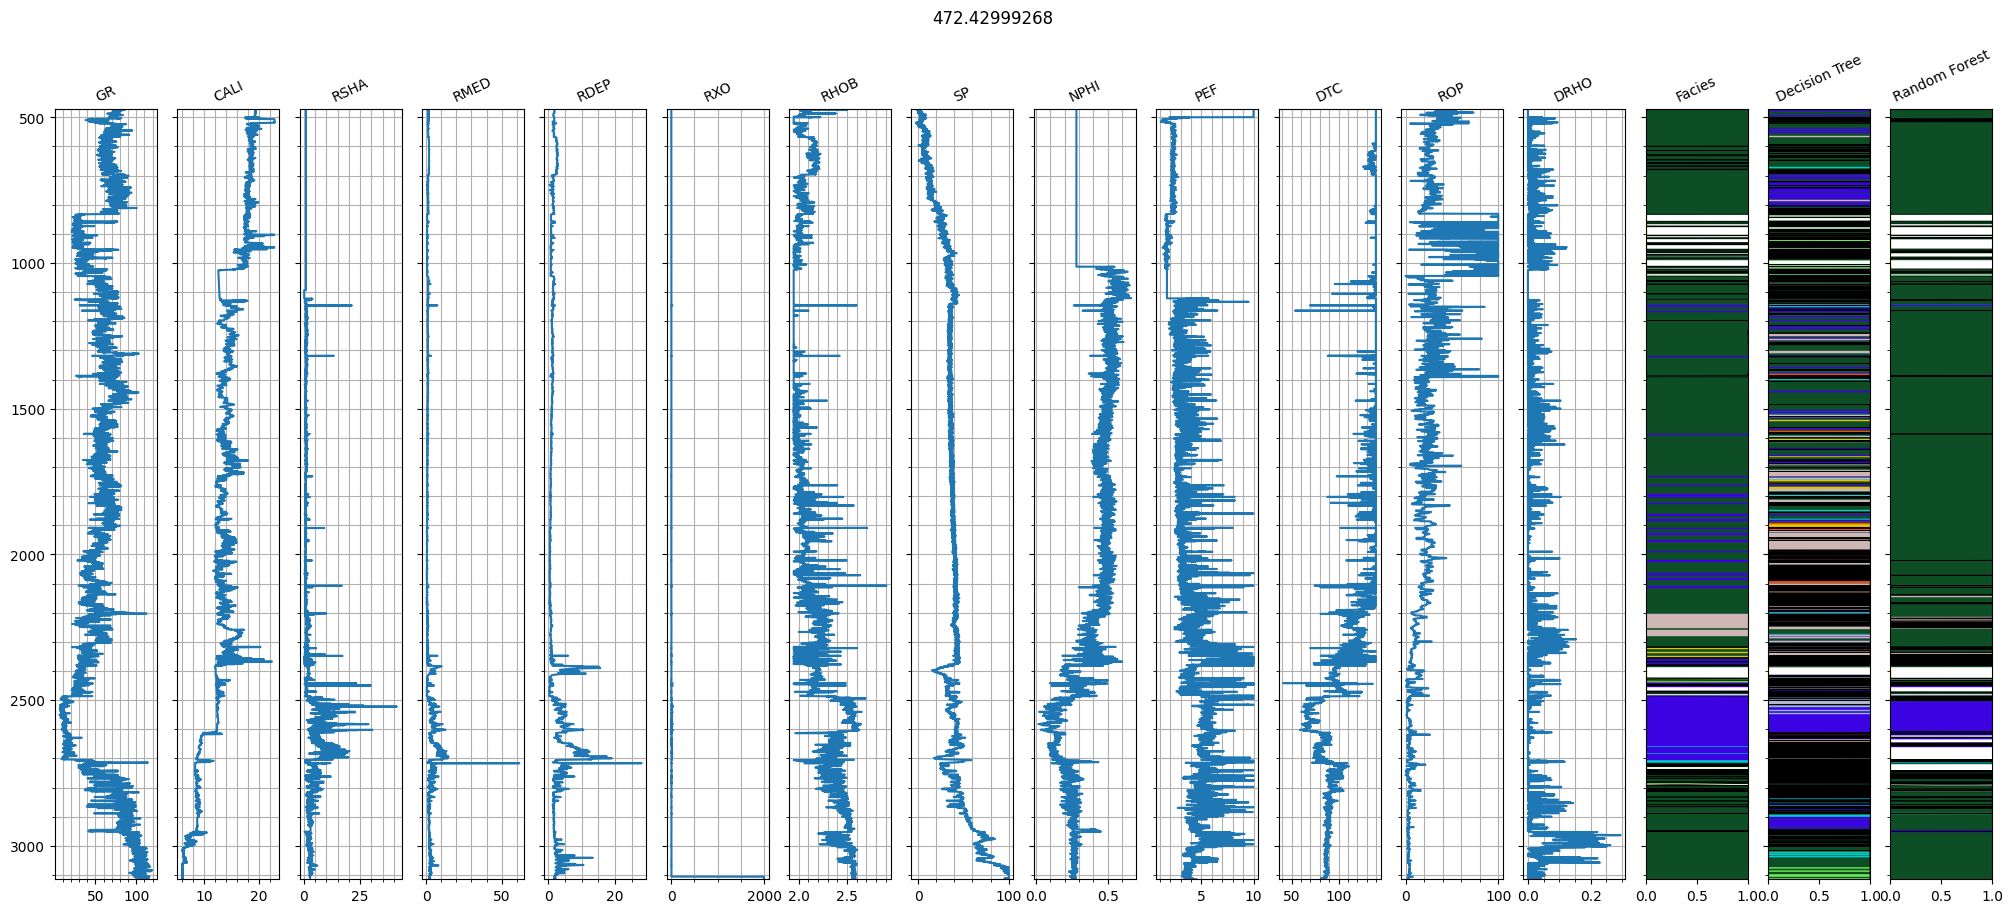

In [101]:
# Select display well
well_plotting = validation_well
curvenames = validation_well.columns
rows , cols = 1 , validation_well.shape[1]
fig , ax= plt.subplots(rows , cols , figsize=(25,10) , sharey=True)

# to make title for figure according to well name
fig.suptitle(well_plotting.index[0])
for col in range(cols):
  if col < cols-3:
    ax[col].plot(well_plotting.iloc[:, col] , well_plotting.index)
    ax[col].set_ylim(max(well_plotting.index) , min(well_plotting.index))
    ax[col].grid(which = "both")
    # ax[col].grid(which = "minor")
    ax[col].minorticks_on()
    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

  elif col >= col-3:
    ax[col].set_xlim(0 ,1)
    ax[col].plot(well_plotting.iloc[: , col] , well_plotting.index , color = "black", linewidth = 0.5)
    for key in facies_num.keys():
      color = facies_num[key]['color']
      hatch = facies_num[key]['hatch']
      ax[col].fill_betweenx( well_plotting.index , 0, well_plotting.iloc[:, col] , where=(well_plotting.iloc[:, col] == key), color=color, hatch=facies_num[key]['hatch'])


    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

Accuracy Score for Validation Well :  0.8919370641461587
              precision    recall  f1-score   support

           0       0.66      0.90      0.77      2312
           1       0.42      0.06      0.10       301
           2       0.94      0.98      0.96     12694
           3       0.58      0.05      0.09       225
           4       0.00      0.00      0.00        18
           5       0.97      0.53      0.69      1481
           6       0.00      0.00      0.00         0
           9       0.93      0.21      0.34       320

    accuracy                           0.89     17351
   macro avg       0.56      0.34      0.37     17351
weighted avg       0.89      0.89      0.87     17351



c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined an

<Axes: >

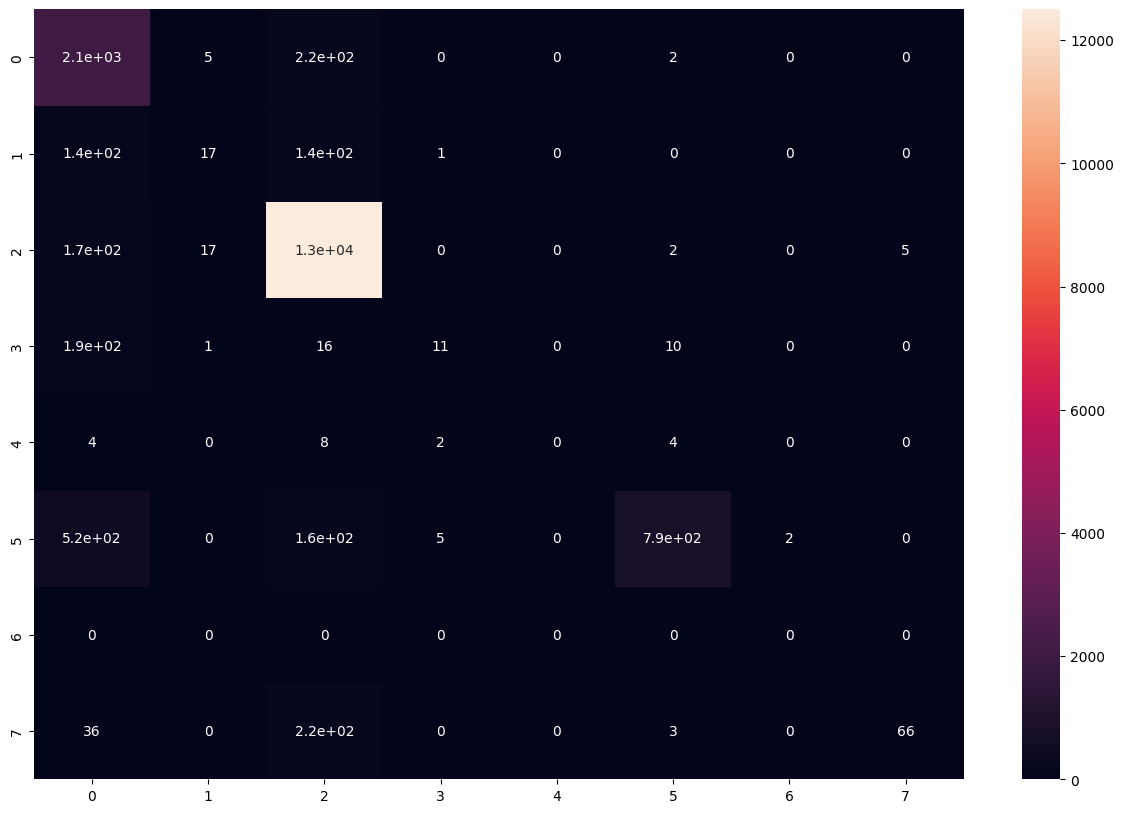

In [102]:
# accuracy of validation well

import matplotlib.pyplot as plt
print("Accuracy Score for Validation Well : " , accuracy_score(validation_well["Facies"] , validation_well["Random Forest"]))
print(classification_report(validation_well["Facies"], validation_well["Random Forest"]))
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(validation_well["Facies"] , validation_well["Random Forest"]) , annot=True)


## **8.3. KNN**

### 8.3.1. Run Model For train_test data

In [103]:

knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred_knn = knn.predict(xtest)


Accuracy Score for KNN:  0.9199304238725958
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     40641
           1       0.83      0.83      0.83     35788
           2       0.95      0.97      0.96    172788
           3       0.87      0.84      0.85      8065
           4       0.71      0.32      0.44       450
           5       0.89      0.74      0.81     13584
           6       0.93      0.94      0.94      2536
           7       0.98      0.99      0.99      2051
           8       0.90      0.87      0.88       308
           9       0.87      0.81      0.84      3373
          10       0.86      0.64      0.73       934
          11       1.00      1.00      1.00        38

    accuracy                           0.92    280556
   macro avg       0.89      0.82      0.85    280556
weighted avg       0.92      0.92      0.92    280556



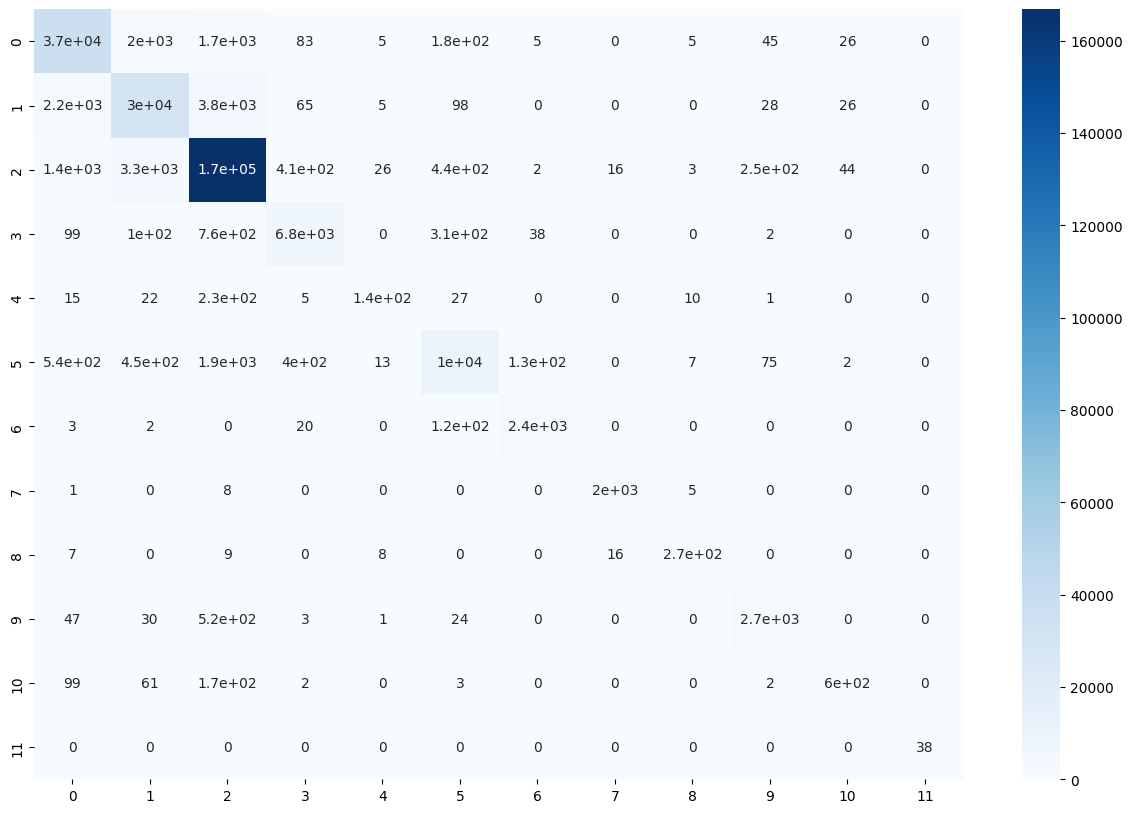

In [214]:
print("Accuracy Score for KNN: ", accuracy_score(ytest, ypred_knn))
print(classification_report(ytest, ypred_knn))
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(ytest, ypred_knn), annot=True, cmap="Blues")

### 8.3.2. Plotting

In [104]:
final_df_plotting["KNN"] = knn.predict(x_features)


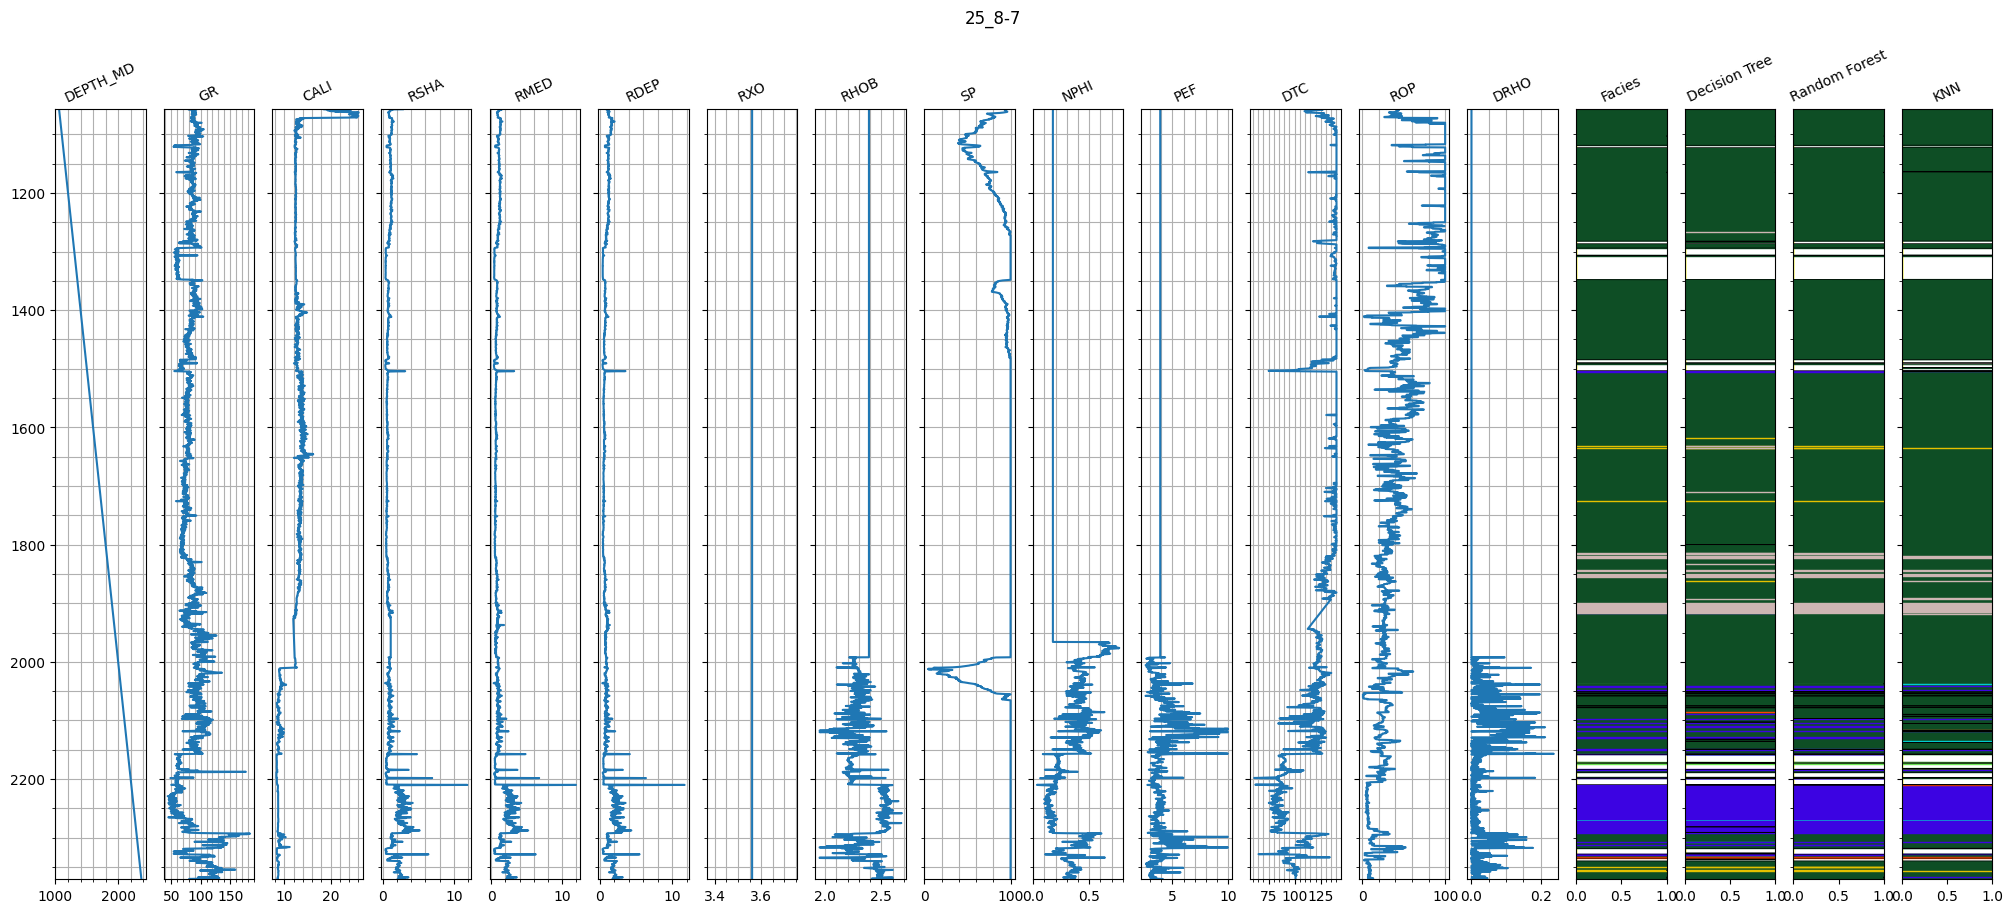

In [105]:
# Select display well
well_plotting = final_df_plotting[final_df_plotting.index == "25_8-7"]
curvenames = well_plotting.columns
rows, cols = 1, final_df_plotting.shape[1]
fig, ax = plt.subplots(rows, cols, figsize=(25, 10), sharey=True)

# to make title for figure according to well name
fig.suptitle(well_plotting.index[0])
for col in range(cols):
    if col < cols - 4:
        ax[col].plot(well_plotting.iloc[:, col], well_plotting["DEPTH_MD"])
        ax[col].set_ylim(max(well_plotting["DEPTH_MD"]), min(well_plotting["DEPTH_MD"]))
        ax[col].grid(which="both")
        # ax[col].grid(which = "minor")
        ax[col].minorticks_on()
        ax[col].set_title("%s" % curvenames[col], rotation=25, fontsize="10")

    elif col >= cols - 4:
        ax[col].set_xlim(0, 1)
        ax[col].plot(well_plotting.iloc[:, col], well_plotting["DEPTH_MD"], color="black", linewidth=0.5)
        for key in facies_num.keys():
            color = facies_num[key]['color']
            hatch = facies_num[key]['hatch']
            ax[col].fill_betweenx(well_plotting["DEPTH_MD"], 0, well_plotting.iloc[:, col],
                                 where=(well_plotting.iloc[:, col] == key), color=color,
                                 hatch=facies_num[key]['hatch'])

        ax[col].set_title("%s" % curvenames[col], rotation=25, fontsize="10")

### 8.3.3. Save KNN Model

In [106]:
# Save the model to a file
filename = 'knn_model.pkl'
pickle.dump(knn, open(filename, 'wb'))

### 8.3.4. Run KNN for the Validation Well Prediction

#### 8.3.4.1 Run Model For Validation Well

In [107]:
# Import the model and run for the validation well

# Load the model from the file
loaded_knn = pickle.load(open('knn_model.pkl', 'rb'))

In [108]:
# Prepare the validation data
validation_well_features = validation_well.drop(["Facies", "Random Forest","Decision Tree"], axis=1)

validation_well_features = scaler.transform(validation_well_features)  # Use the same scaler

# Predict lithofacies for the validation well
validation_well_predictions = loaded_knn.predict(validation_well_features)

# Add predictions to the validation well DataFrame
validation_well["KNN"] = validation_well_predictions

# Now you can use the validation_well DataFrame with the predictions

C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\3239060761.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 8.3.4.2. Validation Well Prediction Plotting

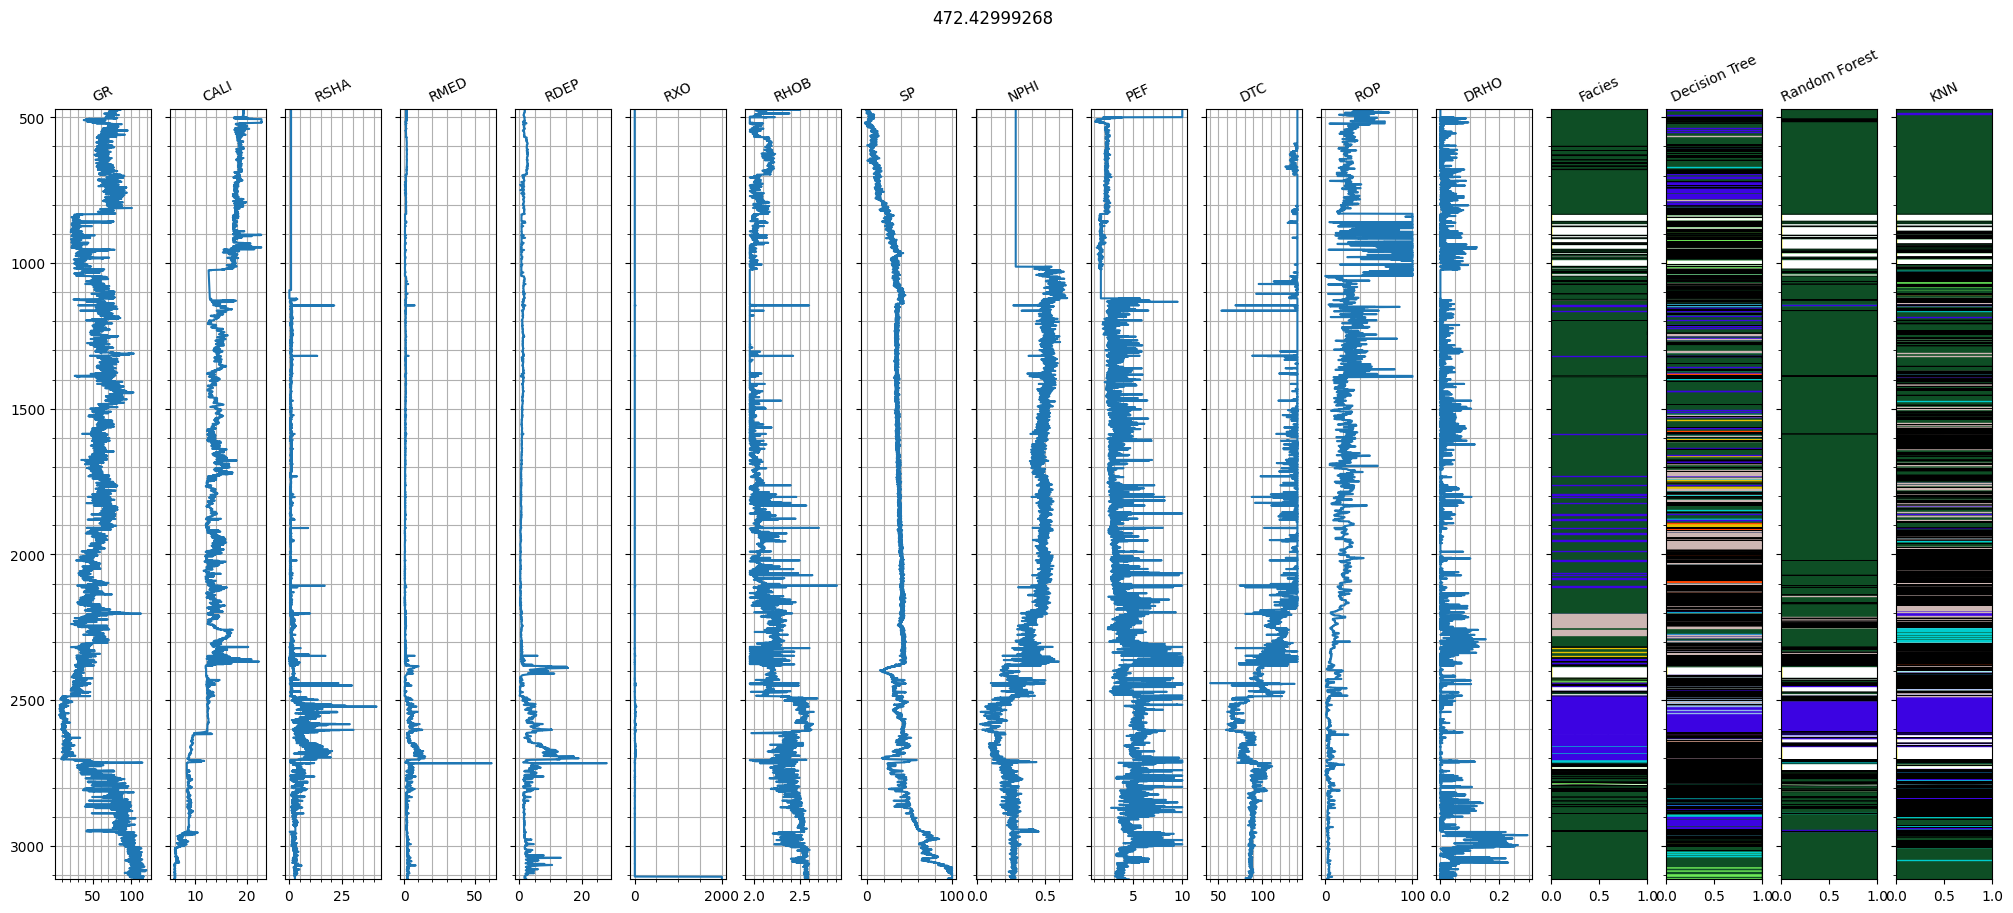

In [109]:
# Select display well
well_plotting = validation_well
curvenames = validation_well.columns
rows, cols = 1, validation_well.shape[1]
fig, ax = plt.subplots(rows, cols, figsize=(25, 10), sharey=True)

# to make title for figure according to well name
fig.suptitle(well_plotting.index[0])
for col in range(cols):
    if col < cols - 4:
        ax[col].plot(well_plotting.iloc[:, col], well_plotting.index)
        ax[col].set_ylim(max(well_plotting.index), min(well_plotting.index))
        ax[col].grid(which="both")
        # ax[col].grid(which = "minor")
        ax[col].minorticks_on()
        ax[col].set_title("%s" % curvenames[col], rotation=25, fontsize="10")

    elif col >= cols - 4:
        ax[col].set_xlim(0, 1)
        ax[col].plot(well_plotting.iloc[:, col], well_plotting.index, color="black", linewidth=0.5)
        for key in facies_num.keys():
            color = facies_num[key]['color']
            hatch = facies_num[key]['hatch']
            ax[col].fill_betweenx(well_plotting.index, 0, well_plotting.iloc[:, col],
                                 where=(well_plotting.iloc[:, col] == key), color=color,
                                 hatch=facies_num[key]['hatch'])

        ax[col].set_title("%s" % curvenames[col], rotation=25, fontsize="10")

## **8.5. XGBoost**

### 8.5.1. Run XGBoost for train-test data

to run XGBoost Classifier, we have to make label encoder for y

In [110]:
# Create a LabelEncoder object
le = LabelEncoder()

In [111]:
# Fit the encoder on the training data and transform the labels
ytrain_enc = le.fit_transform(ytrain)

In [112]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

In [113]:
# Train the model
xgb_model.fit(xtrain, ytrain_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [114]:
# Make predictions on the test set
xgb_ypred = xgb_model.predict(xtest)

In [115]:
# Model Evaluation
print("Accuracy Score for Xgboost : " , accuracy_score(ytest , xgb_ypred))
print(classification_report(ytest, xgb_ypred))

Accuracy Score for Xgboost :  0.8880009695034147
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     40641
           1       0.79      0.68      0.73     35788
           2       0.91      0.97      0.94    172788
           3       0.82      0.72      0.76      8065
           4       0.72      0.25      0.37       450
           5       0.86      0.67      0.76     13584
           6       0.93      0.95      0.94      2536
           7       0.99      0.99      0.99      2051
           8       0.94      0.91      0.93       308
           9       0.87      0.71      0.78      3373
          10       0.83      0.67      0.74       934
          11       1.00      1.00      1.00        38

    accuracy                           0.89    280556
   macro avg       0.88      0.78      0.82    280556
weighted avg       0.88      0.89      0.88    280556



<Axes: >

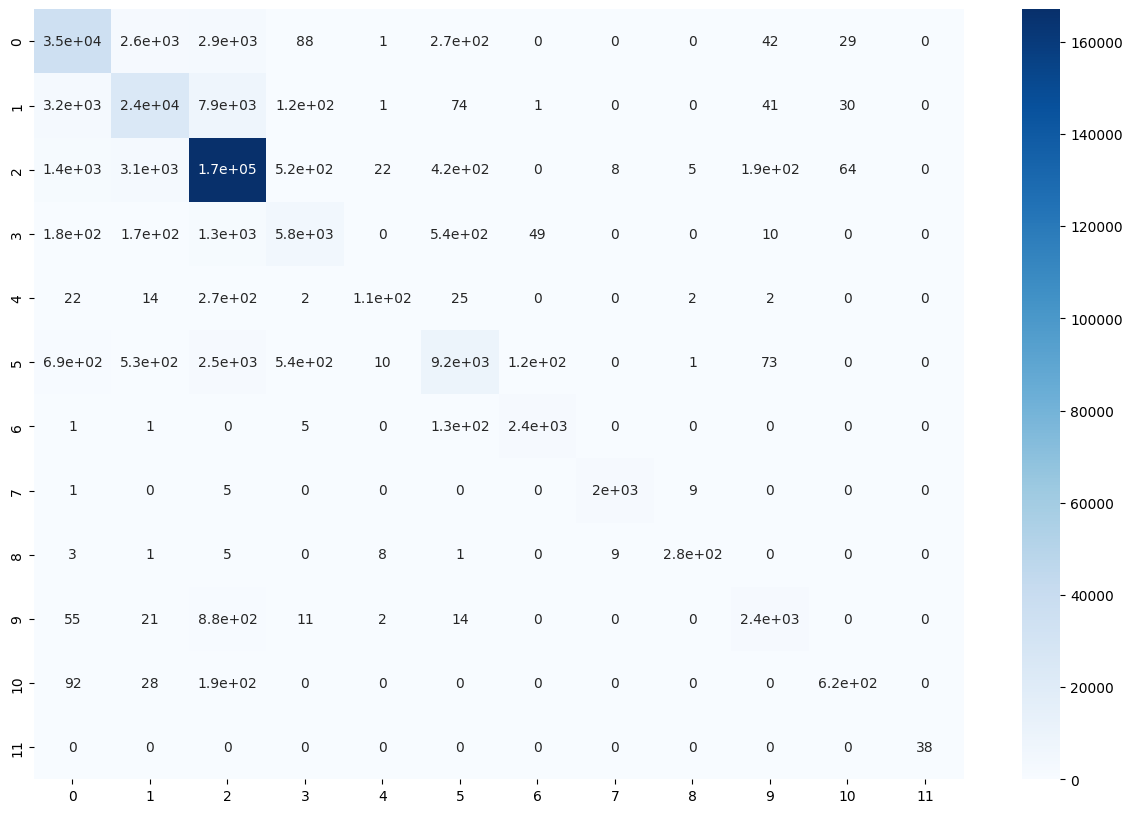

In [116]:
#Confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(ytest , xgb_ypred) , annot=True , cmap="Blues")

### 8.5.2. Plotting

In [117]:
#  Add xgb column to df
final_df_plotting["XGBoost"] = xgb_model.predict(x_features)


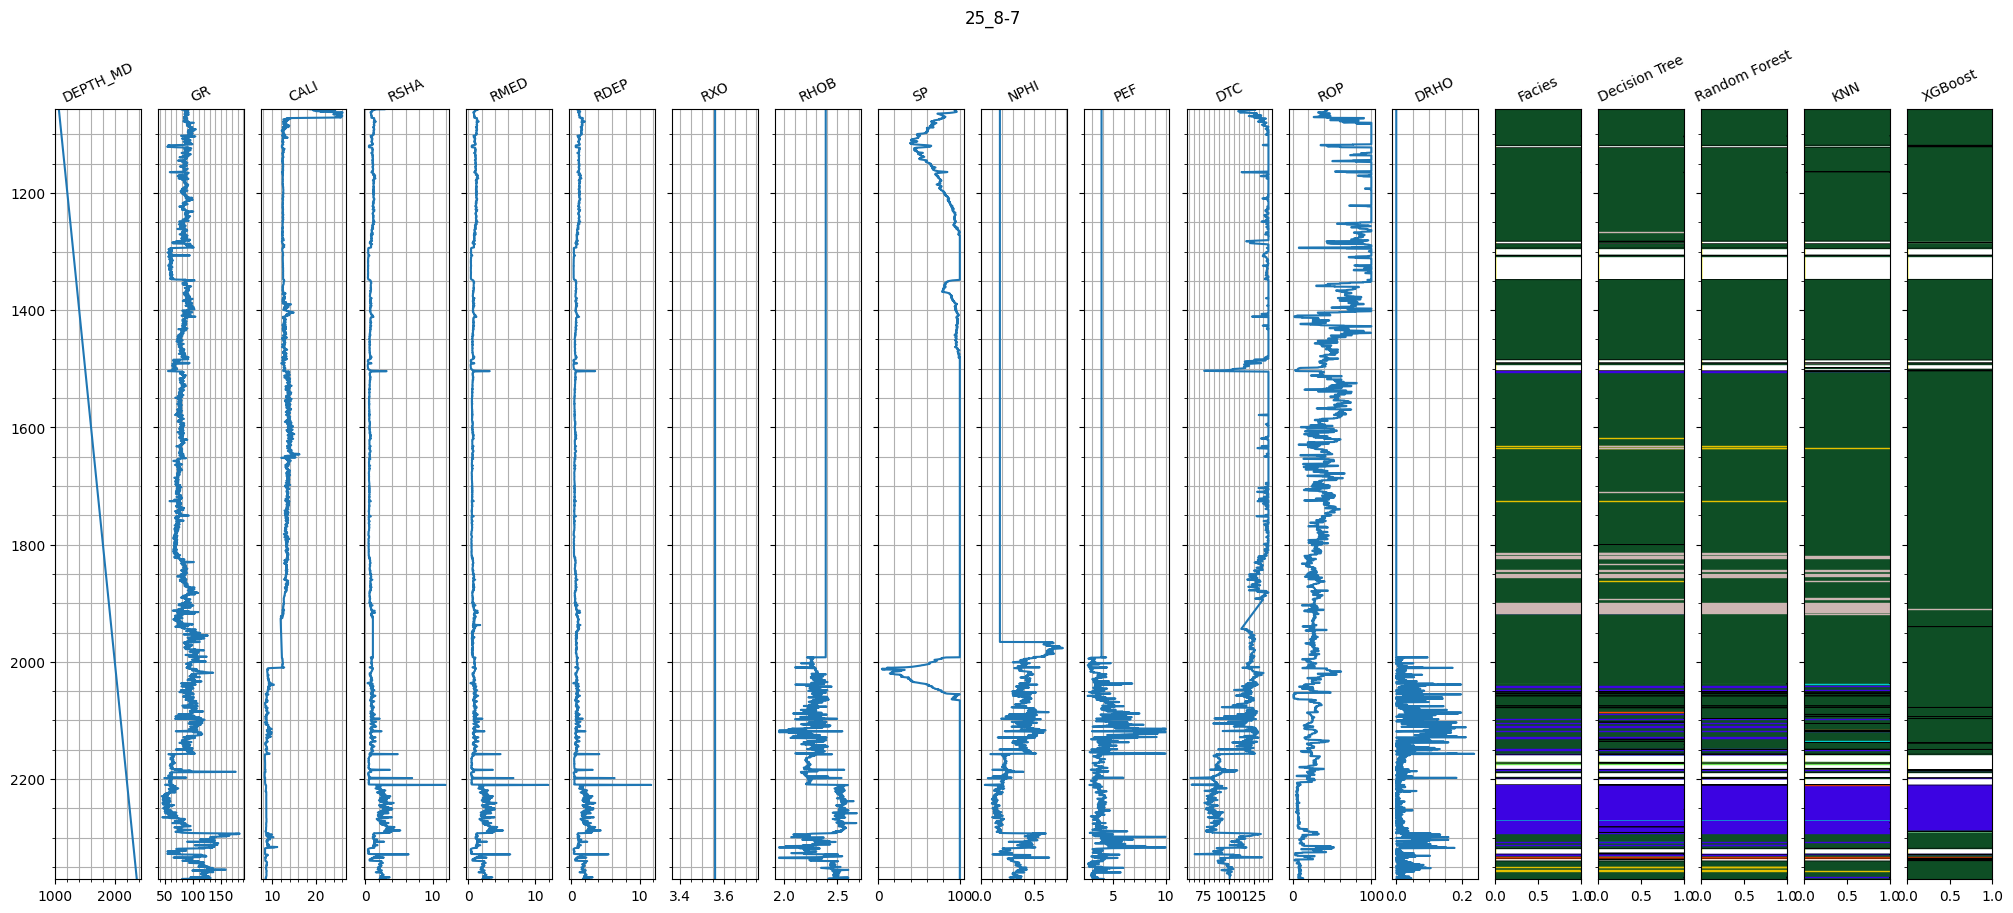

In [118]:
# Select display well
well_plotting = final_df_plotting[final_df_plotting.index == "25_8-7"]
curvenames = well_plotting.columns
rows , cols = 1 , final_df_plotting.shape[1]
fig , ax= plt.subplots(rows , cols , figsize=(25,10) , sharey=True)

# to make title for figure according to well name
fig.suptitle(well_plotting.index[0])
for col in range(cols):
  if col < cols-5:
    ax[col].plot(well_plotting.iloc[:, col] , well_plotting["DEPTH_MD"])
    ax[col].set_ylim(max(well_plotting["DEPTH_MD"]) , min(well_plotting["DEPTH_MD"]))
    ax[col].grid(which = "both")
    # ax[col].grid(which = "minor")
    ax[col].minorticks_on()
    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

  elif col >= col-5:
    ax[col].set_xlim(0 ,1)
    ax[col].plot(well_plotting.iloc[: , col] , well_plotting["DEPTH_MD"] , color = "black", linewidth = 0.5)
    for key in facies_num.keys():
      color = facies_num[key]['color']
      hatch = facies_num[key]['hatch']
      ax[col].fill_betweenx( well_plotting["DEPTH_MD"] , 0, well_plotting.iloc[:, col] , where=(well_plotting.iloc[:, col] == key), color=color, hatch=facies_num[key]['hatch'])
    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")



### 8.5.3. Saving XGBoost model

In [119]:
# save xgboost model

# Save the model to a file
filename = 'xgboost_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))


### 8.5.4. Run XGBoost for the validation well

#### 8.5.4.1. Load & Run Run Model 

In [120]:
# Load the saved XGBoost model
loaded_xgb_model = pickle.load(open('xgboost_model.pkl', 'rb'))

In [121]:
validation_well.columns

Index(['GR', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RXO', 'RHOB', 'SP', 'NPHI',
       'PEF', 'DTC', 'ROP', 'DRHO', 'Facies', 'Decision Tree', 'Random Forest',
       'KNN'],
      dtype='object')

In [122]:
# Prepare the validation well data
validation_well_features = validation_well.drop(['Facies', 'Decision Tree', 'Random Forest','KNN'] ,axis=1)

validation_well_features = scaler.transform(validation_well_features)

In [123]:
# Predict facies for the validation well using the loaded model
validation_well_predictions = loaded_xgb_model.predict(validation_well_features)

In [124]:
# Inverse transform the encoded predictions back to original labels
validation_well_predictions = le.inverse_transform(validation_well_predictions)

In [125]:

# Add the XGBoost predictions to the validation well DataFrame
validation_well["XGBoost"] = validation_well_predictions

C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\2118112525.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
print("Accuracy Score for Validation Well (XGBoost) : ", accuracy_score(validation_well["Facies"], validation_well["XGBoost"]))
print(classification_report(validation_well["Facies"], validation_well["XGBoost"]))

Accuracy Score for Validation Well (XGBoost) :  0.8885366837646245
              precision    recall  f1-score   support

           0       0.67      0.90      0.77      2312
           1       0.19      0.06      0.09       301
           2       0.95      0.96      0.95     12694
           3       0.20      0.02      0.03       225
           4       0.00      0.00      0.00        18
           5       0.96      0.68      0.79      1481
           6       0.00      0.00      0.00         0
           9       0.57      0.39      0.47       320
          10       0.00      0.00      0.00         0

    accuracy                           0.89     17351
   macro avg       0.39      0.33      0.35     17351
weighted avg       0.88      0.89      0.88     17351



c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined an

<Axes: >

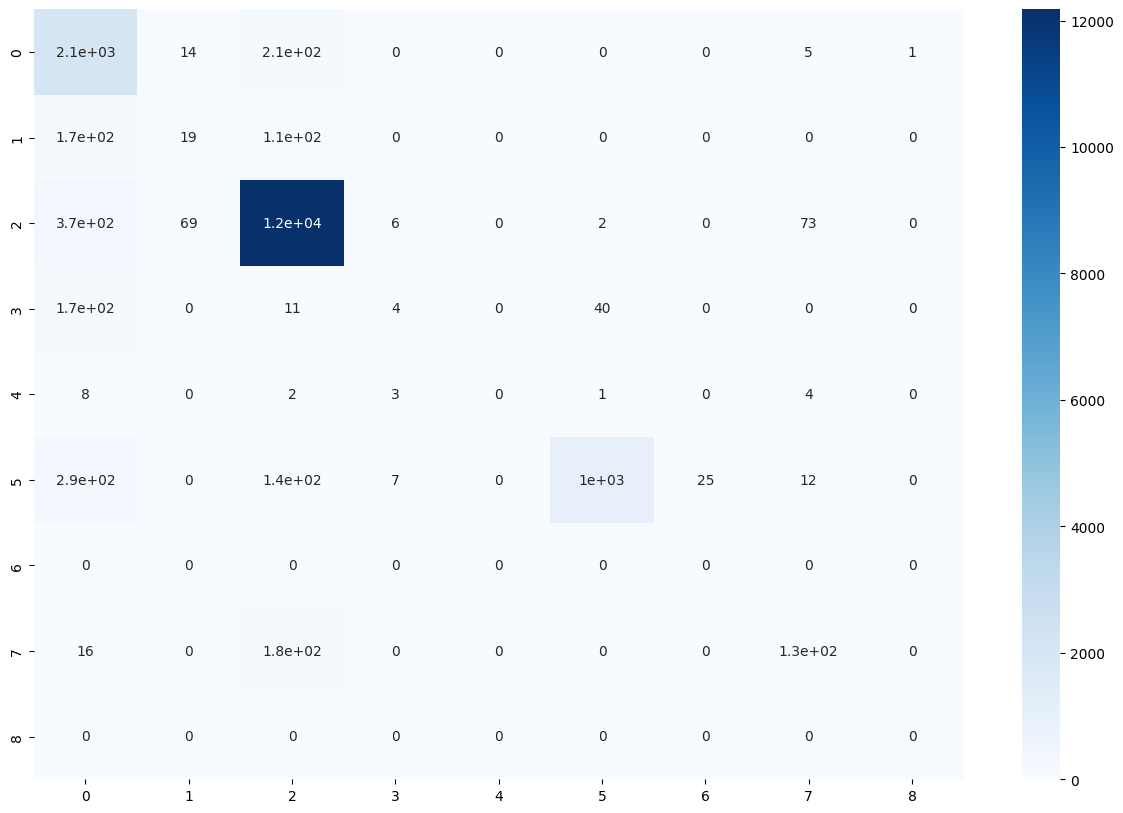

In [127]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(validation_well["Facies"], validation_well["XGBoost"]), annot=True, cmap="Blues")

### 8.5.4.2. Validation well Prediction Plotting

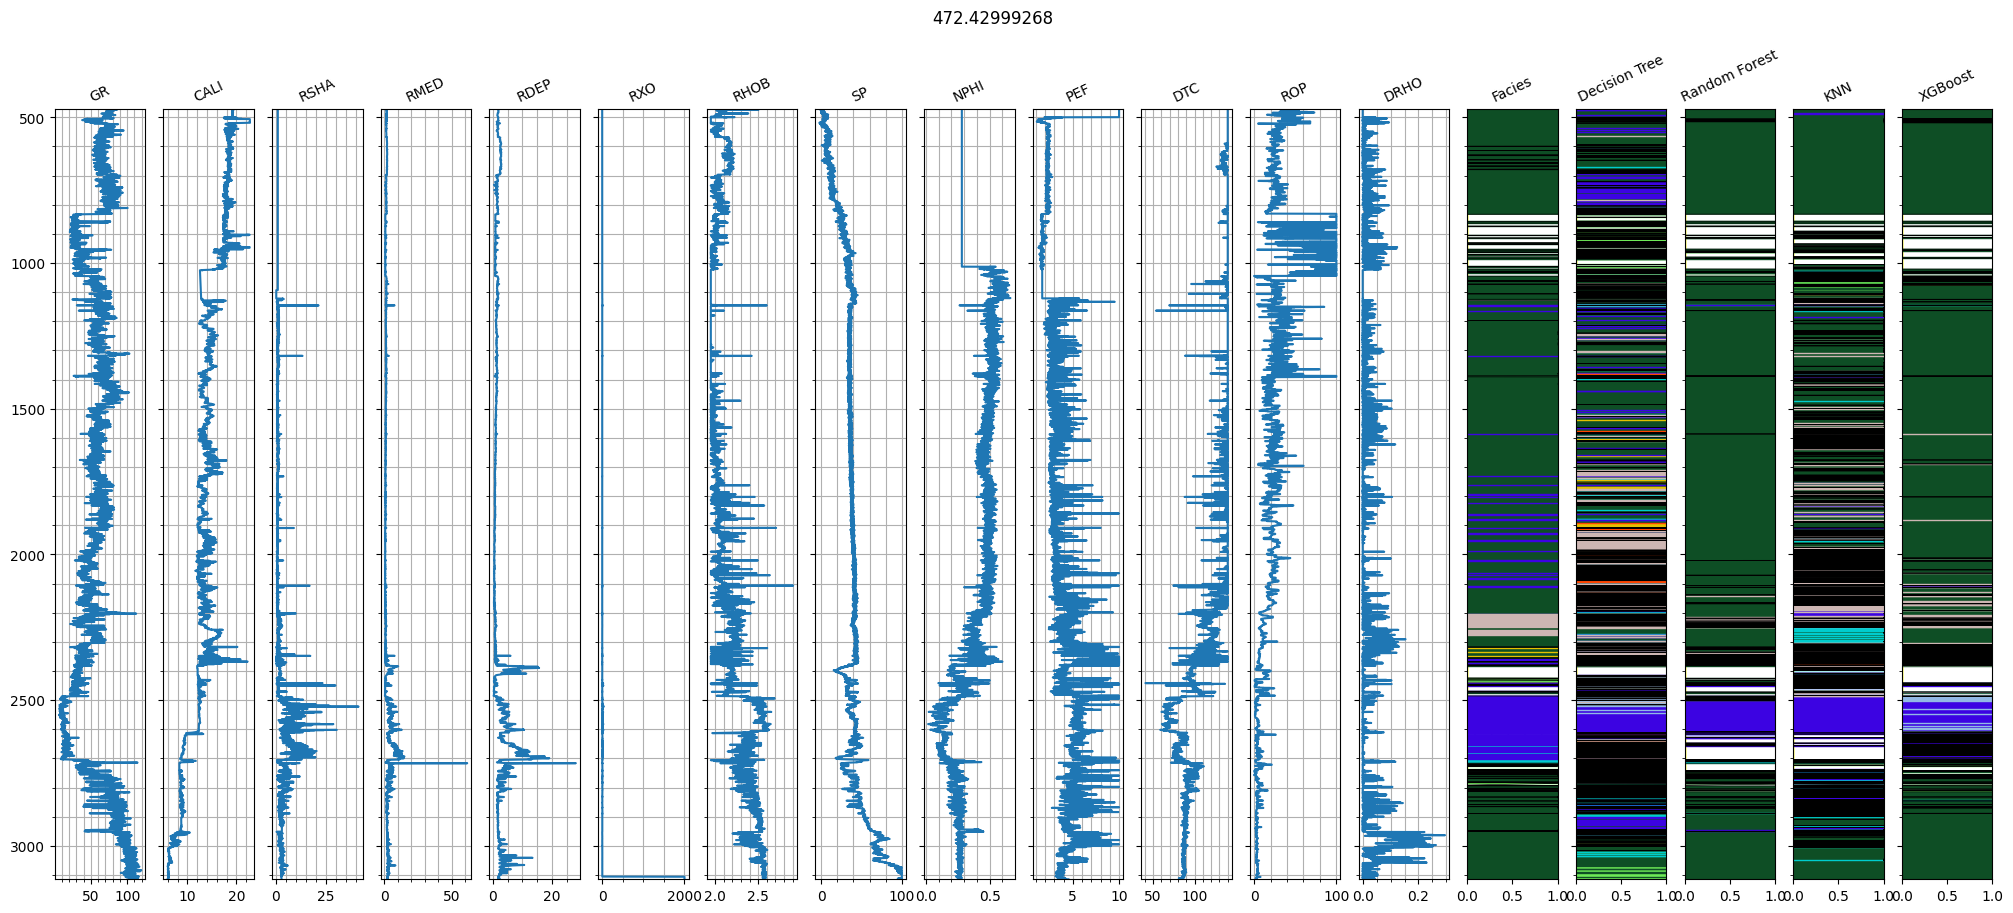

In [128]:
# Select display well
well_plotting = validation_well
curvenames = validation_well.columns
rows , cols = 1 , validation_well.shape[1]
fig , ax= plt.subplots(rows , cols , figsize=(25,10) , sharey=True)

# to make title for figure according to well name
fig.suptitle(well_plotting.index[0])
for col in range(cols):
  if col < cols-5:
    ax[col].plot(well_plotting.iloc[:, col] , well_plotting.index)
    ax[col].set_ylim(max(well_plotting.index) , min(well_plotting.index))
    ax[col].grid(which = "both")
    # ax[col].grid(which = "minor")
    ax[col].minorticks_on()
    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

  elif col >= col-5:
    ax[col].set_xlim(0 ,1)
    ax[col].plot(well_plotting.iloc[: , col] , well_plotting.index , color = "black", linewidth = 0.5)
    for key in facies_num.keys():
      color = facies_num[key]['color']
      hatch = facies_num[key]['hatch']
      ax[col].fill_betweenx( well_plotting.index , 0, well_plotting.iloc[:, col] , where=(well_plotting.iloc[:, col] == key), color=color, hatch=facies_num[key]['hatch'])


    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

## **8.6. DNN**

To Run DNN for Maulti calssification, should be transform the target into category array(hot encoder)

### 8.6.1. y data hot encoder

In [129]:
ytrain_cat = tf.keras.utils.to_categorical(y_labels)

In [130]:
ytrain_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

split the data again based on ytrain_cat

In [131]:
xtrain1 , xtest1 , ytrain1 , ytest1 = train_test_split(x_features , ytrain_cat , test_size = 0.2 , random_state = 42)

### 8.6.2. Build and Run the DNN model for train-test data

In [132]:
DNN_model = keras.Sequential([
    # keras.layers.Input(shape=(9,)),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(64,activation="tanh"),
    keras.layers.Dense(32, activation="sigmoid"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(4, activation="sigmoid"),
    keras.layers.Dense(12, activation="softmax")
])
# 12 is the number if facies calsses

In [133]:
DNN_model.compile(optimizer="adam" , loss="categorical_crossentropy" , metrics=["accuracy"])

In [134]:
y = DNN_model.fit(xtrain1, ytrain1,
                        validation_data=(xtest1, ytest1),
                        epochs = 100,
                        batch_size = 1000,
                        callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)])

Epoch 1/100
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3863 - loss: 1.9332 - val_accuracy: 0.6887 - val_loss: 1.0500
Epoch 2/100
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6927 - loss: 0.9934 - val_accuracy: 0.7227 - val_loss: 0.8938
Epoch 3/100
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7258 - loss: 0.8837 - val_accuracy: 0.7376 - val_loss: 0.8443
Epoch 4/100
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7364 - loss: 0.8388 - val_accuracy: 0.7477 - val_loss: 0.8010
Epoch 5/100
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7482 - loss: 0.7965 - val_accuracy: 0.7551 - val_loss: 0.7738
Epoch 6/100
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7556 - loss: 0.7711 - val_accuracy: 0.7610 - val_loss: 0.7550
Epoch 7/100
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7602 - loss: 0.7495 - val_accuracy: 0.7637 - val_loss: 0.7347
Epoch 8/100
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7645 - loss: 0

In [135]:
print(DNN_model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,274 (40.14 KB)

 Trainable params: 3,424 (13.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,850 (26.76 KB)

None


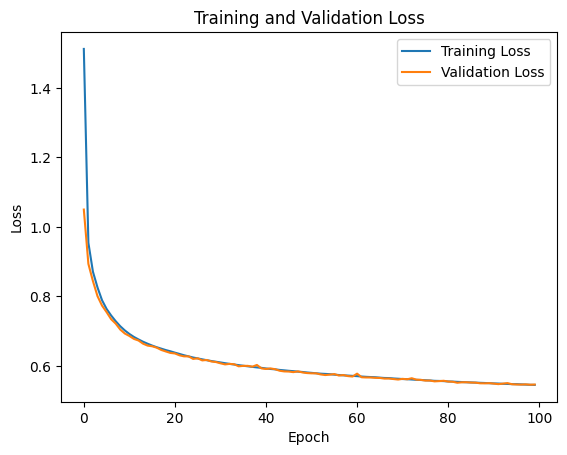

In [136]:
# make the loss plot

import matplotlib.pyplot as plt
plt.plot(y.history['loss'], label='Training Loss')
plt.plot(y.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [137]:
y_pred_DNN = DNN_model.predict(xtest1)


8768/8768 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


In [138]:
y_pred_DNN


array([[2.5942000e-03, 1.0614290e-02, 9.7143763e-01, ..., 1.1272543e-03,
        3.3627739e-04, 1.8296785e-06],
       [3.8746136e-01, 5.6957972e-01, 3.0743754e-02, ..., 7.3669407e-06,
        1.0279602e-03, 1.4454518e-05],
       [2.6799392e-02, 1.4997011e-01, 7.6185596e-01, ..., 4.0912523e-04,
        2.2432257e-03, 2.2945613e-05],
       ...,
       [4.3745409e-03, 9.0160193e-03, 9.6740043e-01, ..., 4.0443866e-03,
        5.6002586e-04, 2.2675565e-06],
       [7.0655644e-01, 2.1411392e-01, 5.5326562e-02, ..., 1.3797542e-03,
        7.8119948e-03, 3.4369779e-05],
       [3.5642635e-02, 3.3973768e-02, 7.4409741e-01, ..., 6.4968825e-03,
        6.8951175e-03, 1.6198622e-04]], dtype=float32)

In [139]:
ytest1


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [140]:
# Choose the biggest probabilty in y_pred_DNN for each row
new_y_pred_DNN = [np.argmax(i) for i in y_pred_DNN]
new_y_test1 = [np.argmax(i) for i in ytest1]

In [141]:
# Compare y_pred and y_test
print(new_y_pred_DNN)
print(new_y_test1)

[2, 1, 2, 0, 0, 2, 0, 2, 2, 7, 2, 0, 2, 2, 6, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 7, 2, 5, 1, 2, 2, 1, 2, 3, 5, 2, 5, 1, 2, 2, 7, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 6, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 3, 5, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 9, 1, 2, 2, 2, 9, 2, 2, 5, 2, 1, 2, 2, 2, 6, 2, 2, 2, 2, 2, 7, 2, 2, 0, 9, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 5, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 5, 2, 1, 6, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 5, 0, 2, 7, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 

In [142]:
cm = confusion_matrix(new_y_test1 , new_y_pred_DNN)


<Axes: >

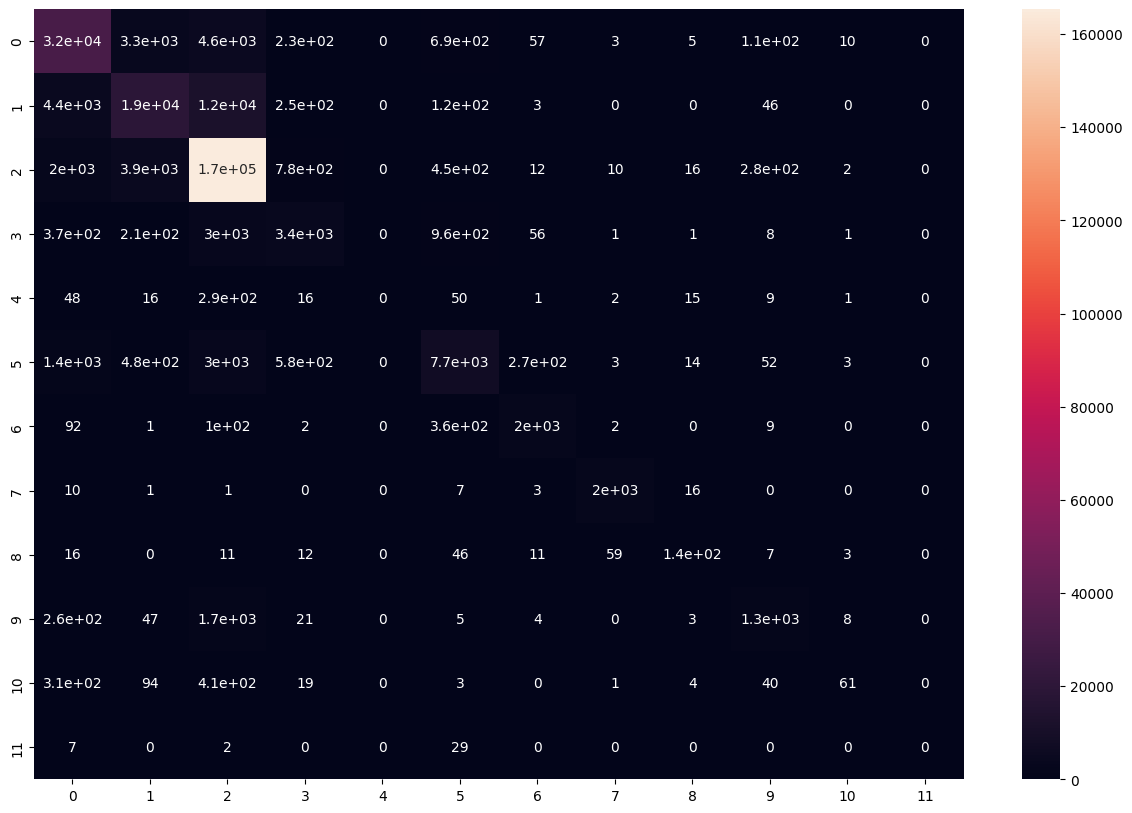

In [143]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(new_y_test1 , new_y_pred_DNN) , annot=True)

In [144]:
# # Predict on the entire dataset
y_pred_DNN = DNN_model.predict(x_features)

43837/43837 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step


In [145]:
# Predict on the entire dataset
y_pred_dnn_all_Facies = np.argmax(y_pred_DNN, axis=1)


In [146]:
# Add DNN predictions to the DataFrame
final_df_plotting["DNN"] = y_pred_dnn_all_Facies


### 8.6.3. Plotting

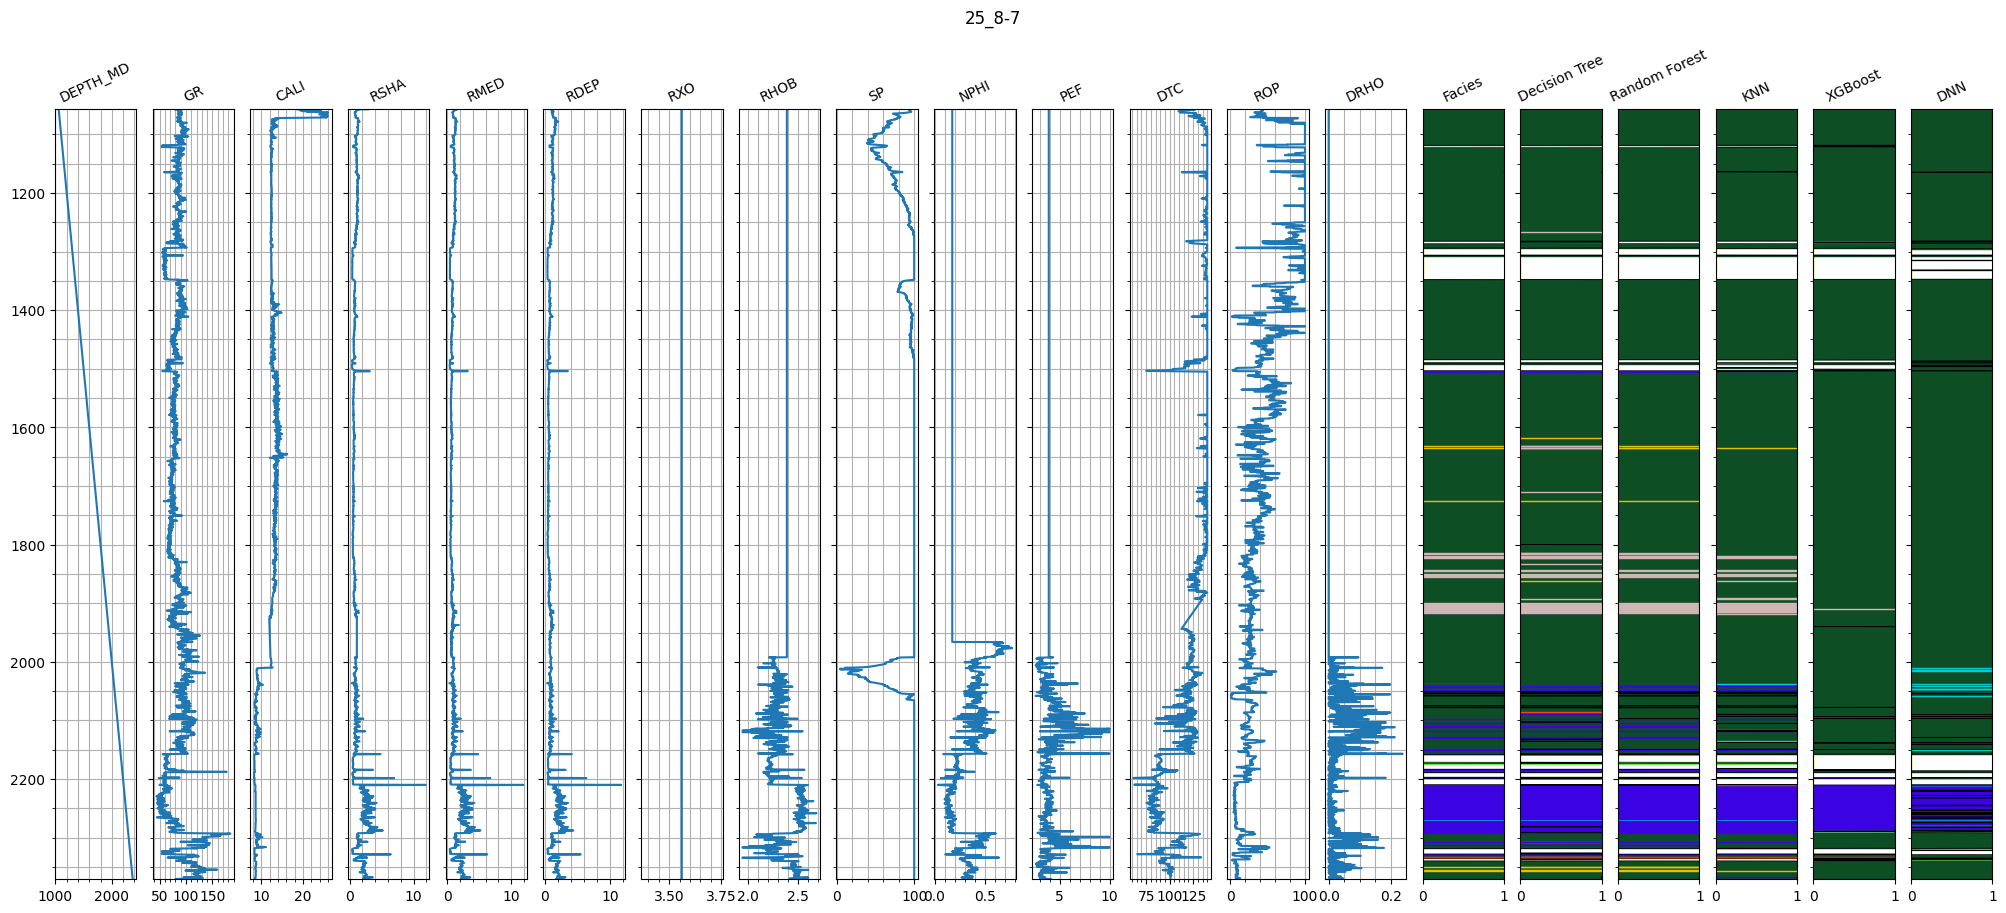

In [147]:
# Select display well
well_plotting = final_df_plotting[final_df_plotting.index == "25_8-7"]
curvenames = well_plotting.columns
rows , cols = 1 , final_df_plotting.shape[1]
fig , ax= plt.subplots(rows , cols , figsize=(25,10) , sharey=True)

# to make title for figure according to well name
fig.suptitle(well_plotting.index[0])
for col in range(cols):
  if col < cols-6:
    ax[col].plot(well_plotting.iloc[:, col] , well_plotting["DEPTH_MD"])
    ax[col].set_ylim(max(well_plotting["DEPTH_MD"]) , min(well_plotting["DEPTH_MD"]))
    ax[col].grid(which = "both")
    # ax[col].grid(which = "minor")
    ax[col].minorticks_on()
    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

  elif col >= col-6:
    ax[col].set_xlim(0 ,1)
    ax[col].plot(well_plotting.iloc[: , col] , well_plotting["DEPTH_MD"] , color = "black", linewidth = 0.5)
    for key in facies_num.keys():
      color = facies_num[key]['color']
      hatch = facies_num[key]['hatch']
      ax[col].fill_betweenx( well_plotting["DEPTH_MD"] , 0, well_plotting.iloc[:, col] , where=(well_plotting.iloc[:, col] == key), color=color, hatch=facies_num[key]['hatch'])
    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

### 8.6.4. Saving DNN Model

In [148]:
# save the madel  .keras

DNN_model.save('dnn_model.keras')


### 8.6.5. Run RNN model for Validation well

#### 8.6.5.1. Load & Run Model

In [162]:
# import the mode

from tensorflow import keras

loaded_dnn_model = keras.models.load_model('dnn_model.keras')


In [150]:
# Prepare the validation data
validation_well_features = validation_well.drop(["Facies",'Decision Tree', 'Random Forest','KNN',"XGBoost"], axis=1)

In [171]:
validation_well_features.columns

Index(['GR', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RXO', 'RHOB', 'SP', 'NPHI',
       'PEF', 'DTC', 'ROP', 'DRHO'],
      dtype='object')

In [172]:
# Predict lithofacies for the validation well using the loaded DNN model
validation_well_predictions_dnn = loaded_dnn_model.predict(validation_well_features)

543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [173]:
# Convert the predicted probabilities to class labels
validation_well_predictions_dnn_classes = np.argmax(validation_well_predictions_dnn, axis=1)

In [174]:
# Add predictions to the validation well DataFrame
validation_well["DNN"] = validation_well_predictions_dnn_classes

C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\3048058007.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 8.6.5.2. Validation Well Prediction Plotting

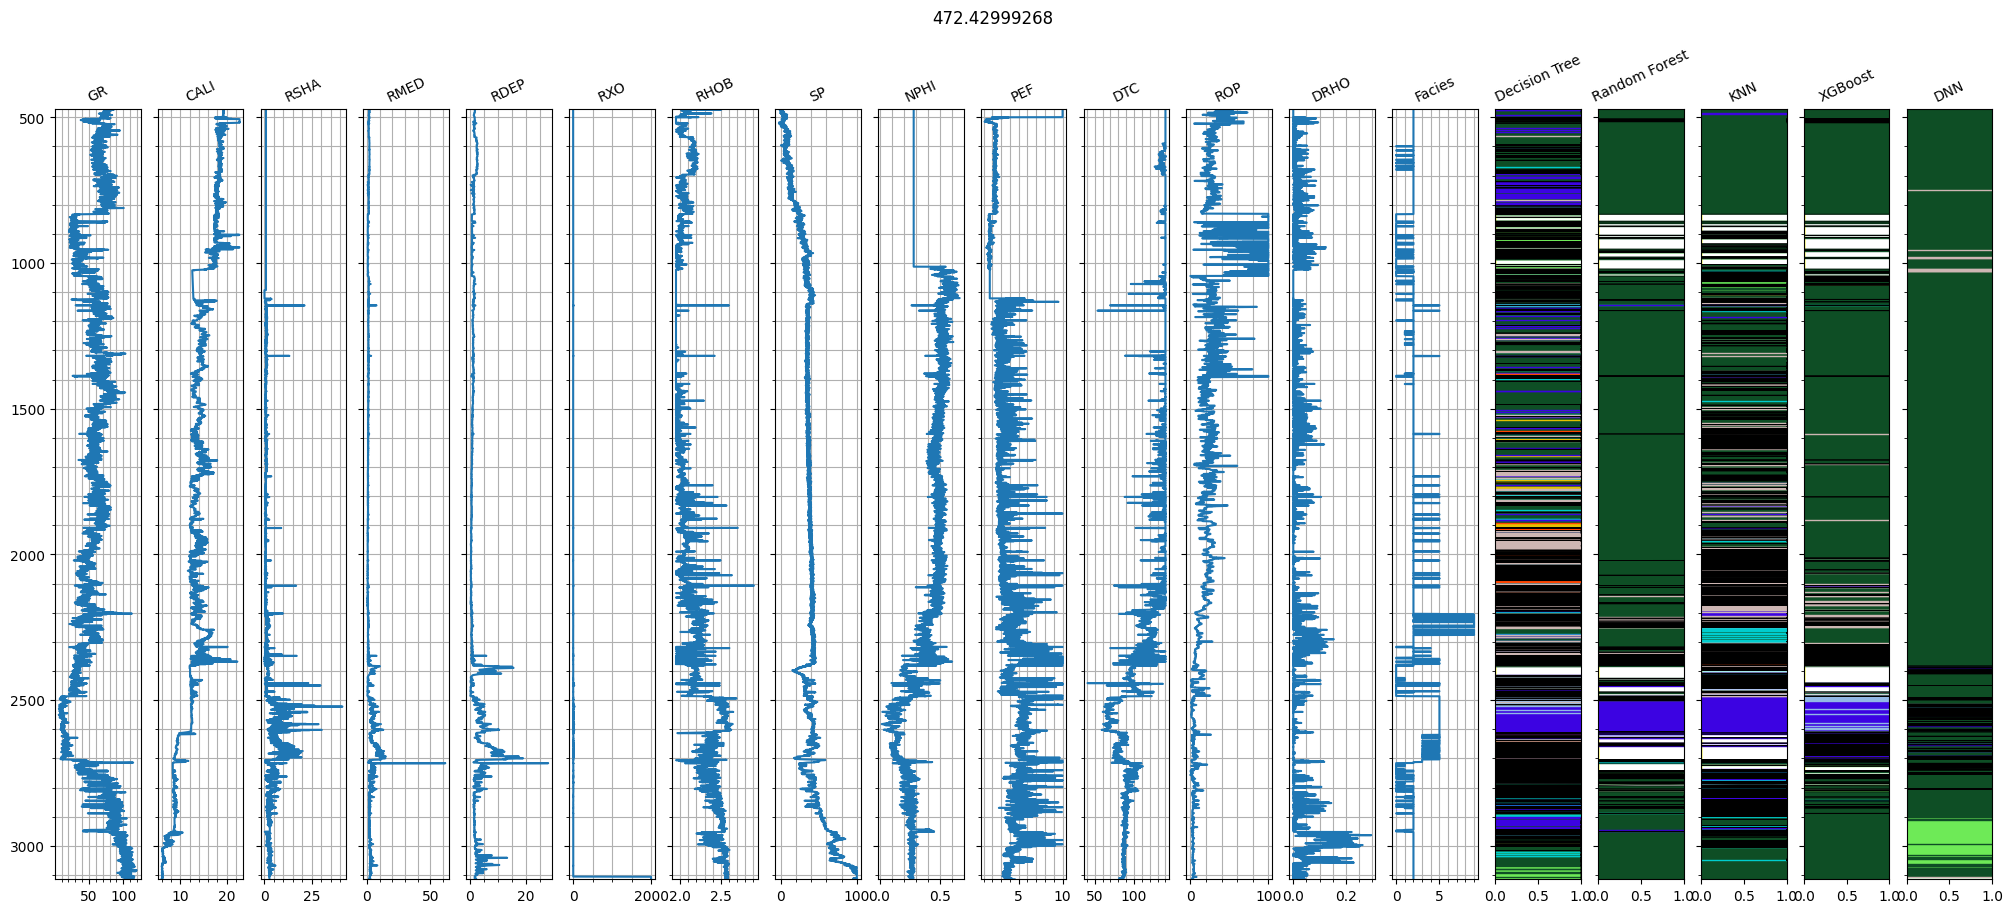

In [175]:
# Select display well
well_plotting = validation_well
curvenames = validation_well.columns
rows , cols = 1 , validation_well.shape[1]
fig , ax= plt.subplots(rows , cols , figsize=(25,10) , sharey=True)

# to make title for figure according to well name
fig.suptitle(well_plotting.index[0])
for col in range(cols):
  if col < cols-5:
    ax[col].plot(well_plotting.iloc[:, col] , well_plotting.index)
    ax[col].set_ylim(max(well_plotting.index) , min(well_plotting.index))
    ax[col].grid(which = "both")
    # ax[col].grid(which = "minor")
    ax[col].minorticks_on()
    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

  elif col >= col-5:
    ax[col].set_xlim(0 ,1)
    ax[col].plot(well_plotting.iloc[: , col] , well_plotting.index , color = "black", linewidth = 0.5)
    for key in facies_num.keys():
      color = facies_num[key]['color']
      hatch = facies_num[key]['hatch']
      ax[col].fill_betweenx( well_plotting.index , 0, well_plotting.iloc[:, col] , where=(well_plotting.iloc[:, col] == key), color=color, hatch=facies_num[key]['hatch'])


    ax[col].set_title("%s" %curvenames[col] , rotation = 25 , fontsize = "10")

Accuracy Score for Validation Well :  0.35992161835052733
              precision    recall  f1-score   support

           0       0.94      0.35      0.51      2312
           1       0.00      0.00      0.00       301
           2       0.77      0.40      0.53     12694
           3       0.00      0.00      0.00       225
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00      1481
           9       0.03      0.95      0.06       320
          10       0.00      0.00      0.00         0

    accuracy                           0.36     17351
   macro avg       0.22      0.21      0.14     17351
weighted avg       0.69      0.36      0.46     17351



c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ep08499\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined an

<Axes: >

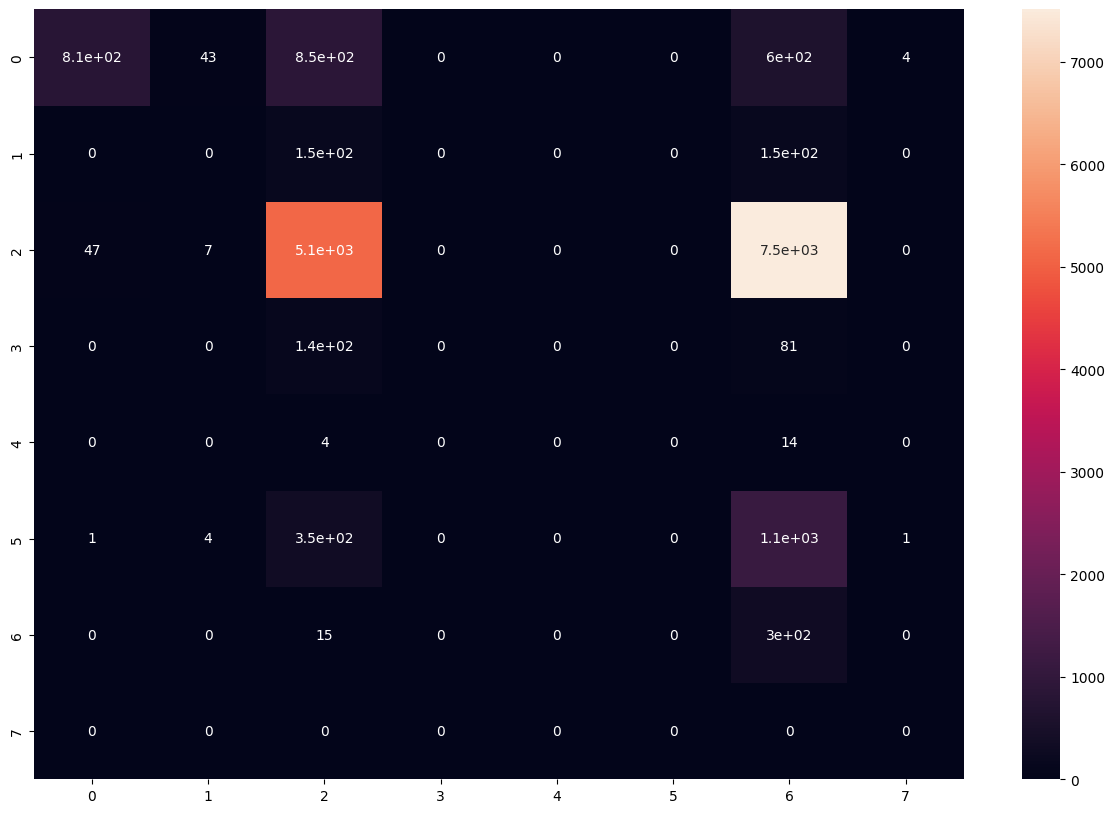

In [ ]:
# accuracy of validation well

import matplotlib.pyplot as plt
print("Accuracy Score for Validation Well : " , accuracy_score(validation_well["Facies"] , validation_well["DNN"]))
print(classification_report(validation_well["Facies"], validation_well["DNN"]))
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(validation_well["Facies"] , validation_well["DNN"]) , annot=True)

# **9. Accuracy score DataFrame**

In [182]:
"""
This Data frame based on the accuracy score of each model for the validation well
"""

import pandas as pd
# Create a dictionary to store the accuracy scores for each model
accuracy_scores = {
    'Decision Tree': accuracy_score(validation_well["Facies"], validation_well["Decision Tree"]),
    'Random Forest': accuracy_score(validation_well["Facies"], validation_well["Random Forest"]),
    'KNN': accuracy_score(validation_well["Facies"], validation_well["KNN"]),
    'XGBoost': accuracy_score(validation_well["Facies"], validation_well["XGBoost"]),
    'DNN': accuracy_score(validation_well["Facies"], validation_well["DNN"])
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])



In [183]:
accuracy_df

Accuracy
Decision Tree      0.66
Random Forest      0.89
KNN                0.71
XGBoost            0.89
DNN                0.67

C:\Users\ep08499\AppData\Local\Temp\ipykernel_18032\1499074227.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




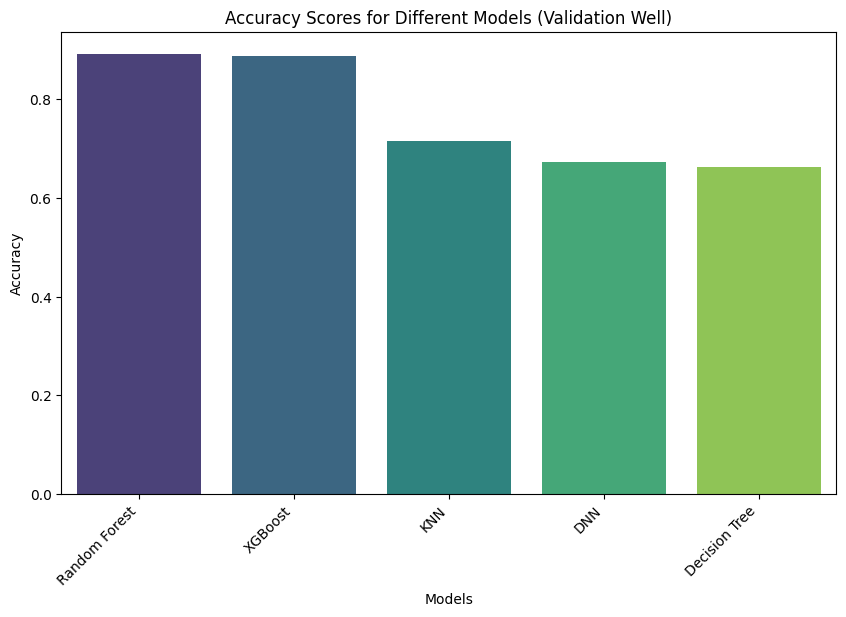

In [184]:
# Accuracy scores bar graph
# Sort the accuracy scores in descending order
accuracy_df_sorted = accuracy_df.sort_values('Accuracy', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_df_sorted.index, y='Accuracy', data=accuracy_df_sorted, palette='viridis')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models (Validation Well)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

The accuracy scores indicate that RandomForest and XGBoost have the highest performance for the validation data based on default parameters. However, these scores can be further improved for all models by performing a grid search to optimize hyperparameters.